In [5]:
import pandas as pd
import numpy as np
from numpy.random import default_rng

def normalize_dataset(df):
    return (df - df.min()) / (df.max() - df.min())

def sigmoid(s):
        return 1/(1 + np.exp(-s))
    
def randn(dim1, dim2, low, high):
    return (high - low) * rng.random((dim1, dim2)) + low

def sigmoid_prime(s):
        return sigmoid(s) * (1 - sigmoid(s))
    
def drop(arr, n):
    if (n > 0):
        return arr[n:]
    else:
        return arr[:n]

# Importar dados do banco de dados


In [6]:
data = pd.read_excel('./../dataset_okuyucu.xlsx')
data

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
0,500,6.25,112,86,3.04,27.2,27.60
1,500,10.00,104,80,3.34,27.5,28.00
2,500,16.00,103,78,3.71,28.0,28.30
3,500,20.00,102,76,4.78,28.2,28.50
4,800,6.25,102,77,5.22,26.8,26.55
5,800,10.00,101,75,5.44,27.0,26.60
6,800,16.00,92,66,5.52,27.6,27.00
7,800,20.00,91,65,5.63,27.8,27.60
8,1000,6.25,99,75,5.65,26.4,26.00
9,1000,10.00,91,66,6.36,26.8,24.80


# Transformação e seleção dos dados

## Padronização


In [7]:
norm_df = normalize_dataset(data)
norm_df

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
0,0.00,0.000000,1.000000,1.000000,0.000000,0.852941,0.823529
1,0.00,0.272727,0.777778,0.846154,0.036496,0.897059,0.901961
2,0.00,0.709091,0.750000,0.794872,0.081509,0.970588,0.960784
3,0.00,1.000000,0.722222,0.743590,0.211679,1.000000,1.000000
4,0.30,0.000000,0.722222,0.769231,0.265207,0.794118,0.617647
5,0.30,0.272727,0.694444,0.717949,0.291971,0.823529,0.627451
6,0.30,0.709091,0.444444,0.487179,0.301703,0.911765,0.705882
7,0.30,1.000000,0.416667,0.461538,0.315085,0.941176,0.823529
8,0.50,0.000000,0.638889,0.717949,0.317518,0.735294,0.509804
9,0.50,0.272727,0.416667,0.487179,0.403893,0.794118,0.274510


## Nova ordem da lista gerada automaticamente

In [8]:
import random
size = len(norm_df)
ordem = [i for i in range(size)]
ordem

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [9]:
random.shuffle(ordem)
ordem

[7, 10, 15, 11, 4, 14, 16, 3, 1, 9, 12, 6, 18, 8, 0, 19, 13, 5, 2, 17]

## Conjunto de dados de treino

In [10]:
n_treino = 15
d = norm_df.iloc[ordem[0:n_treino]]
d

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
7,0.30,1.000000,0.416667,0.461538,0.315085,0.941176,0.823529
10,0.50,0.709091,0.361111,0.410256,0.474453,0.823529,0.647059
15,0.75,1.000000,0.222222,0.153846,0.647202,0.691176,0.490196
11,0.50,1.000000,0.333333,0.333333,0.558394,0.852941,0.745098
4,0.30,0.000000,0.722222,0.769231,0.265207,0.794118,0.617647
14,0.75,0.709091,0.277778,0.230769,0.525547,0.632353,0.372549
16,1.00,0.000000,0.111111,0.282051,0.536496,0.000000,0.000000
3,0.00,1.000000,0.722222,0.743590,0.211679,1.000000,1.000000
1,0.00,0.272727,0.777778,0.846154,0.036496,0.897059,0.901961
9,0.50,0.272727,0.416667,0.487179,0.403893,0.794118,0.274510


## Conjunto de dados de validação

In [11]:
dv = norm_df.iloc[ordem[n_treino:size]]
dv

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
19,1.00,1.000000,0.000000,0.000000,1.000000,0.352941,0.352941
13,0.75,0.272727,0.305556,0.256410,0.484185,0.500000,0.274510
5,0.30,0.272727,0.694444,0.717949,0.291971,0.823529,0.627451
2,0.00,0.709091,0.750000,0.794872,0.081509,0.970588,0.960784
17,1.00,0.272727,0.083333,1.000000,0.867397,0.088235,0.058824


# Arquitetura da rede neural

## Representação visual


![Arquitetura da rede neural](okuyucu_arquitecture.png "Arquitetura da rede neural")

## Número de neurônios de cada camada

In [12]:
ne = 2 # número de neurônios da camada de entrada
nh = 6 # número de neurônios da camada oculta (hidden layer)
ns = 5 # número de neurônios da camada de saída

# Treinamento passo a passo utilizando apenas a primeira linha do dataset

## Propagação


Vetor de entrada

In [13]:
input_cols = d.columns[0:2]
x = np.array(d[input_cols].iloc[0])
x

array([0.3, 1. ])

Vetor de entrada com o Bias

In [14]:
bias = 1
xb = np.concatenate((x, [bias]))
xb = xb[np.newaxis]
xb = xb.T
xb

array([[0.3],
       [1. ],
       [1. ]])

Geração dos pesos da camada escondida

In [15]:
rng = default_rng(1)

w1 = [[]]
w1[0] = np.column_stack((randn(nh, ne, -1, 1), np.ones(nh)))
w1

[array([[ 0.02364325,  0.90092739,  1.        ],
        [-0.71168077,  0.89729889,  1.        ],
        [-0.3763371 , -0.1533471 ,  1.        ],
        [ 0.65540519, -0.18160173,  1.        ],
        [ 0.09918738, -0.94488177,  1.        ],
        [ 0.50702622,  0.07628663,  1.        ]])]

vetor de entrada da camada escondida

In [16]:
v1 = np.dot(w1[0], xb)
v1

array([[1.90802037],
       [1.68379466],
       [0.73375177],
       [1.01501983],
       [0.08487444],
       [1.22839449]])

Vetor de saída da camada escondida

In [17]:
phi = sigmoid(v1)
phi

array([[0.87079658],
       [0.84340635],
       [0.67562803],
       [0.73400139],
       [0.52120588],
       [0.77353745]])

Vetor de saída da camada escondida com adição do bias

In [18]:
phi_b = np.concatenate((phi, [[bias]]))
print(phi_b)

[[0.87079658]
 [0.84340635]
 [0.67562803]
 [0.73400139]
 [0.52120588]
 [0.77353745]
 [1.        ]]


Geração dos pesos da camada de saída

In [19]:
rng = default_rng(2)

w2 = [[]]
w2[0] = np.column_stack((randn(ns, nh, -1, 1), np.ones(ns)))
print(w2)

[array([[-0.47677573, -0.40301771,  0.62845148, -0.81616812,  0.20020105,
         0.45712105,  1.        ],
       [-0.62419785, -0.88970675, -0.45006126,  0.31486603,  0.12453133,
        -0.69987547,  1.        ],
       [-0.13473842,  0.3385946 , -0.15443065,  0.2663688 ,  0.9348719 ,
         0.36612964,  1.        ],
       [-0.21675033, -0.62549486, -0.30807867,  0.02213195,  0.78241882,
         0.55112788,  1.        ],
       [-0.3637068 ,  0.84843379, -0.05818023,  0.38751768, -0.78558538,
        -0.79091288,  1.        ]])]


Vetor de entrada da camada de saída

In [20]:
v2 = np.dot(w2[0], phi_b)
print(v2)

[[ 0.52839475]
 [-0.84336901]
 [ 2.0298962 ]
 [ 0.92592585]
 [ 0.62273768]]


Vetor de saída da rede neural

In [21]:
y = sigmoid(v2)
print(y)

[[0.62910864]
 [0.30082571]
 [0.88390043]
 [0.716248  ]
 [0.65084094]]


## Cálculo do erro

Valores experimentais (valores desejados)

In [22]:
output_cols = d.columns[2:]
np.array(d[output_cols].iloc[0])

array([0.41666667, 0.46153846, 0.31508516, 0.94117647, 0.82352941])

Vetor do erro (resíduo)

In [23]:
e = np.array(d[output_cols].iloc[0]) - y.T
e = e[0]
e

array([-0.21244197,  0.16071276, -0.56881527,  0.22492847,  0.17268848])

Erro quadrático

In [24]:
np.dot(e, e.T)/2

0.23746255788616272

## Retropropagação

### Cálculo dos deltas


In [25]:
delta_2 = np.dot(np.diag(e), (1 - y) * y)
delta_2

array([[-0.04956929],
       [ 0.03380265],
       [-0.05837209],
       [ 0.04571374],
       [ 0.03924294]])

In [26]:
v_delta_2 = np.dot(drop(w2[0].T, -1), delta_2)
v_delta_2

array([[-0.01378254],
       [-0.02516029],
       [-0.05371731],
       [ 0.05177074],
       [-0.05534615],
       [-0.07353219]])

In [27]:
delta_1 = np.dot(np.diag(((1 - phi) * phi).T[0]), v_delta_2)
delta_1

array([[-0.00155067],
       [-0.00332297],
       [-0.01177241],
       [ 0.01010789],
       [-0.01381165],
       [-0.01288117]])

### Atualização dos pesos


In [28]:
eta = 0.02
phi_b.T

array([[0.87079658, 0.84340635, 0.67562803, 0.73400139, 0.52120588,
        0.77353745, 1.        ]])

In [29]:
delta_w2 = eta * np.dot(delta_2, phi_b.T)
delta_w2

array([[-0.0008633 , -0.00083614, -0.00066981, -0.00072768, -0.00051672,
        -0.00076687, -0.00099139],
       [ 0.0005887 ,  0.00057019,  0.00045676,  0.00049622,  0.00035236,
         0.00052295,  0.00067605],
       [-0.0010166 , -0.00098463, -0.00078876, -0.0008569 , -0.00060848,
        -0.00090306, -0.00116744],
       [ 0.00079615,  0.00077111,  0.00061771,  0.00067108,  0.00047653,
         0.00070723,  0.00091427],
       [ 0.00068345,  0.00066195,  0.00053027,  0.00057609,  0.00040907,
         0.00060712,  0.00078486]])

In [30]:
delta_w1 = eta * np.dot(delta_1, xb.T)
delta_w1

array([[-9.30403159e-06, -3.10134386e-05, -3.10134386e-05],
       [-1.99378321e-05, -6.64594402e-05, -6.64594402e-05],
       [-7.06344350e-05, -2.35448117e-04, -2.35448117e-04],
       [ 6.06473610e-05,  2.02157870e-04,  2.02157870e-04],
       [-8.28698867e-05, -2.76232956e-04, -2.76232956e-04],
       [-7.72870075e-05, -2.57623358e-04, -2.57623358e-04]])

In [99]:
c1 = 0
k = 0

rng = default_rng(1)
w1 = [[]]
w1[0] = np.column_stack((randn(nh, ne, -1, 1), np.ones(nh)))

rng = default_rng(2)
w2 = [[]]
w2[0] = np.column_stack((randn(ns, nh, -1, 1), np.ones(ns)))

et = []
ev = []

W1 = []
W2 = []
MSE = []
SSE = []
MSEv = []
SSEv = []
for epoca in range(50001):
    for i in range(len(d)):
        x = d.iloc[i].iloc[0:2]
        xb = np.concatenate((x, [bias]))
        xb = xb[np.newaxis].T
        
        v1 = np.dot(w1[i], xb)
        phi = sigmoid(v1)
        
        phi_b = np.concatenate((phi, [[bias]]))
        
        v2 = np.dot(w2[i], phi_b)
        y = sigmoid(v2)
        
        e = d.iloc[i].iloc[2:] - y.T[0]
        
        delta_2 = np.dot(np.diag(e), (1 - y) * y)
        delta_w2 = eta * np.dot(delta_2, phi_b.T)  
        if (len(w2) < len(d)):
            w2.append(w2[i-1] + delta_w2)
        else: 
            w2[i] = w2[i-1] + delta_w2
        
        v_delta_2 = np.dot(drop(w2[i].T, -1), delta_2)
        delta_1 = np.dot(np.diag(((1 - phi) * phi).T[0]), v_delta_2)
        delta_w1 = eta * np.dot(delta_1, xb.T)
        if (len(w1) < len(d)):
            w1.append(w1[i-1] + delta_w1)
        else:
            w1[i] = w1[i-1] + delta_w1
        
        k += 1
        if (len(et) < len(d)):
            et.append(np.dot(e, e.T) / 2)
        else:
            et[i] = np.dot(e, e.T) / 2
            
    w1[0] = w1[-1]
    w2[0] = w2[-1]
    W1.append(w1[0])
    W2.append(w2[0])
    sse = sum(et)
    mse = np.mean(et)
    MSE.append(mse)
    SSE.append(sse)
    
    for j in range(len(dv)):
        x = dv.iloc[j].iloc[0:2]
        xb = np.concatenate((x, [bias]))
        xb = xb[np.newaxis].T
        
        v1 = np.dot(w1[0], xb)
        phi = sigmoid(v1)
        
        phi_b = np.concatenate((phi, [[bias]]))
        
        v2 = np.dot(w2[0], phi_b)
        y = sigmoid(v2)
        
        e = dv.iloc[j].iloc[2:] - y.T[0]
        if (len(ev) < len(dv)):
            ev.append(np.dot(e, e.T) / 2)
        else:
            ev[j] = np.dot(e, e.T) / 2
    
    ssev = sum(ev)
    msev = np.mean(ev)
    MSEv.append(msev)
    SSEv.append(ssev)
    
    print(f"Época {epoca}: {mse} / {msev}")

totepoc = epoca + 1
print(f"{totepoc} / {len(MSE)} / {len(MSEv)}")


Época 0: 0.32213112035908414 / 0.4195369789629703
Época 1: 0.3220142431441445 / 0.41072867233145605
Época 2: 0.3147714578265889 / 0.4023375285474424
Época 3: 0.307640991065783 / 0.3943809854106705
Época 4: 0.30074922125593045 / 0.3868245520459275
Época 5: 0.2940591834008876 / 0.3796297766259526
Época 6: 0.2875254627201895 / 0.37275827261321426
Época 7: 0.2811032391629998 / 0.3661746986672382
Época 8: 0.27475137997658516 / 0.35984937148896395
Época 9: 0.26843521667599096 / 0.35376043982834054
Época 10: 0.26212903282421823 / 0.3478955356358612
Época 11: 0.255818199767015 / 0.34225278899549716
Época 12: 0.24950085201633185 / 0.33684106051580864
Época 13: 0.24318893236438827 / 0.3316792345489918
Época 14: 0.23690838405878784 / 0.3267944570668851
Época 15: 0.23069825573532057 / 0.3222193133299856
Época 16: 0.22460854621221718 / 0.3179881211172012
Época 17: 0.21869676902868385 / 0.314132730612119
Época 18: 0.21302344922322972 / 0.3106784049288276
Época 19: 0.2076470255689761 / 0.307640426795

Época 167: 0.16069812518297558 / 0.29487563054732224
Época 168: 0.16065402037265727 / 0.29481464480937813
Época 169: 0.16060986466016253 / 0.29475356248039947
Época 170: 0.1605656574020817 / 0.29469238259502345
Época 171: 0.16052139795474124 / 0.29463110418121113
Época 172: 0.1604770856741993 / 0.29456972626074956
Época 173: 0.16043271991624136 / 0.2945082478497122
Época 174: 0.1603883000363754 / 0.2944466679588817
Época 175: 0.16034382538982642 / 0.29438498559413806
Época 176: 0.16029929533153062 / 0.2943231997568139
Época 177: 0.16025470921612905 / 0.2942613094440205
Época 178: 0.16021006639796107 / 0.2941993136489465
Época 179: 0.16016536623105765 / 0.29413721136113147
Época 180: 0.160120608069134 / 0.294075001566716
Época 181: 0.16007579126558233 / 0.2940126832486711
Época 182: 0.16003091517346418 / 0.29395025538700753
Época 183: 0.15998597914550264 / 0.29388771695896665
Época 184: 0.15994098253407438 / 0.2938250669391963
Época 185: 0.1598959246912015 / 0.29376230429990924
Época 18

Época 343: 0.15155863384303317 / 0.28171122916007435
Época 344: 0.15149521084684905 / 0.28161676866441027
Época 345: 0.15143161577266398 / 0.28152202026017836
Época 346: 0.15136784790345548 / 0.28142698287192514
Época 347: 0.1513039065227503 / 0.2813316554264378
Época 348: 0.15123979091465348 / 0.28123603685280124
Época 349: 0.15117550036387647 / 0.2811401260824564
Época 350: 0.15111103415576682 / 0.28104392204925877
Época 351: 0.1510463915763372 / 0.28094742368953673
Época 352: 0.15098157191229547 / 0.2808506299421517
Época 353: 0.15091657445107465 / 0.2807535397485572
Época 354: 0.15085139848086324 / 0.2806561520528593
Época 355: 0.15078604329063625 / 0.2805584658018773
Época 356: 0.15072050817018592 / 0.28046047994520434
Época 357: 0.15065479241015314 / 0.2803621934352691
Época 358: 0.1505888953020592 / 0.28026360522739724
Época 359: 0.15052281613833782 / 0.2801647142798741
Época 360: 0.1504565542123673 / 0.28006551955400655
Época 361: 0.15039010881850318 / 0.27996602001418636
Época

Época 504: 0.13868639055990004 / 0.26217527674981245
Época 505: 0.13858737739963412 / 0.2620238636601781
Época 506: 0.1384881090830861 / 0.26187206131743035
Época 507: 0.1383885854655729 / 0.261719869770309
Época 508: 0.1382888064086858 / 0.26156728907725224
Época 509: 0.13818877178030428 / 0.26141431930638087
Época 510: 0.13808848145461 / 0.26126096053548026
Época 511: 0.1379879353120995 / 0.26110721285198235
Época 512: 0.13788713323959684 / 0.2609530763529455
Época 513: 0.1377860751302654 / 0.2607985511450342
Época 514: 0.1376847608836193 / 0.26064363734449747
Época 515: 0.1375831904055338 / 0.26048833507714597
Época 516: 0.1374813636082557 / 0.2603326444783283
Época 517: 0.13737928041041247 / 0.2601765656929068
Época 518: 0.13727694073702182 / 0.2600200988752309
Época 519: 0.13717434451949917 / 0.2598632441891113
Época 520: 0.13707149169566643 / 0.25970600180779196
Época 521: 0.13696838220975824 / 0.25954837191392166
Época 522: 0.13686501601242912 / 0.2593903546995243
Época 523: 0.1

Época 674: 0.11828301359128744 / 0.23116803724252186
Época 675: 0.1181435137411666 / 0.23095768467197483
Época 676: 0.11800382011675484 / 0.23074705918384403
Época 677: 0.11786393351605938 / 0.23053616193077273
Época 678: 0.11772385474130857 / 0.2303249940701571
Época 679: 0.1175835845989437 / 0.23011355676416603
Época 680: 0.11744312389961128 / 0.2299018511797617
Época 681: 0.11730247345815586 / 0.22968987848871994
Época 682: 0.11716163409361234 / 0.22947763986765243
Época 683: 0.11702060662919912 / 0.22926513649802768
Época 684: 0.11687939189231121 / 0.22905236956619418
Época 685: 0.11673799071451363 / 0.22883934026340294
Época 686: 0.11659640393153474 / 0.22862604978583131
Época 687: 0.11645463238326022 / 0.2284124993346069
Época 688: 0.1163126769137268 / 0.22819869011583135
Época 689: 0.11617053837111639 / 0.22798462334060582
Época 690: 0.11602821760775048 / 0.22777030022505595
Época 691: 0.11588571548008432 / 0.22755572199035762
Época 692: 0.1157430328487019 / 0.2273408898627626
É

Época 848: 0.09193108743736277 / 0.19165971607346
Época 849: 0.09177331086825438 / 0.19142417789430768
Época 850: 0.09161553706127946 / 0.19118865609396424
Época 851: 0.09145776740758306 / 0.19095315283937803
Época 852: 0.09130000329956982 / 0.19071767030088793
Época 853: 0.09114224613085604 / 0.19048221065213816
Época 854: 0.0909844972962215 / 0.19024677606999302
Época 855: 0.09082675819156046 / 0.19001136873445013
Época 856: 0.09066903021383266 / 0.18977599082855257
Época 857: 0.09051131476101393 / 0.18954064453830152
Época 858: 0.09035361323204644 / 0.18930533205256633
Época 859: 0.09019592702678829 / 0.18907005556299508
Época 860: 0.0900382575459631 / 0.18883481726392365
Época 861: 0.08988060619110927 / 0.1885996193522843
Época 862: 0.08972297436452864 / 0.18836446402751345
Época 863: 0.08956536346923488 / 0.18812935349145832
Época 864: 0.08940777490890191 / 0.18789428994828347
Época 865: 0.08925021008781124 / 0.18765927560437595
Época 866: 0.08909267041079992 / 0.1874243126682502


Época 1015: 0.06666506823544108 / 0.15420784007399047
Época 1016: 0.0665262778220838 / 0.15400449140939354
Época 1017: 0.06638769788514519 / 0.15380149014827116
Época 1018: 0.06624932927169289 / 0.15359883762170207
Época 1019: 0.06611117282174378 / 0.15339653514867574
Época 1020: 0.06597322936824208 / 0.1531945840360533
Época 1021: 0.06583549973703848 / 0.15299298557852958
Época 1022: 0.06569798474686936 / 0.15279174105859655
Época 1023: 0.06556068520933701 / 0.15259085174650794
Época 1024: 0.06542360192889017 / 0.1523903189002443
Época 1025: 0.06528673570280534 / 0.15219014376548004
Época 1026: 0.06515008732116849 / 0.15199032757555134
Época 1027: 0.06501365756685742 / 0.1517908715514245
Época 1028: 0.06487744721552487 / 0.15159177690166645
Época 1029: 0.06474145703558191 / 0.15139304482241572
Época 1030: 0.06460568778818222 / 0.15119467649735469
Época 1031: 0.06447014022720665 / 0.150996673097683
Época 1032: 0.06433481509924872 / 0.15079903578209203
Época 1033: 0.06419971314360036 / 

Época 1174: 0.04761152966516322 / 0.12679504136553849
Época 1175: 0.04751209619410381 / 0.1266555382368818
Época 1176: 0.04741291898304625 / 0.1265164428506989
Época 1177: 0.047313997827331714 / 0.12637775476448013
Época 1178: 0.047215332517770214 / 0.1262394735284456
Época 1179: 0.047116922840677984 / 0.12610159868561305
Época 1180: 0.04701876857791494 / 0.12596412977186464
Época 1181: 0.04692086950692214 / 0.12582706631601454
Época 1182: 0.04682322540075933 / 0.1256904078398761
Época 1183: 0.04672583602814244 / 0.12555415385832885
Época 1184: 0.04662870115348109 / 0.12541830387938604
Época 1185: 0.046531820536916145 / 0.12528285740426168
Época 1186: 0.046435193934357265 / 0.12514781392743765
Época 1187: 0.04633882109752048 / 0.12501317293673098
Época 1188: 0.04624270177396562 / 0.12487893391336058
Época 1189: 0.04614683570713393 / 0.12474509633201444
Época 1190: 0.046051222636385586 / 0.12461165966091647
Época 1191: 0.0459558622970372 / 0.12447862336189344
Época 1192: 0.0458607544203

Época 1332: 0.034862153765227166 / 0.10939308686520924
Época 1333: 0.03479864321408102 / 0.10930940524536212
Época 1334: 0.03473532289500589 / 0.10922601072501717
Época 1335: 0.034672192299060406 / 0.10914290242853723
Época 1336: 0.03460925091739909 / 0.10906007948092374
Época 1337: 0.03454649824128839 / 0.10897754100784225
Época 1338: 0.034483933762122713 / 0.1088952861356475
Época 1339: 0.03442155697144027 / 0.10881331399140834
Época 1340: 0.03435936736093863 / 0.10873162370293218
Época 1341: 0.03429736442249029 / 0.10865021439878916
Época 1342: 0.03423554764815795 / 0.10856908520833619
Época 1343: 0.03417391653020966 / 0.10848823526174065
Época 1344: 0.03411247056113382 / 0.10840766369000347
Época 1345: 0.03405120923365401 / 0.10832736962498254
Época 1346: 0.033990132040743616 / 0.10824735219941528
Época 1347: 0.033929238475640326 / 0.10816761054694131
Época 1348: 0.03386852803186051 / 0.10808814380212432
Época 1349: 0.03380800020321336 / 0.10800895110047452
Época 1350: 0.0337476544

Época 1497: 0.026597103674766663 / 0.09886307043549206
Época 1498: 0.026558505722280842 / 0.09881589493103171
Época 1499: 0.02652002295916871 / 0.09876888206258634
Época 1500: 0.026481655011474214 / 0.09872203123331066
Época 1501: 0.026443401506332863 / 0.09867534184835243
Época 1502: 0.02640526207197141 / 0.09862881331485021
Época 1503: 0.026367236337707232 / 0.09858244504193087
Época 1504: 0.026329323933947865 / 0.09853623644070728
Época 1505: 0.026291524492190348 / 0.09849018692427565
Época 1506: 0.026253837645020685 / 0.09844429590771309
Época 1507: 0.026216263026113143 / 0.0983985628080747
Época 1508: 0.026178800270229542 / 0.0983529870443914
Época 1509: 0.026141449013218597 / 0.0983075680376668
Época 1510: 0.02610420889201507 / 0.09826230521087446
Época 1511: 0.02606707954463903 / 0.0982171979889552
Época 1512: 0.026030060610194996 / 0.09817224579881406
Época 1513: 0.025993151728871063 / 0.09812744806931761
Época 1514: 0.025956352541937996 / 0.09808280423129054
Época 1515: 0.0259

Época 1660: 0.021591337118931634 / 0.09295123284847233
Época 1661: 0.021567312908133785 / 0.09292399723706789
Época 1662: 0.021543356280930244 / 0.0928968506047704
Época 1663: 0.021519467018716838 / 0.09286979262612408
Época 1664: 0.02149564490365224 / 0.09284282297695028
Época 1665: 0.021471889718655532 / 0.09281594133434251
Época 1666: 0.021448201247403775 / 0.09278914737666193
Época 1667: 0.021424579274329503 / 0.09276244078353268
Época 1668: 0.021401023584618276 / 0.09273582123583704
Época 1669: 0.021377533964206243 / 0.09270928841571092
Época 1670: 0.02135411019977763 / 0.09268284200653928
Época 1671: 0.02133075207876236 / 0.09265648169295133
Época 1672: 0.02130745938933356 / 0.09263020716081596
Época 1673: 0.02128423192040511 / 0.09260401809723715
Época 1674: 0.02126106946162925 / 0.09257791419054942
Época 1675: 0.02123797180339408 / 0.09255189513031312
Época 1676: 0.021214938736821166 / 0.09252596060730983
Época 1677: 0.02119197005376311 / 0.09250011031353786
Época 1678: 0.02116

Época 1822: 0.018447756056742124 / 0.08950452689827197
Época 1823: 0.01843229558760309 / 0.08948822948937538
Época 1824: 0.01841687564137229 / 0.08947198202920523
Época 1825: 0.018401496094067066 / 0.08945578434580831
Época 1826: 0.01838615682213243 / 0.08943963626789862
Época 1827: 0.018370857702439604 / 0.08942353762485492
Época 1828: 0.0183555986122843 / 0.08940748824671747
Época 1829: 0.0183403794293852 / 0.08939148796418582
Época 1830: 0.018325200031882375 / 0.08937553660861562
Época 1831: 0.018310060298335706 / 0.08935963401201612
Época 1832: 0.01829496010772328 / 0.0893437800070473
Época 1833: 0.018279899339439895 / 0.0893279744270172
Época 1834: 0.01826487787329546 / 0.08931221710587926
Época 1835: 0.018249895589513433 / 0.08929650787822967
Época 1836: 0.018234952368729306 / 0.08928084657930455
Época 1837: 0.018220048091989075 / 0.0892652330449773
Época 1838: 0.018205182640747677 / 0.089249667111756
Época 1839: 0.01819035589686744 / 0.08923414861678072
Época 1840: 0.01817556774

Época 1978: 0.0164579993979475 / 0.0874733164463477
Época 1979: 0.01644759300741923 / 0.08746308767086516
Época 1980: 0.016437212105284312 / 0.08745288860151983
Época 1981: 0.016426856618215413 / 0.08744271914296933
Época 1982: 0.016416526473124426 / 0.08743257920021921
Época 1983: 0.016406221597161635 / 0.08742246867862175
Época 1984: 0.016395941917714863 / 0.08741238748387432
Época 1985: 0.016385687362408592 / 0.08740233552201802
Época 1986: 0.016375457859103087 / 0.08739231269943645
Época 1987: 0.016365253335893518 / 0.08738231892285406
Época 1988: 0.016355073721109132 / 0.08737235409933483
Época 1989: 0.016344918943312425 / 0.08736241813628096
Época 1990: 0.01633478893129822 / 0.08735251094143143
Época 1991: 0.016324683614092842 / 0.08734263242286054
Época 1992: 0.016314602920953308 / 0.08733278248897665
Época 1993: 0.016304546781366478 / 0.08732296104852082
Época 1994: 0.016294515125048165 / 0.0873131680105653
Época 1995: 0.016284507881942353 / 0.08730340328451237
Época 1996: 0.01

Época 2139: 0.015066585545593755 / 0.0861523143759633
Época 2140: 0.01505948071980574 / 0.08614584408901277
Época 2141: 0.015052392143897725 / 0.08613939181361747
Época 2142: 0.015045319773826974 / 0.08613295749569773
Época 2143: 0.015038263565685628 / 0.0861265410813567
Época 2144: 0.015031223475700187 / 0.08612014251687976
Época 2145: 0.015024199460231091 / 0.08611376174873364
Época 2146: 0.01501719147577222 / 0.08610739872356596
Época 2147: 0.015010199478950466 / 0.08610105338820431
Época 2148: 0.015003223426525268 / 0.08609472568965573
Época 2149: 0.014996263275388135 / 0.08608841557510581
Época 2150: 0.014989318982562238 / 0.08608212299191824
Época 2151: 0.01498239050520192 / 0.08607584788763398
Época 2152: 0.01497547780059223 / 0.08606959020997065
Época 2153: 0.014968580826148537 / 0.08606334990682177
Época 2154: 0.014961699539416031 / 0.0860571269262562
Época 2155: 0.014954833898069293 / 0.08605092121651729
Época 2156: 0.014947983859911869 / 0.08604473272602245
Época 2157: 0.014

Época 2297: 0.014120209566067883 / 0.0853226092389207
Época 2298: 0.014115202568060026 / 0.0853184164463561
Época 2299: 0.014110206273737875 / 0.08531423500071837
Época 2300: 0.014105220655594284 / 0.08531006486973666
Época 2301: 0.01410024568620165 / 0.08530590602124179
Época 2302: 0.014095281338211656 / 0.08530175842316581
Época 2303: 0.014090327584355024 / 0.08529762204354176
Época 2304: 0.014085384397441255 / 0.08529349685050316
Época 2305: 0.01408045175035838 / 0.08528938281228375
Época 2306: 0.014075529616072693 / 0.08528527989721715
Época 2307: 0.014070617967628516 / 0.08528118807373637
Época 2308: 0.014065716778147944 / 0.0852771073103737
Época 2309: 0.014060826020830586 / 0.08527303757576014
Época 2310: 0.014055945668953301 / 0.0852689788386251
Época 2311: 0.01405107569587 / 0.08526493106779605
Época 2312: 0.014046216075011348 / 0.08526089423219821
Época 2313: 0.014041366779884537 / 0.08525686830085429
Época 2314: 0.014036527784073046 / 0.08525285324288386
Época 2315: 0.014031

Época 2463: 0.013417236865995814 / 0.08476061992211706
Época 2464: 0.0134136825156552 / 0.08475793510443194
Época 2465: 0.013410135224961926 / 0.08475525743646307
Época 2466: 0.013406594976691963 / 0.08475258689877596
Época 2467: 0.013403061753668583 / 0.08474992347199353
Época 2468: 0.013399535538762155 / 0.08474726713679631
Época 2469: 0.013396016314890041 / 0.08474461787392171
Época 2470: 0.013392504065016447 / 0.08474197566416417
Época 2471: 0.01338899877215224 / 0.08473934048837496
Época 2472: 0.013385500419354898 / 0.08473671232746174
Época 2473: 0.013382008989728241 / 0.08473409116238863
Época 2474: 0.013378524466422412 / 0.08473147697417605
Época 2475: 0.013375046832633668 / 0.08472886974390019
Época 2476: 0.013371576071604262 / 0.08472626945269335
Época 2477: 0.013368112166622296 / 0.08472367608174321
Época 2478: 0.013364655101021566 / 0.08472108961229316
Época 2479: 0.01336120485818149 / 0.08471851002564167
Época 2480: 0.01335776142152686 / 0.08471593730314238
Época 2481: 0.0

Época 2624: 0.012925319684307442 / 0.08440859043010339
Época 2625: 0.012922708859291402 / 0.08440684109153959
Época 2626: 0.012920102843294588 / 0.08440509640201968
Época 2627: 0.012917501625140661 / 0.08440335634934248
Época 2628: 0.012914905193682635 / 0.08440162092134115
Época 2629: 0.012912313537802748 / 0.08439989010588325
Época 2630: 0.012909726646412377 / 0.08439816389087045
Época 2631: 0.01290714450845199 / 0.08439644226423856
Época 2632: 0.012904567112891051 / 0.08439472521395751
Época 2633: 0.012901994448727864 / 0.084393012728031
Época 2634: 0.012899426504989623 / 0.08439130479449655
Época 2635: 0.012896863270732214 / 0.08438960140142537
Época 2636: 0.012894304735040208 / 0.08438790253692235
Época 2637: 0.012891750887026708 / 0.08438620818912577
Época 2638: 0.012889201715833321 / 0.08438451834620737
Época 2639: 0.01288665721063008 / 0.08438283299637199
Época 2640: 0.012884117360615304 / 0.08438115212785788
Época 2641: 0.012881582155015595 / 0.08437947572893631
Época 2642: 0.

Época 2775: 0.012579823007911587 / 0.08419088451543702
Época 2776: 0.012577826655144089 / 0.08418971636656972
Época 2777: 0.012575833713283097 / 0.08418855136145537
Época 2778: 0.012573844174754574 / 0.08418738949207019
Época 2779: 0.012571858032003601 / 0.08418623075041247
Época 2780: 0.012569875277494303 / 0.08418507512850218
Época 2781: 0.012567895903709835 / 0.08418392261838104
Época 2782: 0.012565919903152301 / 0.0841827732121125
Época 2783: 0.012563947268342724 / 0.08418162690178163
Época 2784: 0.012561977991820964 / 0.084180483679495
Época 2785: 0.012560012066145704 / 0.08417934353738077
Época 2786: 0.012558049483894336 / 0.08417820646758838
Época 2787: 0.012556090237663015 / 0.08417707246228882
Época 2788: 0.012554134320066477 / 0.08417594151367423
Época 2789: 0.012552181723738095 / 0.08417481361395808
Época 2790: 0.012550232441329768 / 0.08417368875537491
Época 2791: 0.012548286465511899 / 0.08417256693018052
Época 2792: 0.012546343788973308 / 0.08417144813065172
Época 2793: 0

Época 2930: 0.012306895077550969 / 0.08404292279289058
Época 2931: 0.012305347533284078 / 0.08404215812836505
Época 2932: 0.012303802425227167 / 0.08404139559030994
Época 2933: 0.01230225974822347 / 0.08404063517343802
Época 2934: 0.012300719497128779 / 0.08403987687247609
Época 2935: 0.012299181666811352 / 0.08403912068216492
Época 2936: 0.012297646252151923 / 0.08403836659725925
Época 2937: 0.012296113248043665 / 0.08403761461252769
Época 2938: 0.012294582649392156 / 0.0840368647227528
Época 2939: 0.012293054451115337 / 0.08403611692273086
Época 2940: 0.012291528648143472 / 0.08403537120727192
Época 2941: 0.012290005235419153 / 0.08403462757119987
Época 2942: 0.012288484207897203 / 0.08403388600935223
Época 2943: 0.012286965560544712 / 0.08403314651658023
Época 2944: 0.012285449288340973 / 0.08403240908774873
Época 2945: 0.01228393538627742 / 0.08403167371773612
Época 2946: 0.012282423849357665 / 0.08403094040143451
Época 2947: 0.012280914672597397 / 0.08403020913374928
Época 2948: 0

Época 3082: 0.01209691547805954 / 0.08394833980226817
Época 3083: 0.012095685592193293 / 0.08394784495698657
Época 3084: 0.01209445748523832 / 0.08394735157511565
Época 3085: 0.012093231153608655 / 0.08394685965310784
Época 3086: 0.012092006593726749 / 0.0839463691874247
Época 3087: 0.012090783802023438 / 0.08394588017453702
Época 3088: 0.012089562774937916 / 0.08394539261092474
Época 3089: 0.012088343508917711 / 0.08394490649307693
Época 3090: 0.012087126000418672 / 0.08394442181749173
Época 3091: 0.012085910245904946 / 0.08394393858067636
Época 3092: 0.01208469624184897 / 0.08394345677914712
Época 3093: 0.012083483984731417 / 0.08394297640942927
Época 3094: 0.012082273471041181 / 0.08394249746805718
Época 3095: 0.012081064697275412 / 0.08394201995157413
Época 3096: 0.012079857659939403 / 0.08394154385653234
Época 3097: 0.012078652355546655 / 0.08394106917949298
Época 3098: 0.012077448780618786 / 0.08394059591702614
Época 3099: 0.012076246931685559 / 0.08394012406571076
Época 3100: 0.

Época 3251: 0.011911738239558715 / 0.08388295864298849
Época 3252: 0.011910764074274039 / 0.08388266727268036
Época 3253: 0.011909791185847401 / 0.08388237687918068
Época 3254: 0.011908819571847713 / 0.08388208746019121
Época 3255: 0.011907849229849332 / 0.08388179901341977
Época 3256: 0.011906880157432102 / 0.08388151153657977
Época 3257: 0.0119059123521813 / 0.08388122502739051
Época 3258: 0.011904945811687623 / 0.08388093948357705
Época 3259: 0.011903980533547204 / 0.08388065490287025
Época 3260: 0.01190301651536156 / 0.08388037128300675
Época 3261: 0.011902053754737617 / 0.08388008862172885
Época 3262: 0.011901092249287658 / 0.08387980691678466
Época 3263: 0.01190013199662936 / 0.08387952616592795
Época 3264: 0.011899172994385686 / 0.08387924636691822
Época 3265: 0.011898215240185025 / 0.08387896751752068
Época 3266: 0.011897258731661016 / 0.08387868961550612
Época 3267: 0.011896303466452639 / 0.083878412658651
Época 3268: 0.011895349442204165 / 0.08387813664473744
Época 3269: 0.01

Época 3402: 0.01177783829999048 / 0.08384884395695034
Época 3403: 0.011777032222575584 / 0.08384867704142918
Época 3404: 0.011776227109915317 / 0.08384851081386689
Época 3405: 0.011775422960268891 / 0.08384834527269244
Época 3406: 0.01177461977189927 / 0.08384818041633871
Época 3407: 0.01177381754307321 / 0.08384801624324247
Época 3408: 0.011773016272061225 / 0.08384785275184445
Época 3409: 0.011772215957137558 / 0.08384768994058917
Época 3410: 0.01177141659658019 / 0.08384752780792509
Época 3411: 0.011770618188670846 / 0.08384736635230453
Época 3412: 0.011769820731694969 / 0.08384720557218366
Época 3413: 0.011769024223941693 / 0.08384704546602251
Época 3414: 0.011768228663703868 / 0.08384688603228488
Época 3415: 0.011767434049278042 / 0.08384672726943845
Época 3416: 0.011766640378964442 / 0.08384656917595473
Época 3417: 0.011765847651066958 / 0.08384641175030907
Época 3418: 0.01176505586389318 / 0.08384625499098036
Época 3419: 0.011764265015754304 / 0.08384609889645171
Época 3420: 0.0

Época 3559: 0.011662082670309482 / 0.08383015721144829
Época 3560: 0.011661408923802123 / 0.08383008131421758
Época 3561: 0.011660735909722523 / 0.08383000590039254
Época 3562: 0.011660063626824261 / 0.08382993096890731
Época 3563: 0.0116593920738635 / 0.08382985651869872
Época 3564: 0.011658721249598991 / 0.08382978254870613
Época 3565: 0.011658051152792096 / 0.08382970905787152
Época 3566: 0.011657381782206721 / 0.08382963604513949
Época 3567: 0.011656713136609372 / 0.08382956350945714
Época 3568: 0.01165604521476908 / 0.08382949144977418
Época 3569: 0.011655378015457482 / 0.0838294198650429
Época 3570: 0.011654711537448745 / 0.0838293487542181
Época 3571: 0.011654045779519579 / 0.08382927811625718
Época 3572: 0.011653380740449245 / 0.08382920795012003
Época 3573: 0.011652716419019542 / 0.08382913825476915
Época 3574: 0.011652052814014784 / 0.08382906902916948
Época 3575: 0.011651389924221812 / 0.08382900027228853
Época 3576: 0.011650727748430017 / 0.08382893198309642
Época 3577: 0.0

Época 3725: 0.011559411755157605 / 0.08382345380676218
Época 3726: 0.011558844293643426 / 0.08382344531902784
Época 3727: 0.01155827738907421 / 0.08382343716889636
Época 3728: 0.011557711040561459 / 0.08382342935565404
Época 3729: 0.011557145247218476 / 0.08382342187858885
Época 3730: 0.011556580008160282 / 0.08382341473699058
Época 3731: 0.011556015322503705 / 0.08382340793015056
Época 3732: 0.011555451189367304 / 0.08382340145736186
Época 3733: 0.011554887607871411 / 0.08382339531791928
Época 3734: 0.01155432457713808 / 0.08382338951111934
Época 3735: 0.011553762096291142 / 0.08382338403626005
Época 3736: 0.011553200164456132 / 0.08382337889264126
Época 3737: 0.011552638780760368 / 0.08382337407956443
Época 3738: 0.011552077944332854 / 0.08382336959633269
Época 3739: 0.011551517654304363 / 0.08382336544225076
Época 3740: 0.01155095790980738 / 0.08382336161662514
Época 3741: 0.011550398709976093 / 0.0838233581187638
Época 3742: 0.011549840053946433 / 0.08382335494797652
Época 3743: 0.

Época 3892: 0.01147173962541245 / 0.08382622078065458
Época 3893: 0.011471254091256313 / 0.08382625995100101
Época 3894: 0.011470768987418837 / 0.08382629936034001
Época 3895: 0.011470284313258207 / 0.08382633900818935
Época 3896: 0.011469800068133825 / 0.08382637889406792
Época 3897: 0.011469316251406332 / 0.0838264190174957
Época 3898: 0.011468832862437547 / 0.0838264593779938
Época 3899: 0.011468349900590542 / 0.08382649997508444
Época 3900: 0.011467867365229556 / 0.08382654080829091
Época 3901: 0.011467385255720058 / 0.08382658187713758
Época 3902: 0.011466903571428719 / 0.08382662318114993
Época 3903: 0.011466422311723398 / 0.08382666471985463
Época 3904: 0.011465941475973166 / 0.0838267064927793
Época 3905: 0.011465461063548281 / 0.08382674849945268
Época 3906: 0.011464981073820189 / 0.08382679073940466
Época 3907: 0.011464501506161547 / 0.08382683321216614
Época 3908: 0.01146402235994617 / 0.08382687591726913
Época 3909: 0.011463543634549074 / 0.08382691885424665
Época 3910: 0.0

Época 4055: 0.011397856579004835 / 0.0838354484084814
Época 4056: 0.01139743350641313 / 0.08383552088174268
Época 4057: 0.011397010773895122 / 0.08383559352826607
Época 4058: 0.011396588380976546 / 0.08383566634771807
Época 4059: 0.011396166327184015 / 0.08383573933976586
Época 4060: 0.011395744612044989 / 0.08383581250407739
Época 4061: 0.01139532323508779 / 0.08383588584032137
Época 4062: 0.011394902195841577 / 0.08383595934816723
Época 4063: 0.01139448149383637 / 0.08383603302728507
Época 4064: 0.011394061128603052 / 0.08383610687734586
Época 4065: 0.011393641099673323 / 0.08383618089802107
Época 4066: 0.011393221406579742 / 0.08383625508898314
Época 4067: 0.01139280204885573 / 0.08383632944990502
Época 4068: 0.011392383026035523 / 0.08383640398046056
Época 4069: 0.011391964337654197 / 0.08383647868032418
Época 4070: 0.01139154598324769 / 0.0838365535491711
Época 4071: 0.011391127962352764 / 0.08383662858667729
Época 4072: 0.011390710274507018 / 0.08383670379251933
Época 4073: 0.011

Época 4214: 0.011334568585378128 / 0.08384894627953951
Época 4215: 0.011334194148096046 / 0.08384904255282724
Época 4216: 0.01133381998516734 / 0.08384913895450401
Época 4217: 0.011333446096233938 / 0.0838492354843332
Época 4218: 0.01133307248093839 / 0.0838493321420786
Época 4219: 0.011332699138923824 / 0.08384942892750444
Época 4220: 0.011332326069834036 / 0.0838495258403756
Época 4221: 0.011331953273313386 / 0.08384962288045725
Época 4222: 0.011331580749006887 / 0.08384972004751523
Época 4223: 0.011331208496560125 / 0.08384981734131577
Época 4224: 0.011330836515619317 / 0.08384991476162565
Época 4225: 0.011330464805831286 / 0.08385001230821207
Época 4226: 0.01133009336684345 / 0.08385010998084277
Época 4227: 0.011329722198303848 / 0.08385020777928591
Época 4228: 0.011329351299861118 / 0.08385030570331022
Época 4229: 0.011328980671164496 / 0.08385040375268488
Época 4230: 0.011328610311863822 / 0.08385050192717944
Época 4231: 0.011328240221609531 / 0.08385060022656417
Época 4232: 0.01

Época 4374: 0.011277923749924564 / 0.08386583663448584
Época 4375: 0.011277589036627445 / 0.08386595074139755
Época 4376: 0.01127725454746148 / 0.08386606494438485
Época 4377: 0.011276920282152991 / 0.08386617924327663
Época 4378: 0.01127658624042874 / 0.08386629363790213
Época 4379: 0.011276252422015961 / 0.08386640812809085
Época 4380: 0.01127591882664231 / 0.0838665227136727
Época 4381: 0.011275585454035902 / 0.08386663739447794
Época 4382: 0.011275252303925284 / 0.08386675217033708
Época 4383: 0.011274919376039475 / 0.08386686704108101
Época 4384: 0.011274586670107887 / 0.08386698200654094
Época 4385: 0.011274254185860423 / 0.08386709706654841
Época 4386: 0.011273921923027381 / 0.08386721222093521
Época 4387: 0.011273589881339557 / 0.08386732746953371
Época 4388: 0.011273258060528117 / 0.08386744281217626
Época 4389: 0.011272926460324717 / 0.08386755824869577
Época 4390: 0.011272595080461427 / 0.08386767377892539
Época 4391: 0.011272263920670765 / 0.08386778940269862
Época 4392: 0.

Época 4531: 0.01122795559741679 / 0.08388482726382178
Época 4532: 0.011227652984417977 / 0.08388495455211448
Época 4533: 0.011227350557552208 / 0.08388508191323994
Época 4534: 0.011227048316606442 / 0.08388520934707071
Época 4535: 0.01122674626136796 / 0.08388533685347946
Época 4536: 0.011226444391624386 / 0.08388546443233931
Época 4537: 0.011226142707163655 / 0.08388559208352339
Época 4538: 0.011225841207774053 / 0.08388571980690522
Época 4539: 0.011225539893244174 / 0.08388584760235837
Época 4540: 0.01122523876336295 / 0.08388597546975689
Época 4541: 0.011224937817919646 / 0.08388610340897482
Época 4542: 0.011224637056703842 / 0.08388623141988646
Época 4543: 0.011224336479505442 / 0.08388635950236652
Época 4544: 0.011224036086114685 / 0.08388648765628967
Época 4545: 0.011223735876322138 / 0.08388661588153101
Época 4546: 0.011223435849918662 / 0.08388674417796578
Época 4547: 0.011223136006695495 / 0.08388687254546942
Época 4548: 0.011222836346444144 / 0.08388700098391759
Época 4549: 0

Época 4692: 0.011181495283256357 / 0.0839061774783614
Época 4693: 0.01118122010368001 / 0.0839063149932741
Época 4694: 0.011180945079804038 / 0.08390645256310089
Época 4695: 0.01118067021146146 / 0.08390659018774496
Época 4696: 0.011180395498485493 / 0.08390672786710954
Época 4697: 0.011180120940709666 / 0.08390686560109809
Época 4698: 0.011179846537967697 / 0.08390700338961418
Época 4699: 0.011179572290093559 / 0.08390714123256153
Época 4700: 0.011179298196921506 / 0.08390727912984411
Época 4701: 0.011179024258285975 / 0.08390741708136584
Época 4702: 0.011178750474021702 / 0.0839075550870311
Época 4703: 0.011178476843963624 / 0.08390769314674415
Época 4704: 0.01117820336794695 / 0.08390783126040949
Época 4705: 0.01117793004580711 / 0.0839079694279318
Época 4706: 0.011177656877379783 / 0.08390810764921594
Época 4707: 0.011177383862500891 / 0.08390824592416685
Época 4708: 0.01117711100100659 / 0.08390838425268957
Época 4709: 0.011176838292733292 / 0.08390852263468952
Época 4710: 0.01117

Época 4862: 0.011136824830217766 / 0.08393027078450858
Época 4863: 0.01113657390436884 / 0.0839304163574603
Época 4864: 0.011136323109029594 / 0.083930561970835
Época 4865: 0.011136072444069061 / 0.08393070762455782
Época 4866: 0.011135821909356466 / 0.08393085331855395
Época 4867: 0.01113557150476122 / 0.08393099905274874
Época 4868: 0.011135321230152918 / 0.08393114482706761
Época 4869: 0.011135071085401306 / 0.08393129064143608
Época 4870: 0.011134821070376352 / 0.0839314364957798
Época 4871: 0.01113457118494819 / 0.08393158239002448
Época 4872: 0.011134321428987107 / 0.08393172832409601
Época 4873: 0.011134071802363605 / 0.08393187429792029
Época 4874: 0.011133822304948353 / 0.08393202031142342
Época 4875: 0.011133572936612192 / 0.08393216636453152
Época 4876: 0.011133323697226154 / 0.08393231245717094
Época 4877: 0.011133074586661436 / 0.0839324585892679
Época 4878: 0.011132825604789431 / 0.08393260476074893
Época 4879: 0.011132576751481691 / 0.08393275097154065
Época 4880: 0.0111

Época 5024: 0.011097790500932498 / 0.08395433140755063
Época 5025: 0.011097559128103236 / 0.08395448262005806
Época 5026: 0.011097327866736924 / 0.08395463386208979
Época 5027: 0.011097096716728325 / 0.08395478513358541
Época 5028: 0.011096865677972396 / 0.08395493643448451
Época 5029: 0.011096634750364202 / 0.08395508776472689
Época 5030: 0.01109640393379895 / 0.08395523912425237
Época 5031: 0.01109617322817199 / 0.08395539051300079
Época 5032: 0.01109594263337882 / 0.08395554193091216
Época 5033: 0.011095712149315037 / 0.08395569337792645
Época 5034: 0.011095481775876413 / 0.08395584485398382
Época 5035: 0.011095251512958846 / 0.08395599635902447
Época 5036: 0.011095021360458368 / 0.08395614789298858
Época 5037: 0.011094791318271143 / 0.08395629945581658
Época 5038: 0.011094561386293476 / 0.08395645104744874
Época 5039: 0.011094331564421809 / 0.08395660266782567
Época 5040: 0.011094101852552711 / 0.08395675431688784
Época 5041: 0.011093872250582894 / 0.08395690599457588
Época 5042: 0

Época 5197: 0.011059336847117822 / 0.08398088171933034
Época 5198: 0.011059123301647692 / 0.08398103719897901
Época 5199: 0.011058909851317885 / 0.0839811926986943
Época 5200: 0.011058696496044063 / 0.08398134821842684
Época 5201: 0.011058483235741982 / 0.08398150375812716
Época 5202: 0.011058270070327503 / 0.08398165931774586
Época 5203: 0.01105805699971659 / 0.08398181489723362
Época 5204: 0.011057844023825316 / 0.08398197049654114
Época 5205: 0.011057631142569866 / 0.08398212611561925
Época 5206: 0.011057418355866514 / 0.08398228175441877
Época 5207: 0.011057205663631638 / 0.08398243741289052
Época 5208: 0.011056993065781725 / 0.08398259309098546
Época 5209: 0.011056780562233378 / 0.08398274878865465
Época 5210: 0.01105656815290327 / 0.08398290450584904
Época 5211: 0.011056355837708216 / 0.08398306024251978
Época 5212: 0.011056143616565102 / 0.08398321599861798
Época 5213: 0.011055931489390932 / 0.08398337177409479
Época 5214: 0.011055719456102822 / 0.08398352756890153
Época 5215: 0

Época 5356: 0.011026525285906523 / 0.08400582379519174
Época 5357: 0.011026325873040145 / 0.08400598187631775
Época 5358: 0.011026126543115954 / 0.08400613997024836
Época 5359: 0.011025927296064327 / 0.08400629807694134
Época 5360: 0.011025728131815762 / 0.08400645619635458
Época 5361: 0.011025529050300818 / 0.084006614328446
Época 5362: 0.011025330051450134 / 0.08400677247317358
Época 5363: 0.011025131135194466 / 0.08400693063049527
Época 5364: 0.011024932301464592 / 0.08400708880036914
Época 5365: 0.011024733550191419 / 0.08400724698275333
Época 5366: 0.011024534881305921 / 0.08400740517760588
Época 5367: 0.011024336294739147 / 0.08400756338488496
Época 5368: 0.011024137790422224 / 0.08400772160454872
Época 5369: 0.011023939368286379 / 0.08400787983655547
Época 5370: 0.011023741028262896 / 0.08400803808086346
Época 5371: 0.011023542770283166 / 0.084008196337431
Época 5372: 0.011023344594278624 / 0.0840083546062164
Época 5373: 0.011023146500180828 / 0.08400851288717812
Época 5374: 0.0

Época 5507: 0.01099731574773023 / 0.08402981613449186
Época 5508: 0.010997128114553419 / 0.08402997569279125
Época 5509: 0.010996940554671838 / 0.0840301352579466
Época 5510: 0.010996753068026992 / 0.08403029482992116
Época 5511: 0.010996565654560421 / 0.08403045440867815
Época 5512: 0.010996378314213752 / 0.08403061399418077
Época 5513: 0.010996191046928672 / 0.08403077358639241
Época 5514: 0.010996003852646907 / 0.08403093318527628
Época 5515: 0.010995816731310303 / 0.08403109279079587
Época 5516: 0.01099562968286072 / 0.0840312524029145
Época 5517: 0.010995442707240097 / 0.08403141202159552
Época 5518: 0.010995255804390461 / 0.0840315716468025
Época 5519: 0.010995068974253877 / 0.08403173127849879
Época 5520: 0.010994882216772493 / 0.08403189091664795
Época 5521: 0.010994695531888499 / 0.08403205056121357
Época 5522: 0.01099450891954418 / 0.08403221021215916
Época 5523: 0.010994322379681853 / 0.08403236986944836
Época 5524: 0.010994135912243916 / 0.08403252953304476
Época 5525: 0.01

Época 5662: 0.010969073221800645 / 0.08405460779383392
Época 5663: 0.010968896288876814 / 0.08405476799374872
Época 5664: 0.01096871942090747 / 0.08405492819516544
Época 5665: 0.010968542617843243 / 0.08405508839805162
Época 5666: 0.01096836587963479 / 0.08405524860237493
Época 5667: 0.010968189206232841 / 0.08405540880810301
Época 5668: 0.010968012597588176 / 0.0840555690152035
Época 5669: 0.010967836053651602 / 0.08405572922364406
Época 5670: 0.010967659574374022 / 0.08405588943339252
Época 5671: 0.010967483159706356 / 0.08405604964441657
Época 5672: 0.010967306809599592 / 0.08405620985668397
Época 5673: 0.010967130524004763 / 0.08405637007016255
Época 5674: 0.010966954302872952 / 0.08405653028482012
Época 5675: 0.01096677814615531 / 0.08405669050062449
Época 5676: 0.010966602053803027 / 0.08405685071754355
Época 5677: 0.010966426025767341 / 0.08405701093554525
Época 5678: 0.010966250061999557 / 0.08405717115459746
Época 5679: 0.010966074162451015 / 0.08405733137466813
Época 5680: 0.

Época 5827: 0.010940723323004192 / 0.08408103801034864
Época 5828: 0.010940556476108206 / 0.08408119803754095
Época 5829: 0.01094038968668156 / 0.08408135806121286
Época 5830: 0.01094022295468265 / 0.08408151808133581
Época 5831: 0.010940056280069964 / 0.08408167809788122
Época 5832: 0.010939889662801978 / 0.08408183811082066
Época 5833: 0.010939723102837232 / 0.08408199812012554
Época 5834: 0.010939556600134315 / 0.08408215812576736
Época 5835: 0.01093939015465184 / 0.08408231812771771
Época 5836: 0.010939223766348479 / 0.08408247812594818
Época 5837: 0.010939057435182942 / 0.08408263812043029
Época 5838: 0.010938891161113969 / 0.08408279811113568
Época 5839: 0.010938724944100345 / 0.08408295809803594
Época 5840: 0.010938558784100941 / 0.08408311808110276
Época 5841: 0.010938392681074575 / 0.08408327806030776
Época 5842: 0.010938226634980203 / 0.08408343803562265
Época 5843: 0.010938060645776763 / 0.08408359800701917
Época 5844: 0.010937894713423258 / 0.08408375797446901
Época 5845: 0

Época 5989: 0.010914415778796094 / 0.08410689720671942
Época 5990: 0.010914257727481303 / 0.08410705630528174
Época 5991: 0.010914099727412698 / 0.08410721539595895
Época 5992: 0.01091394177855487 / 0.08410737447872568
Época 5993: 0.010913783880872416 / 0.08410753355355653
Época 5994: 0.010913626034330009 / 0.08410769262042617
Época 5995: 0.010913468238892311 / 0.08410785167930931
Época 5996: 0.010913310494524067 / 0.08410801073018057
Época 5997: 0.010913152801190007 / 0.0841081697730147
Época 5998: 0.010912995158854914 / 0.08410832880778646
Época 5999: 0.010912837567483633 / 0.08410848783447053
Época 6000: 0.010912680027040994 / 0.08410864685304176
Época 6001: 0.010912522537491913 / 0.08410880586347487
Época 6002: 0.010912365098801283 / 0.08410896486574466
Época 6003: 0.010912207710934079 / 0.08410912385982598
Época 6004: 0.010912050373855278 / 0.08410928284569363
Época 6005: 0.010911893087529921 / 0.0841094418233225
Época 6006: 0.010911735851923041 / 0.08410960079268749
Época 6007: 0

Época 6147: 0.01089005725828181 / 0.08413192105634805
Época 6148: 0.01088990688563083 / 0.08413207860568328
Época 6149: 0.010889756559028452 / 0.08413223614334056
Época 6150: 0.010889606278444186 / 0.08413239366929713
Época 6151: 0.010889456043847556 / 0.0841325511835304
Época 6152: 0.01088930585520812 / 0.08413270868601777
Época 6153: 0.01088915571249545 / 0.08413286617673651
Época 6154: 0.010889005615679162 / 0.08413302365566408
Época 6155: 0.010888855564728886 / 0.08413318112277791
Época 6156: 0.01088870555961431 / 0.08413333857805541
Época 6157: 0.010888555600305105 / 0.08413349602147396
Época 6158: 0.010888405686770993 / 0.0841336534530111
Época 6159: 0.01088825581898174 / 0.08413381087264434
Época 6160: 0.010888105996907115 / 0.08413396828035105
Época 6161: 0.010887956220516921 / 0.08413412567610881
Época 6162: 0.010887806489780995 / 0.08413428305989512
Época 6163: 0.010887656804669191 / 0.08413444043168757
Época 6164: 0.010887507165151408 / 0.08413459779146365
Época 6165: 0.0108

Época 6314: 0.010865560898860295 / 0.08415805313801564
Época 6315: 0.010865417813994752 / 0.08415820843487316
Época 6316: 0.010865274770449929 / 0.08415836371648247
Época 6317: 0.010865131768199606 / 0.08415851898282345
Época 6318: 0.010864988807217561 / 0.084158674233876
Época 6319: 0.010864845887477615 / 0.08415882946962003
Época 6320: 0.010864703008953596 / 0.08415898469003544
Época 6321: 0.010864560171619363 / 0.0841591398951022
Época 6322: 0.010864417375448809 / 0.08415929508480023
Época 6323: 0.010864274620415814 / 0.08415945025910951
Época 6324: 0.010864131906494334 / 0.08415960541801006
Época 6325: 0.010863989233658295 / 0.0841597605614818
Época 6326: 0.010863846601881692 / 0.08415991568950483
Época 6327: 0.010863704011138505 / 0.08416007080205909
Época 6328: 0.01086356146140275 / 0.08416022589912468
Época 6329: 0.01086341895264849 / 0.08416038098068165
Época 6330: 0.010863276484849757 / 0.08416053604671
Época 6331: 0.01086313405798068 / 0.08416069109718988
Época 6332: 0.010862

Época 6470: 0.010843723476207275 / 0.08418208294727346
Época 6471: 0.010843586533943635 / 0.08418223563093312
Época 6472: 0.010843449629171931 / 0.08418238829637545
Época 6473: 0.010843312761869235 / 0.08418254094358248
Época 6474: 0.010843175932012636 / 0.08418269357253624
Época 6475: 0.010843039139579243 / 0.08418284618321883
Época 6476: 0.01084290238454618 / 0.08418299877561226
Época 6477: 0.0108427656668906 / 0.08418315134969864
Época 6478: 0.010842628986589666 / 0.08418330390546006
Época 6479: 0.010842492343620573 / 0.08418345644287867
Época 6480: 0.010842355737960515 / 0.08418360896193658
Época 6481: 0.010842219169586722 / 0.08418376146261589
Época 6482: 0.010842082638476433 / 0.08418391394489881
Época 6483: 0.010841946144606922 / 0.08418406640876748
Época 6484: 0.010841809687955454 / 0.08418421885420412
Época 6485: 0.01084167326849935 / 0.08418437128119087
Época 6486: 0.010841536886215915 / 0.08418452368970995
Época 6487: 0.010841400541082494 / 0.08418467607974357
Época 6488: 0.

Época 6624: 0.010823062795281998 / 0.08420537118125533
Época 6625: 0.010822931367727122 / 0.0842055208555112
Época 6626: 0.010822799974348768 / 0.08420567050893435
Época 6627: 0.010822668615126756 / 0.08420582014150871
Época 6628: 0.010822537290040896 / 0.08420596975321833
Época 6629: 0.010822405999071047 / 0.08420611934404718
Época 6630: 0.010822274742197064 / 0.0842062689139793
Época 6631: 0.010822143519398829 / 0.08420641846299877
Época 6632: 0.010822012330656232 / 0.08420656799108954
Época 6633: 0.010821881175949188 / 0.0842067174982357
Época 6634: 0.010821750055257616 / 0.0842068669844214
Época 6635: 0.010821618968561476 / 0.0842070164496306
Época 6636: 0.010821487915840715 / 0.0842071658938475
Época 6637: 0.010821356897075307 / 0.08420731531705612
Época 6638: 0.010821225912245248 / 0.08420746471924065
Época 6639: 0.010821094961330551 / 0.08420761410038516
Época 6640: 0.010820964044311236 / 0.08420776346047383
Época 6641: 0.010820833161167331 / 0.08420791279949079
Época 6642: 0.01

Época 6780: 0.010802961138077436 / 0.08422845884199429
Época 6781: 0.010802834807740842 / 0.08422860508011432
Época 6782: 0.010802708508618804 / 0.08422875129504635
Época 6783: 0.010802582240693496 / 0.08422889748677623
Época 6784: 0.010802456003947088 / 0.08422904365528967
Época 6785: 0.01080232979836178 / 0.08422918980057258
Época 6786: 0.010802203623919765 / 0.08422933592261078
Época 6787: 0.010802077480603273 / 0.08422948202139013
Época 6788: 0.010801951368394536 / 0.08422962809689652
Época 6789: 0.01080182528727579 / 0.08422977414911577
Época 6790: 0.010801699237229295 / 0.08422992017803377
Época 6791: 0.010801573218237341 / 0.08423006618363646
Época 6792: 0.010801447230282204 / 0.08423021216590973
Época 6793: 0.010801321273346183 / 0.08423035812483948
Época 6794: 0.010801195347411622 / 0.08423050406041163
Época 6795: 0.010801069452460808 / 0.08423064997261218
Época 6796: 0.010800943588476102 / 0.08423079586142702
Época 6797: 0.010800817755439868 / 0.08423094172684219
Época 6798: 

Época 6941: 0.01078301218350339 / 0.08425169512707167
Época 6942: 0.01078289065806568 / 0.08425183745662973
Época 6943: 0.01078276916114001 / 0.08425197976085544
Época 6944: 0.010782647692710597 / 0.08425212203973646
Época 6945: 0.010782526252761684 / 0.08425226429326031
Época 6946: 0.010782404841277514 / 0.0842524065214145
Época 6947: 0.010782283458242335 / 0.08425254872418668
Época 6948: 0.010782162103640412 / 0.08425269090156443
Época 6949: 0.010782040777456033 / 0.08425283305353527
Época 6950: 0.010781919479673496 / 0.08425297518008684
Época 6951: 0.010781798210277088 / 0.08425311728120684
Época 6952: 0.010781676969251138 / 0.08425325935688276
Época 6953: 0.010781555756579964 / 0.08425340140710232
Época 6954: 0.010781434572247905 / 0.08425354343185318
Época 6955: 0.010781313416239313 / 0.08425368543112291
Época 6956: 0.010781192288538551 / 0.08425382740489924
Época 6957: 0.010781071189129994 / 0.08425396935316984
Época 6958: 0.010780950117998012 / 0.08425411127592242
Época 6959: 0.

Época 7102: 0.010763803359102785 / 0.0842742756779679
Época 7103: 0.010763686228590084 / 0.08427441377552614
Época 7104: 0.010763569124192757 / 0.08427455184587658
Época 7105: 0.010763452045896788 / 0.08427468988900844
Época 7106: 0.01076333499368814 / 0.08427482790491088
Época 7107: 0.010763217967552818 / 0.08427496589357295
Época 7108: 0.010763100967476827 / 0.08427510385498393
Época 7109: 0.010762983993446157 / 0.084275241789133
Época 7110: 0.010762867045446857 / 0.0842753796960093
Época 7111: 0.01076275012346493 / 0.08427551757560206
Época 7112: 0.010762633227486447 / 0.08427565542790053
Época 7113: 0.010762516357497436 / 0.08427579325289387
Época 7114: 0.010762399513483966 / 0.08427593105057138
Época 7115: 0.010762282695432114 / 0.08427606882092224
Época 7116: 0.010762165903327951 / 0.08427620656393578
Época 7117: 0.010762049137157574 / 0.08427634427960116
Época 7118: 0.010761932396907082 / 0.08427648196790774
Época 7119: 0.010761815682562586 / 0.08427661962884474
Época 7120: 0.01

Época 7255: 0.010746178063604091 / 0.08429508208740868
Época 7256: 0.010746064771283528 / 0.08429521590147666
Época 7257: 0.010745951503043144 / 0.08429534968678484
Época 7258: 0.01074583825887035 / 0.08429548344332378
Época 7259: 0.010745725038752551 / 0.0842956171710841
Época 7260: 0.010745611842677147 / 0.08429575087005631
Época 7261: 0.010745498670631593 / 0.08429588454023101
Época 7262: 0.0107453855226033 / 0.08429601818159885
Época 7263: 0.010745272398579718 / 0.08429615179415036
Época 7264: 0.010745159298548296 / 0.08429628537787617
Época 7265: 0.010745046222496496 / 0.08429641893276697
Época 7266: 0.010744933170411787 / 0.08429655245881325
Época 7267: 0.010744820142281649 / 0.08429668595600576
Época 7268: 0.010744707138093557 / 0.08429681942433508
Época 7269: 0.010744594157835019 / 0.08429695286379188
Época 7270: 0.010744481201493529 / 0.08429708627436684
Época 7271: 0.010744368269056608 / 0.08429721965605061
Época 7272: 0.010744255360511767 / 0.08429735300883393
Época 7273: 0.

Época 7428: 0.010726926374159602 / 0.08431779633860277
Época 7429: 0.010726817067310192 / 0.08431792504408302
Época 7430: 0.0107267077824835 / 0.08431805371929788
Época 7431: 0.010726598519668293 / 0.0843181823642393
Época 7432: 0.010726489278853366 / 0.08431831097889937
Época 7433: 0.010726380060027525 / 0.08431843956327012
Época 7434: 0.010726270863179585 / 0.08431856811734359
Época 7435: 0.010726161688298347 / 0.08431869664111183
Época 7436: 0.010726052535372637 / 0.08431882513456693
Época 7437: 0.01072594340439129 / 0.08431895359770092
Época 7438: 0.010725834295343146 / 0.08431908203050595
Época 7439: 0.010725725208217041 / 0.08431921043297402
Época 7440: 0.010725616143001836 / 0.08431933880509733
Época 7441: 0.010725507099686383 / 0.08431946714686787
Época 7442: 0.01072539807825955 / 0.08431959545827787
Época 7443: 0.010725289078710214 / 0.08431972373931935
Época 7444: 0.010725180101027253 / 0.08431985198998453
Época 7445: 0.010725071145199556 / 0.08431998021026549
Época 7446: 0.0

Época 7587: 0.010709816024948266 / 0.08433787530767671
Época 7588: 0.01070971008354218 / 0.0843379991059965
Época 7589: 0.010709604162464411 / 0.0843381228728819
Época 7590: 0.010709498261704826 / 0.08433824660832613
Época 7591: 0.010709392381253322 / 0.08433837031232251
Época 7592: 0.010709286521099787 / 0.08433849398486429
Época 7593: 0.010709180681234125 / 0.08433861762594476
Época 7594: 0.010709074861646243 / 0.0843387412355572
Época 7595: 0.010708969062326056 / 0.0843388648136949
Época 7596: 0.010708863283263497 / 0.08433898836035122
Época 7597: 0.010708757524448467 / 0.08433911187551943
Época 7598: 0.010708651785870915 / 0.08433923535919288
Época 7599: 0.010708546067520778 / 0.08433935881136483
Época 7600: 0.010708440369388008 / 0.08433948223202872
Época 7601: 0.010708334691462549 / 0.08433960562117782
Época 7602: 0.010708229033734362 / 0.08433972897880551
Época 7603: 0.010708123396193417 / 0.08433985230490512
Época 7604: 0.01070801777882967 / 0.08433997559947007
Época 7605: 0.01

Época 7747: 0.010693117362078671 / 0.08435727887251089
Época 7748: 0.010693014548657752 / 0.08435739756051937
Época 7749: 0.010692911754024296 / 0.08435751621610772
Época 7750: 0.010692808978169132 / 0.08435763483927036
Época 7751: 0.010692706221083129 / 0.08435775343000172
Época 7752: 0.01069260348275713 / 0.08435787198829622
Época 7753: 0.010692500763181984 / 0.08435799051414829
Época 7754: 0.010692398062348557 / 0.08435810900755232
Época 7755: 0.010692295380247732 / 0.08435822746850283
Época 7756: 0.010692192716870361 / 0.08435834589699417
Época 7757: 0.010692090072207354 / 0.08435846429302088
Época 7758: 0.010691987446249577 / 0.08435858265657736
Época 7759: 0.010691884838987909 / 0.08435870098765816
Época 7760: 0.010691782250413282 / 0.08435881928625769
Época 7761: 0.010691679680516578 / 0.08435893755237042
Época 7762: 0.0106915771292887 / 0.08435905578599086
Época 7763: 0.010691474596720577 / 0.08435917398711357
Época 7764: 0.01069137208280312 / 0.08435929215573298
Época 7765: 0.

Época 7908: 0.010676800278678233 / 0.08437596643454079
Época 7909: 0.01067670037577002 / 0.0843760798354525
Época 7910: 0.01067660049024366 / 0.08437619320312939
Época 7911: 0.010676500622090851 / 0.08437630653756686
Época 7912: 0.01067640077130327 / 0.08437641983876047
Época 7913: 0.01067630093787262 / 0.08437653310670568
Época 7914: 0.010676201121790595 / 0.08437664634139792
Época 7915: 0.010676101323048906 / 0.08437675954283266
Época 7916: 0.010676001541639253 / 0.08437687271100551
Época 7917: 0.010675901777553351 / 0.08437698584591183
Época 7918: 0.010675802030782926 / 0.08437709894754722
Época 7919: 0.010675702301319694 / 0.08437721201590713
Época 7920: 0.010675602589155382 / 0.08437732505098715
Época 7921: 0.010675502894281718 / 0.08437743805278274
Época 7922: 0.010675403216690452 / 0.08437755102128952
Época 7923: 0.010675303556373332 / 0.08437766395650285
Época 7924: 0.010675203913322074 / 0.08437777685841844
Época 7925: 0.010675104287528462 / 0.08437788972703182
Época 7926: 0.0

Época 8062: 0.010661615150354688 / 0.08439303606599727
Época 8063: 0.010661517829116769 / 0.08439314429895557
Época 8064: 0.010661420524035403 / 0.08439325249805214
Época 8065: 0.010661323235102983 / 0.08439336066328326
Época 8066: 0.010661225962311926 / 0.0843934687946454
Época 8067: 0.010661128705654594 / 0.08439357689213492
Época 8068: 0.010661031465123432 / 0.08439368495574828
Época 8069: 0.010660934240710825 / 0.08439379298548186
Época 8070: 0.0106608370324092 / 0.08439390098133207
Época 8071: 0.010660739840210967 / 0.08439400894329532
Época 8072: 0.010660642664108554 / 0.08439411687136808
Época 8073: 0.010660545504094386 / 0.08439422476554678
Época 8074: 0.01066044836016089 / 0.08439433262582777
Época 8075: 0.010660351232300516 / 0.0843944404522076
Época 8076: 0.010660254120505693 / 0.0843945482446827
Época 8077: 0.010660157024768862 / 0.08439465600324947
Época 8078: 0.010660059945082486 / 0.08439476372790447
Época 8079: 0.010659962881438997 / 0.08439487141864412
Época 8080: 0.01

Época 8213: 0.010647098425429127 / 0.08440899384375664
Época 8214: 0.010647003460040634 / 0.08440909692583942
Época 8215: 0.010646908509707082 / 0.08440919997357824
Época 8216: 0.010646813574421488 / 0.0844093029869702
Época 8217: 0.01064671865417686 / 0.08440940596601258
Época 8218: 0.010646623748966218 / 0.08440950891070262
Época 8219: 0.010646528858782579 / 0.08440961182103757
Época 8220: 0.010646433983618976 / 0.08440971469701461
Época 8221: 0.010646339123468417 / 0.08440981753863099
Época 8222: 0.010646244278323957 / 0.08440992034588404
Época 8223: 0.010646149448178611 / 0.08441002311877091
Época 8224: 0.010646054633025436 / 0.08441012585728894
Época 8225: 0.010645959832857457 / 0.08441022856143529
Época 8226: 0.010645865047667733 / 0.08441033123120738
Época 8227: 0.010645770277449304 / 0.08441043386660238
Época 8228: 0.010645675522195244 / 0.08441053646761762
Época 8229: 0.01064558078189859 / 0.08441063903425036
Época 8230: 0.010645486056552413 / 0.08441074156649793
Época 8231: 0

Época 8365: 0.010632832525488094 / 0.08442426670268394
Época 8366: 0.010632739770359601 / 0.08442436453550567
Época 8367: 0.010632647029265797 / 0.08442446233361915
Época 8368: 0.010632554302200236 / 0.08442456009702244
Época 8369: 0.010632461589156494 / 0.08442465782571347
Época 8370: 0.010632368890128122 / 0.08442475551969025
Época 8371: 0.010632276205108702 / 0.08442485317895075
Época 8372: 0.010632183534091804 / 0.08442495080349303
Época 8373: 0.010632090877070987 / 0.08442504839331504
Época 8374: 0.010631998234039876 / 0.08442514594841484
Época 8375: 0.01063190560499202 / 0.08442524346879042
Época 8376: 0.010631812989921012 / 0.08442534095443983
Época 8377: 0.010631720388820444 / 0.08442543840536107
Época 8378: 0.010631627801683918 / 0.08442553582155214
Época 8379: 0.010631535228505021 / 0.08442563320301114
Época 8380: 0.010631442669277364 / 0.08442573054973607
Época 8381: 0.010631350123994543 / 0.08442582786172498
Época 8382: 0.010631257592650172 / 0.08442592513897593
Época 8383:

Época 8520: 0.01061861914221973 / 0.08443901542908558
Época 8521: 0.010618528487636024 / 0.08443910786092287
Época 8522: 0.010618437846128226 / 0.08443920025779497
Época 8523: 0.010618347217690382 / 0.08443929261970054
Época 8524: 0.010618256602316568 / 0.0844393849466383
Época 8525: 0.010618166000000854 / 0.08443947723860704
Época 8526: 0.010618075410737298 / 0.08443956949560535
Época 8527: 0.010617984834519987 / 0.084439661717632
Época 8528: 0.010617894271343 / 0.08443975390468562
Época 8529: 0.01061780372120041 / 0.08443984605676509
Época 8530: 0.010617713184086301 / 0.08443993817386901
Época 8531: 0.010617622659994762 / 0.08444003025599611
Época 8532: 0.01061753214891988 / 0.08444012230314521
Época 8533: 0.010617441650855748 / 0.08444021431531495
Época 8534: 0.010617351165796474 / 0.08444030629250411
Época 8535: 0.010617260693736138 / 0.08444039823471143
Época 8536: 0.010617170234668849 / 0.08444049014193573
Época 8537: 0.010617079788588718 / 0.08444058201417573
Época 8538: 0.01061

Época 8674: 0.010604808906650063 / 0.08445283732440487
Época 8675: 0.010604720197578665 / 0.08445292435876926
Época 8676: 0.0106046315007035 / 0.08445301135801728
Época 8677: 0.010604542816019087 / 0.08445309832214828
Época 8678: 0.010604454143519926 / 0.08445318525116166
Época 8679: 0.010604365483200538 / 0.08445327214505667
Época 8680: 0.010604276835055439 / 0.08445335900383269
Época 8681: 0.010604188199079137 / 0.08445344582748905
Época 8682: 0.010604099575266175 / 0.08445353261602515
Época 8683: 0.010604010963611053 / 0.08445361936944037
Época 8684: 0.010603922364108318 / 0.08445370608773403
Época 8685: 0.010603833776752506 / 0.08445379277090548
Época 8686: 0.010603745201538117 / 0.08445387941895413
Época 8687: 0.01060365663845972 / 0.08445396603187935
Época 8688: 0.01060356808751184 / 0.08445405260968054
Época 8689: 0.01060347954868902 / 0.08445413915235703
Época 8690: 0.010603391021985797 / 0.08445422565990823
Época 8691: 0.010603302507396736 / 0.08445431213233356
Época 8692: 0.0

Época 8846: 0.010589725822253789 / 0.08446729039784481
Época 8847: 0.010589639132396618 / 0.08446737138565923
Época 8848: 0.010589552453829951 / 0.08446745233829947
Época 8849: 0.01058946578654873 / 0.08446753325576553
Época 8850: 0.010589379130547907 / 0.08446761413805741
Época 8851: 0.01058929248582244 / 0.08446769498517512
Época 8852: 0.010589205852367294 / 0.08446777579711859
Época 8853: 0.010589119230177428 / 0.08446785657388792
Época 8854: 0.01058903261924782 / 0.08446793731548301
Época 8855: 0.010588946019573421 / 0.08446801802190389
Época 8856: 0.010588859431149211 / 0.08446809869315058
Época 8857: 0.010588772853970165 / 0.0844681793292231
Época 8858: 0.010588686288031257 / 0.0844682599301215
Época 8859: 0.010588599733327457 / 0.08446834049584566
Época 8860: 0.010588513189853748 / 0.08446842102639575
Época 8861: 0.010588426657605126 / 0.08446850152177175
Época 8862: 0.01058834013657656 / 0.08446858198197364
Época 8863: 0.010588253626763048 / 0.08446866240700153
Época 8864: 0.01

Época 9002: 0.01057633563135366 / 0.08447949931372814
Época 9003: 0.010576250643276571 / 0.08447957481632462
Época 9004: 0.010576165665731224 / 0.08447965028378587
Época 9005: 0.010576080698712931 / 0.08447972571611248
Época 9006: 0.010575995742217003 / 0.08447980111330489
Época 9007: 0.010575910796238758 / 0.08447987647536363
Época 9008: 0.010575825860773536 / 0.08447995180228927
Época 9009: 0.010575740935816638 / 0.08448002709408231
Época 9010: 0.010575656021363396 / 0.08448010235074327
Época 9011: 0.010575571117409147 / 0.08448017757227268
Época 9012: 0.010575486223949219 / 0.08448025275867108
Época 9013: 0.01057540134097894 / 0.08448032790993902
Época 9014: 0.010575316468493643 / 0.084480403026077
Época 9015: 0.010575231606488666 / 0.08448047810708562
Época 9016: 0.010575146754959365 / 0.08448055315296535
Época 9017: 0.010575061913901052 / 0.08448062816371679
Época 9018: 0.01057497708330909 / 0.08448070313934046
Época 9019: 0.01057489226317882 / 0.08448077807983696
Época 9020: 0.01

Época 9154: 0.010563535663711805 / 0.08449057285717061
Época 9155: 0.010563452223925757 / 0.08449064302687351
Época 9156: 0.010563368793983764 / 0.0844907131615545
Época 9157: 0.01056328537388147 / 0.08449078326121451
Época 9158: 0.010563201963614505 / 0.08449085332585445
Época 9159: 0.010563118563178507 / 0.08449092335547535
Época 9160: 0.01056303517256912 / 0.08449099335007822
Época 9161: 0.010562951791781976 / 0.08449106330966401
Época 9162: 0.010562868420812731 / 0.08449113323423371
Época 9163: 0.010562785059657027 / 0.08449120312378829
Época 9164: 0.01056270170831051 / 0.08449127297832887
Época 9165: 0.01056261836676881 / 0.08449134279785626
Época 9166: 0.01056253503502762 / 0.08449141258237158
Época 9167: 0.010562451713082559 / 0.0844914823318758
Época 9168: 0.010562368400929294 / 0.08449155204636993
Época 9169: 0.010562285098563492 / 0.08449162172585498
Época 9170: 0.010562201805980793 / 0.08449169137033194
Época 9171: 0.01056211852317687 / 0.08449176097980189
Época 9172: 0.0105

Época 9313: 0.010550389568876583 / 0.08450129064200854
Época 9314: 0.010550307640730384 / 0.08450135525730768
Época 9315: 0.010550225721758238 / 0.0845014198377748
Época 9316: 0.01055014381195611 / 0.08450148438341136
Época 9317: 0.010550061911319924 / 0.08450154889421875
Época 9318: 0.010549980019845615 / 0.08450161337019835
Época 9319: 0.010549898137529138 / 0.08450167781135164
Época 9320: 0.010549816264366425 / 0.08450174221768006
Época 9321: 0.010549734400353427 / 0.0845018065891849
Época 9322: 0.01054965254548609 / 0.08450187092586772
Época 9323: 0.010549570699760358 / 0.08450193522772988
Época 9324: 0.010549488863172179 / 0.08450199949477284
Época 9325: 0.01054940703571752 / 0.08450206372699803
Época 9326: 0.010549325217392314 / 0.0845021279244069
Época 9327: 0.010549243408192533 / 0.08450219208700085
Época 9328: 0.010549161608114133 / 0.08450225621478138
Época 9329: 0.010549079817153062 / 0.08450232030774983
Época 9330: 0.010548998035305283 / 0.08450238436590775
Época 9331: 0.01

Época 9466: 0.010537958898891624 / 0.08451077263740163
Época 9467: 0.010537878328154202 / 0.08451083194128077
Época 9468: 0.01053779776598942 / 0.08451089121057279
Época 9469: 0.010537717212393488 / 0.08451095044527938
Época 9470: 0.0105376366673626 / 0.08451100964540244
Época 9471: 0.010537556130892963 / 0.08451106881094367
Época 9472: 0.010537475602980791 / 0.08451112794190496
Época 9473: 0.010537395083622272 / 0.08451118703828804
Época 9474: 0.010537314572813627 / 0.08451124610009472
Época 9475: 0.010537234070551064 / 0.08451130512732682
Época 9476: 0.010537153576830788 / 0.08451136411998612
Época 9477: 0.010537073091649023 / 0.08451142307807444
Época 9478: 0.010536992615001978 / 0.08451148200159356
Época 9479: 0.010536912146885865 / 0.08451154089054531
Época 9480: 0.010536831687296916 / 0.08451159974493153
Época 9481: 0.010536751236231339 / 0.08451165856475394
Época 9482: 0.01053667079368535 / 0.08451171735001448
Época 9483: 0.01053659035965519 / 0.08451177610071485
Época 9484: 0.0

Época 9619: 0.010525729070383487 / 0.08451944504682059
Época 9620: 0.010525649768020251 / 0.08451949908095825
Época 9621: 0.010525570473666897 / 0.08451955308080808
Época 9622: 0.01052549118731986 / 0.08451960704637226
Época 9623: 0.010525411908975608 / 0.08451966097765282
Época 9624: 0.010525332638630574 / 0.0845197148746519
Época 9625: 0.0105252533762812 / 0.08451976873737173
Época 9626: 0.010525174121923941 / 0.08451982256581436
Época 9627: 0.010525094875555243 / 0.0845198763599819
Época 9628: 0.010525015637171547 / 0.08451993011987653
Época 9629: 0.010524936406769322 / 0.08451998384550038
Época 9630: 0.010524857184345012 / 0.08452003753685558
Época 9631: 0.010524777969895073 / 0.08452009119394424
Época 9632: 0.01052469876341596 / 0.08452014481676853
Época 9633: 0.010524619564904131 / 0.08452019840533068
Época 9634: 0.01052454037435605 / 0.08452025195963267
Época 9635: 0.010524461191768177 / 0.08452030547967676
Época 9636: 0.010524382017136975 / 0.08452035896546513
Época 9637: 0.010

Época 9790: 0.010512281927222682 / 0.08452818831842884
Época 9791: 0.010512203944034407 / 0.08452823652184745
Época 9792: 0.010512125968268763 / 0.08452828469137011
Época 9793: 0.010512047999922444 / 0.08452833282699931
Época 9794: 0.010511970038992135 / 0.08452838092873752
Época 9795: 0.010511892085474513 / 0.08452842899658715
Época 9796: 0.010511814139366289 / 0.08452847703055072
Época 9797: 0.010511736200664146 / 0.0845285250306306
Época 9798: 0.010511658269364782 / 0.08452857299682934
Época 9799: 0.010511580345464884 / 0.08452862092914941
Época 9800: 0.010511502428961162 / 0.08452866882759318
Época 9801: 0.010511424519850317 / 0.08452871669216323
Época 9802: 0.010511346618129023 / 0.08452876452286198
Época 9803: 0.010511268723794006 / 0.08452881231969193
Época 9804: 0.010511190836841962 / 0.08452886008265556
Época 9805: 0.010511112957269593 / 0.0845289078117553
Época 9806: 0.010511035085073605 / 0.08452895550699367
Época 9807: 0.010510957220250701 / 0.08452900316837311
Época 9808: 

Época 9946: 0.010500204265588614 / 0.08453529981634263
Época 9947: 0.010500127401114027 / 0.08453534276278551
Época 9948: 0.010500050543561398 / 0.08453538567573679
Época 9949: 0.010499973692927626 / 0.08453542855519917
Época 9950: 0.0104998968492096 / 0.08453547140117532
Época 9951: 0.010499820012404229 / 0.08453551421366803
Época 9952: 0.010499743182508398 / 0.08453555699268
Época 9953: 0.010499666359518996 / 0.08453559973821395
Época 9954: 0.010499589543432941 / 0.08453564245027265
Época 9955: 0.010499512734247119 / 0.08453568512885884
Época 9956: 0.010499435931958434 / 0.08453572777397515
Época 9957: 0.01049935913656379 / 0.08453577038562446
Época 9958: 0.010499282348060086 / 0.08453581296380945
Época 9959: 0.01049920556644423 / 0.0845358555085328
Época 9960: 0.010499128791713129 / 0.08453589801979731
Época 9961: 0.010499052023863689 / 0.08453594049760575
Época 9962: 0.010498975262892818 / 0.08453598294196085
Época 9963: 0.01049889850879742 / 0.08453602535286532
Época 9964: 0.01049

Época 10103: 0.010488219373214059 / 0.0845416340309322
Época 10104: 0.010488143558208306 / 0.08454167175353179
Época 10105: 0.010488067749651551 / 0.08454170944308634
Época 10106: 0.010487991947540888 / 0.0845417470995988
Época 10107: 0.01048791615187339 / 0.08454178472307211
Época 10108: 0.010487840362646163 / 0.08454182231350924
Época 10109: 0.01048776457985625 / 0.08454185987091316
Época 10110: 0.010487688803500771 / 0.08454189739528684
Época 10111: 0.01048761303357681 / 0.08454193488663322
Época 10112: 0.010487537270081443 / 0.08454197234495531
Época 10113: 0.010487461513011767 / 0.08454200977025607
Época 10114: 0.010487385762364873 / 0.08454204716253846
Época 10115: 0.010487310018137849 / 0.08454208452180544
Época 10116: 0.010487234280327795 / 0.08454212184806001
Época 10117: 0.010487158548931792 / 0.08454215914130517
Época 10118: 0.010487082823946949 / 0.08454219640154381
Época 10119: 0.010487007105370354 / 0.08454223362877908
Época 10120: 0.010486931393199108 / 0.084542270823013

Época 10259: 0.010476468416485063 / 0.0845471211123988
Época 10260: 0.010476393572941972 / 0.08454715371662513
Época 10261: 0.01047631873540619 / 0.08454718628828482
Época 10262: 0.010476243903874981 / 0.08454721882738103
Época 10263: 0.010476169078345603 / 0.08454725133391691
Época 10264: 0.0104760942588153 / 0.08454728380789571
Época 10265: 0.010476019445281341 / 0.08454731624932052
Época 10266: 0.010475944637740988 / 0.0845473486581946
Época 10267: 0.010475869836191481 / 0.08454738103452097
Época 10268: 0.010475795040630101 / 0.08454741337830293
Época 10269: 0.010475720251054099 / 0.08454744568954368
Época 10270: 0.010475645467460746 / 0.08454747796824633
Época 10271: 0.010475570689847308 / 0.08454751021441402
Época 10272: 0.010475495918211038 / 0.0845475424280501
Época 10273: 0.010475421152549205 / 0.08454757460915759
Época 10274: 0.01047534639285909 / 0.08454760675773973
Época 10275: 0.01047527163913795 / 0.08454763887379972
Época 10276: 0.010475196891383055 / 0.08454767095734075


Época 10420: 0.010464494134444058 / 0.08455195313028416
Época 10421: 0.010464420223431267 / 0.08455198053291556
Época 10422: 0.010464346317997154 / 0.08455200790350578
Época 10423: 0.010464272418139131 / 0.08455203524205818
Época 10424: 0.010464198523854613 / 0.08455206254857606
Época 10425: 0.010464124635141034 / 0.08455208982306292
Época 10426: 0.010464050751995801 / 0.08455211706552195
Época 10427: 0.010463976874416346 / 0.08455214427595663
Época 10428: 0.010463903002400094 / 0.08455217145437029
Época 10429: 0.010463829135944474 / 0.08455219860076622
Época 10430: 0.010463755275046898 / 0.08455222571514791
Época 10431: 0.010463681419704808 / 0.08455225279751863
Época 10432: 0.010463607569915625 / 0.08455227984788179
Época 10433: 0.010463533725676785 / 0.08455230686624074
Época 10434: 0.010463459886985708 / 0.08455233385259883
Época 10435: 0.010463386053839834 / 0.08455236080695948
Época 10436: 0.010463312226236584 / 0.084552387729326
Época 10437: 0.0104632384041734 / 0.08455241461970

Época 10585: 0.010452372428428678 / 0.08455604354500854
Época 10586: 0.010452299403688282 / 0.08455606570700472
Época 10587: 0.01045222638411369 / 0.08455608783752719
Época 10588: 0.010452153369702467 / 0.08455610993657951
Época 10589: 0.010452080360452202 / 0.08455613200416515
Época 10590: 0.010452007356360458 / 0.08455615404028761
Época 10591: 0.010451934357424832 / 0.0845561760449505
Época 10592: 0.01045186136364289 / 0.08455619801815725
Época 10593: 0.010451788375012212 / 0.08455621995991143
Época 10594: 0.010451715391530387 / 0.08455624187021657
Época 10595: 0.01045164241319498 / 0.08455626374907618
Época 10596: 0.010451569440003588 / 0.08455628559649378
Época 10597: 0.010451496471953786 / 0.08455630741247294
Época 10598: 0.010451423509043161 / 0.08455632919701714
Época 10599: 0.010451350551269301 / 0.0845563509501299
Época 10600: 0.010451277598629778 / 0.08455637267181484
Época 10601: 0.010451204651122202 / 0.0845563943620754
Época 10602: 0.01045113170874414 / 0.08455641602091515

Época 10747: 0.010440608125701101 / 0.08455922581253933
Época 10748: 0.01044053590681344 / 0.08455924292231257
Época 10749: 0.010440463692710235 / 0.08455926000119371
Época 10750: 0.010440391483389195 / 0.0845592770491864
Época 10751: 0.010440319278848044 / 0.08455929406629434
Época 10752: 0.010440247079084485 / 0.08455931105252112
Época 10753: 0.010440174884096253 / 0.08455932800787046
Época 10754: 0.010440102693881063 / 0.08455934493234599
Época 10755: 0.010440030508436633 / 0.08455936182595139
Época 10756: 0.010439958327760677 / 0.08455937868869022
Época 10757: 0.01043988615185093 / 0.08455939552056632
Época 10758: 0.010439813980705105 / 0.08455941232158326
Época 10759: 0.010439741814320938 / 0.08455942909174469
Época 10760: 0.010439669652696134 / 0.08455944583105429
Época 10761: 0.010439597495828437 / 0.08455946253951571
Época 10762: 0.01043952534371556 / 0.08455947921713267
Época 10763: 0.010439453196355227 / 0.0845594958639088
Época 10764: 0.010439381053745185 / 0.084559512479847

Época 10916: 0.01042846927587501 / 0.08456168173513212
Época 10917: 0.010428397833784705 / 0.08456169367665563
Época 10918: 0.010428326396104427 / 0.08456170558791562
Época 10919: 0.010428254962832045 / 0.08456171746891597
Época 10920: 0.010428183533965386 / 0.0845617293196603
Época 10921: 0.010428112109502325 / 0.08456174114015255
Época 10922: 0.010428040689440704 / 0.08456175293039643
Época 10923: 0.010427969273778386 / 0.08456176469039571
Época 10924: 0.010427897862513217 / 0.08456177642015421
Época 10925: 0.010427826455643057 / 0.08456178811967563
Época 10926: 0.010427755053165767 / 0.08456179978896383
Época 10927: 0.010427683655079205 / 0.08456181142802258
Época 10928: 0.010427612261381225 / 0.08456182303685564
Época 10929: 0.010427540872069688 / 0.08456183461546685
Época 10930: 0.01042746948714246 / 0.08456184616385995
Época 10931: 0.0104273981065974 / 0.0845618576820387
Época 10932: 0.010427326730432368 / 0.08456186917000694
Época 10933: 0.010427255358645223 / 0.0845618806277684

Época 11073: 0.010417305532409337 / 0.0845631883537882
Época 11074: 0.010417234756869315 / 0.0845631955906124
Época 11075: 0.010417163985411317 / 0.08456320279777389
Época 11076: 0.010417093218033318 / 0.08456320997527657
Época 11077: 0.010417022454733284 / 0.0845632171231243
Época 11078: 0.010416951695509194 / 0.0845632242413209
Época 11079: 0.010416880940359008 / 0.0845632313298703
Época 11080: 0.010416810189280711 / 0.08456323838877636
Época 11081: 0.010416739442272253 / 0.0845632454180429
Época 11082: 0.010416668699331636 / 0.08456325241767394
Época 11083: 0.010416597960456816 / 0.08456325938767319
Época 11084: 0.010416527225645768 / 0.08456326632804459
Época 11085: 0.010416456494896472 / 0.08456327323879206
Época 11086: 0.01041638576820691 / 0.08456328011991945
Época 11087: 0.010416315045575046 / 0.08456328697143056
Época 11088: 0.010416244326998864 / 0.08456329379332941
Época 11089: 0.010416173612476346 / 0.08456330058561981
Época 11090: 0.01041610290200546 / 0.08456330734830561


Época 11234: 0.010405961879657066 / 0.08456397408418921
Época 11235: 0.01040589173564624 / 0.08456397659554402
Época 11236: 0.010405821595399488 / 0.08456397907786609
Época 11237: 0.01040575145891488 / 0.08456398153115938
Época 11238: 0.010405681326190517 / 0.08456398395542783
Época 11239: 0.010405611197224468 / 0.08456398635067543
Época 11240: 0.010405541072014825 / 0.08456398871690608
Época 11241: 0.010405470950559657 / 0.08456399105412375
Época 11242: 0.01040540083285706 / 0.0845639933623324
Época 11243: 0.010405330718905119 / 0.08456399564153595
Época 11244: 0.010405260608701915 / 0.08456399789173841
Época 11245: 0.010405190502245526 / 0.08456400011294367
Época 11246: 0.010405120399534052 / 0.08456400230515575
Época 11247: 0.010405050300565568 / 0.08456400446837858
Época 11248: 0.010404980205338182 / 0.08456400660261616
Época 11249: 0.010404910113849964 / 0.08456400870787234
Época 11250: 0.010404840026098998 / 0.08456401078415116
Época 11251: 0.010404769942083399 / 0.08456401283145

Época 11394: 0.010394785448415367 / 0.08456400926258811
Época 11395: 0.010394715882681232 / 0.0845640071792432
Época 11396: 0.010394646320412372 / 0.0845640050675029
Época 11397: 0.010394576761606962 / 0.08456400292737135
Época 11398: 0.010394507206263193 / 0.08456400075885241
Época 11399: 0.010394437654379241 / 0.08456399856195018
Época 11400: 0.010394368105953298 / 0.0845639963366687
Época 11401: 0.010394298560983551 / 0.08456399408301189
Época 11402: 0.010394229019468184 / 0.0845639918009839
Época 11403: 0.010394159481405384 / 0.08456398949058867
Época 11404: 0.010394089946793342 / 0.0845639871518302
Época 11405: 0.010394020415630253 / 0.08456398478471253
Época 11406: 0.01039395088791429 / 0.08456398238923968
Época 11407: 0.010393881363643656 / 0.08456397996541563
Época 11408: 0.010393811842816535 / 0.08456397751324446
Época 11409: 0.01039374232543112 / 0.08456397503273014
Época 11410: 0.010393672811485611 / 0.08456397252387673
Época 11411: 0.010393603300978181 / 0.0845639699866882


Época 11552: 0.01038383588611207 / 0.0845633305039233
Época 11553: 0.010383766845758365 / 0.08456332398411354
Época 11554: 0.010383697808590513 / 0.08456331743654669
Época 11555: 0.010383628774606786 / 0.08456331086122679
Época 11556: 0.010383559743805473 / 0.08456330425815792
Época 11557: 0.01038349071618484 / 0.08456329762734408
Época 11558: 0.010383421691743186 / 0.08456329096878935
Época 11559: 0.01038335267047877 / 0.08456328428249785
Época 11560: 0.01038328365238988 / 0.08456327756847362
Época 11561: 0.010383214637474806 / 0.0845632708267207
Época 11562: 0.010383145625731836 / 0.08456326405724315
Época 11563: 0.010383076617159244 / 0.08456325726004503
Época 11564: 0.010383007611755316 / 0.08456325043513047
Época 11565: 0.010382938609518328 / 0.08456324358250351
Época 11566: 0.01038286961044658 / 0.08456323670216816
Época 11567: 0.010382800614538347 / 0.08456322979412857
Época 11568: 0.01038273162179192 / 0.08456322285838871
Época 11569: 0.010382662632205586 / 0.08456321589495272


Época 11706: 0.010373240189644669 / 0.08456200187730784
Época 11707: 0.010373171619975067 / 0.08456199113091249
Época 11708: 0.010373103053232932 / 0.08456198035738854
Época 11709: 0.010373034489416639 / 0.08456196955674014
Época 11710: 0.010372965928524564 / 0.0845619587289713
Época 11711: 0.010372897370555058 / 0.08456194787408614
Época 11712: 0.010372828815506484 / 0.08456193699208876
Época 11713: 0.010372760263377218 / 0.0845619260829833
Época 11714: 0.010372691714165626 / 0.08456191514677378
Época 11715: 0.010372623167870078 / 0.08456190418346432
Época 11716: 0.010372554624488946 / 0.08456189319305911
Época 11717: 0.010372486084020593 / 0.08456188217556215
Época 11718: 0.010372417546463392 / 0.0845618711309776
Época 11719: 0.010372349011815718 / 0.08456186005930948
Época 11720: 0.010372280480075931 / 0.08456184896056197
Época 11721: 0.010372211951242417 / 0.08456183783473915
Época 11722: 0.01037214342531354 / 0.0845618266818451
Época 11723: 0.010372074902287679 / 0.084561815501883

Época 11867: 0.010362237077276938 / 0.0845599250936569
Época 11868: 0.01036216895824097 / 0.08455991003246158
Época 11869: 0.010362100841876125 / 0.0845598949447996
Época 11870: 0.010362032728180877 / 0.08455987983067517
Época 11871: 0.010361964617153665 / 0.08455986469009244
Época 11872: 0.010361896508792936 / 0.08455984952305552
Época 11873: 0.010361828403097146 / 0.08455983432956847
Época 11874: 0.010361760300064748 / 0.08455981910963548
Época 11875: 0.010361692199694203 / 0.08455980386326063
Época 11876: 0.010361624101983956 / 0.08455978859044808
Época 11877: 0.010361556006932438 / 0.08455977329120191
Época 11878: 0.01036148791453814 / 0.08455975796552631
Época 11879: 0.010361419824799501 / 0.08455974261342532
Época 11880: 0.010361351737714974 / 0.08455972723490317
Época 11881: 0.010361283653283017 / 0.0845597118299639
Época 11882: 0.010361215571502085 / 0.08455969639861168
Época 11883: 0.010361147492370633 / 0.08455968094085062
Época 11884: 0.010361079415887126 / 0.084559665456684

Época 12029: 0.010351235563489112 / 0.08455714290078145
Época 12030: 0.010351167857310122 / 0.08455712360585833
Época 12031: 0.01035110015355762 / 0.08455710428513816
Época 12032: 0.010351032452230164 / 0.08455708493862499
Época 12033: 0.010350964753326261 / 0.08455706556632295
Época 12034: 0.01035089705684446 / 0.08455704616823628
Época 12035: 0.010350829362783266 / 0.08455702674436906
Época 12036: 0.010350761671141231 / 0.0845570072947254
Época 12037: 0.010350693981916882 / 0.08455698781930951
Época 12038: 0.010350626295108745 / 0.08455696831812545
Época 12039: 0.010350558610715365 / 0.08455694879117752
Época 12040: 0.010350490928735266 / 0.08455692923846964
Época 12041: 0.010350423249166994 / 0.08455690966000609
Época 12042: 0.010350355572009052 / 0.08455689005579096
Época 12043: 0.010350287897260012 / 0.08455687042582839
Época 12044: 0.010350220224918385 / 0.08455685077012258
Época 12045: 0.010350152554982726 / 0.0845568310886776
Época 12046: 0.010350084887451547 / 0.08455681138149

Época 12188: 0.010340499805666136 / 0.08455375369323417
Época 12189: 0.010340432467136717 / 0.08455373034860413
Época 12190: 0.01034036513080582 / 0.08455370697883577
Época 12191: 0.010340297796672053 / 0.08455368358393328
Época 12192: 0.010340230464734009 / 0.08455366016390078
Época 12193: 0.010340163134990303 / 0.08455363671874241
Época 12194: 0.010340095807439541 / 0.08455361324846238
Época 12195: 0.01034002848208031 / 0.08455358975306473
Época 12196: 0.01033996115891123 / 0.08455356623255365
Época 12197: 0.010339893837930906 / 0.08455354268693331
Época 12198: 0.010339826519137936 / 0.08455351911620784
Época 12199: 0.010339759202530928 / 0.08455349552038138
Época 12200: 0.010339691888108488 / 0.0845534718994581
Época 12201: 0.01033962457586923 / 0.0845534482534421
Época 12202: 0.010339557265811759 / 0.08455342458233756
Época 12203: 0.010339489957934673 / 0.08455340088614863
Época 12204: 0.010339422652236589 / 0.08455337716487943
Época 12205: 0.010339355348716123 / 0.0845533534185341

Época 12344: 0.010330020718387683 / 0.08454981058200411
Época 12345: 0.010329953706204818 / 0.08454978336592357
Época 12346: 0.010329886696007751 / 0.08454975612535139
Época 12347: 0.01032981968779514 / 0.08454972886029176
Época 12348: 0.010329752681565661 / 0.08454970157074886
Época 12349: 0.010329685677317976 / 0.08454967425672678
Época 12350: 0.010329618675050762 / 0.08454964691822972
Época 12351: 0.0103295516747627 / 0.0845496195552618
Época 12352: 0.010329484676452453 / 0.08454959216782718
Época 12353: 0.01032941768011869 / 0.08454956475592994
Época 12354: 0.010329350685760092 / 0.0845495373195743
Época 12355: 0.01032928369337532 / 0.08454950985876439
Época 12356: 0.010329216702963063 / 0.08454948237350432
Época 12357: 0.010329149714521983 / 0.08454945486379825
Época 12358: 0.010329082728050764 / 0.08454942732965032
Época 12359: 0.01032901574354807 / 0.08454939977106467
Época 12360: 0.01032894876101258 / 0.08454937218804541
Época 12361: 0.010328881780442977 / 0.08454934458059676
É

Época 12506: 0.010319189727682943 / 0.08454508506336769
Época 12507: 0.010319123020136985 / 0.08454505393366309
Época 12508: 0.010319056314366661 / 0.08454502278013759
Época 12509: 0.010318989610370704 / 0.08454499160279541
Época 12510: 0.010318922908147855 / 0.08454496040164064
Época 12511: 0.010318856207696831 / 0.08454492917667737
Época 12512: 0.010318789509016392 / 0.0845448979279098
Época 12513: 0.010318722812105264 / 0.084544866655342
Época 12514: 0.01031865611696218 / 0.08454483535897814
Época 12515: 0.010318589423585888 / 0.08454480403882242
Época 12516: 0.010318522731975113 / 0.08454477269487888
Época 12517: 0.010318456042128605 / 0.08454474132715166
Época 12518: 0.010318389354045105 / 0.08454470993564495
Época 12519: 0.01031832266772334 / 0.08454467852036282
Época 12520: 0.010318255983162047 / 0.08454464708130946
Época 12521: 0.010318189300359987 / 0.084544615618489
Época 12522: 0.010318122619315891 / 0.08454458413190553
Época 12523: 0.01031805594002849 / 0.08454455262156318


Época 12658: 0.010309069840445873 / 0.08454008235087887
Época 12659: 0.010309003388503928 / 0.08454004764780669
Época 12660: 0.010308936938149786 / 0.08454001292154119
Época 12661: 0.01030887048938225 / 0.0845399781720864
Época 12662: 0.010308804042200108 / 0.08453994339944651
Época 12663: 0.010308737596602148 / 0.08453990860362556
Época 12664: 0.010308671152587183 / 0.08453987378462777
Época 12665: 0.010308604710153981 / 0.08453983894245723
Época 12666: 0.010308538269301356 / 0.08453980407711803
Época 12667: 0.010308471830028107 / 0.08453976918861428
Época 12668: 0.010308405392333016 / 0.08453973427695019
Época 12669: 0.010308338956214884 / 0.08453969934212975
Época 12670: 0.010308272521672497 / 0.08453966438415719
Época 12671: 0.010308206088704674 / 0.08453962940303653
Época 12672: 0.0103081396573102 / 0.08453959439877198
Época 12673: 0.010308073227487873 / 0.08453955937136763
Época 12674: 0.010308006799236486 / 0.08453952432082759
Época 12675: 0.010307940372554846 / 0.08453948924715

Época 12813: 0.01029878801375201 / 0.08453442906720174
Época 12814: 0.010298721793737383 / 0.08453439081826242
Época 12815: 0.010298655575127819 / 0.08453435254676686
Época 12816: 0.01029858935792215 / 0.08453431425271929
Época 12817: 0.010298523142119237 / 0.08453427593612374
Época 12818: 0.010298456927717943 / 0.08453423759698434
Época 12819: 0.010298390714717083 / 0.08453419923530511
Época 12820: 0.010298324503115545 / 0.08453416085109025
Época 12821: 0.010298258292912147 / 0.08453412244434386
Época 12822: 0.010298192084105765 / 0.08453408401506997
Época 12823: 0.010298125876695239 / 0.08453404556327271
Época 12824: 0.010298059670679411 / 0.08453400708895621
Época 12825: 0.010297993466057155 / 0.0845339685921245
Época 12826: 0.010297927262827307 / 0.08453393007278172
Época 12827: 0.010297861060988714 / 0.08453389153093196
Época 12828: 0.010297794860540247 / 0.08453385296657936
Época 12829: 0.010297728661480742 / 0.08453381437972798
Época 12830: 0.010297662463809077 / 0.0845337757703

Época 12965: 0.010288738042651199 / 0.08452835872341927
Época 12966: 0.010288672023188651 / 0.08452831709291105
Época 12967: 0.010288606004960057 / 0.08452827544046805
Época 12968: 0.010288539987964317 / 0.08452823376609452
Época 12969: 0.010288473972200349 / 0.08452819206979442
Época 12970: 0.010288407957667037 / 0.08452815035157188
Época 12971: 0.010288341944363292 / 0.08452810861143092
Época 12972: 0.010288275932287998 / 0.08452806684937567
Época 12973: 0.010288209921440077 / 0.0845280250654102
Época 12974: 0.01028814391181842 / 0.08452798325953853
Época 12975: 0.010288077903421934 / 0.08452794143176479
Época 12976: 0.010288011896249515 / 0.08452789958209304
Época 12977: 0.010287945890300073 / 0.08452785771052737
Época 12978: 0.010287879885572504 / 0.0845278158170718
Época 12979: 0.010287813882065724 / 0.08452777390173052
Época 12980: 0.010287747879778625 / 0.08452773196450747
Época 12981: 0.010287681878710113 / 0.08452769000540682
Época 12982: 0.010287615878859095 / 0.0845276480244

Época 13128: 0.010277992391946166 / 0.08452128622995789
Época 13129: 0.010277926559323757 / 0.08452124107778397
Época 13130: 0.010277860727760246 / 0.08452119590433736
Época 13131: 0.010277794897254578 / 0.0845211507096221
Época 13132: 0.010277729067805696 / 0.0845211054936422
Época 13133: 0.010277663239412572 / 0.08452106025640177
Época 13134: 0.010277597412074147 / 0.08452101499790482
Época 13135: 0.010277531585789368 / 0.08452096971815537
Época 13136: 0.010277465760557209 / 0.08452092441715749
Época 13137: 0.010277399936376603 / 0.08452087909491525
Época 13138: 0.01027733411324651 / 0.08452083375143263
Época 13139: 0.010277268291165893 / 0.08452078838671376
Época 13140: 0.010277202470133692 / 0.08452074300076258
Época 13141: 0.010277136650148873 / 0.08452069759358319
Época 13142: 0.010277070831210385 / 0.08452065216517968
Época 13143: 0.010277005013317193 / 0.08452060671555602
Época 13144: 0.010276939196468238 / 0.08452056124471624
Época 13145: 0.010276873380662487 / 0.0845205157526

Época 13286: 0.010267603302603632 / 0.08451389094524234
Época 13287: 0.010267537624481094 / 0.08451384248202568
Época 13288: 0.010267471947255583 / 0.08451379399817294
Época 13289: 0.010267406270926099 / 0.08451374549368808
Época 13290: 0.010267340595491644 / 0.08451369696857518
Época 13291: 0.010267274920951199 / 0.08451364842283828
Época 13292: 0.010267209247303788 / 0.08451359985648124
Época 13293: 0.010267143574548396 / 0.08451355126950826
Época 13294: 0.010267077902684026 / 0.08451350266192328
Época 13295: 0.010267012231709678 / 0.08451345403373028
Época 13296: 0.010266946561624362 / 0.08451340538493327
Época 13297: 0.01026688089242708 / 0.08451335671553625
Época 13298: 0.010266815224116814 / 0.08451330802554331
Época 13299: 0.01026674955669259 / 0.08451325931495843
Época 13300: 0.010266683890153389 / 0.08451321058378554
Época 13301: 0.010266618224498229 / 0.08451316183202875
Época 13302: 0.010266552559726113 / 0.08451311305969203
Época 13303: 0.010266486895836025 / 0.084513064266

Época 13448: 0.01025697445666637 / 0.08450577357324437
Época 13449: 0.010256908911008686 / 0.08450572181914635
Época 13450: 0.010256843366089594 / 0.08450567004505921
Época 13451: 0.01025677782190815 / 0.08450561825098693
Época 13452: 0.010256712278463398 / 0.08450556643693348
Época 13453: 0.010256646735754386 / 0.08450551460290287
Época 13454: 0.010256581193780149 / 0.0845054627488991
Época 13455: 0.010256515652539749 / 0.08450541087492604
Época 13456: 0.01025645011203221 / 0.08450535898098772
Época 13457: 0.010256384572256605 / 0.08450530706708811
Época 13458: 0.01025631903321197 / 0.08450525513323123
Época 13459: 0.010256253494897338 / 0.08450520317942099
Época 13460: 0.010256187957311773 / 0.08450515120566138
Época 13461: 0.01025612242045432 / 0.08450509921195633
Época 13462: 0.010256056884324023 / 0.0845050471983099
Época 13463: 0.010255991348919928 / 0.08450499516472602
Época 13464: 0.010255925814241092 / 0.08450494311120864
Época 13465: 0.010255860280286565 / 0.08450489103776175

Época 13606: 0.010246626794385094 / 0.08449735105814293
Época 13607: 0.010246561353754364 / 0.08449729619490345
Época 13608: 0.010246495913714657 / 0.08449724131229978
Época 13609: 0.010246430474265078 / 0.08449718641033584
Época 13610: 0.010246365035404699 / 0.08449713148901557
Época 13611: 0.010246299597132608 / 0.0844970765483429
Época 13612: 0.010246234159447901 / 0.08449702158832176
Época 13613: 0.010246168722349657 / 0.08449696660895611
Época 13614: 0.010246103285836966 / 0.08449691161024984
Época 13615: 0.010246037849908926 / 0.08449685659220693
Época 13616: 0.010245972414564613 / 0.08449680155483127
Época 13617: 0.010245906979803118 / 0.08449674649812682
Época 13618: 0.010245841545623533 / 0.08449669142209751
Época 13619: 0.010245776112024957 / 0.08449663632674727
Época 13620: 0.010245710679006469 / 0.08449658121208001
Época 13621: 0.010245645246567155 / 0.08449652607809972
Época 13622: 0.010245579814706115 / 0.08449647092481026
Época 13623: 0.010245514383422442 / 0.08449641575

Época 13761: 0.01023649000075277 / 0.08448861853341483
Época 13762: 0.010236424640990465 / 0.08448856071552902
Época 13763: 0.010236359281680705 / 0.08448850287888583
Época 13764: 0.010236293922822623 / 0.0844884450234891
Época 13765: 0.01023622856441534 / 0.08448838714934277
Época 13766: 0.010236163206457998 / 0.08448832925645068
Época 13767: 0.010236097848949705 / 0.08448827134481676
Época 13768: 0.01023603249188959 / 0.0844882134144449
Época 13769: 0.010235967135276795 / 0.08448815546533901
Época 13770: 0.010235901779110435 / 0.08448809749750294
Época 13771: 0.010235836423389637 / 0.08448803951094061
Época 13772: 0.010235771068113539 / 0.08448798150565592
Época 13773: 0.010235705713281267 / 0.08448792348165271
Época 13774: 0.010235640358891929 / 0.08448786543893491
Época 13775: 0.010235575004944689 / 0.08448780737750639
Época 13776: 0.010235509651438653 / 0.08448774929737109
Época 13777: 0.010235444298372958 / 0.08448769119853283
Época 13778: 0.010235378945746713 / 0.084487633080995

Época 13920: 0.01022610291477485 / 0.08447919243041427
Época 13921: 0.010226037616149838 / 0.08447913167883135
Época 13922: 0.010225972317841451 / 0.08447907090910664
Época 13923: 0.010225907019848842 / 0.0844790101212441
Época 13924: 0.010225841722171196 / 0.08447894931524752
Época 13925: 0.010225776424807664 / 0.0844788884911207
Época 13926: 0.01022571112775741 / 0.08447882764886759
Época 13927: 0.010225645831019594 / 0.08447876678849199
Época 13928: 0.010225580534593397 / 0.08447870590999773
Época 13929: 0.01022551523847798 / 0.0844786450133887
Época 13930: 0.010225449942672495 / 0.08447858409866872
Época 13931: 0.010225384647176115 / 0.08447852316584165
Época 13932: 0.010225319351988013 / 0.08447846221491132
Época 13933: 0.010225254057107357 / 0.0844784012458816
Época 13934: 0.010225188762533295 / 0.08447834025875635
Época 13935: 0.010225123468265016 / 0.08447827925353935
Época 13936: 0.010225058174301678 / 0.08447821823023449
Época 13937: 0.010224992880642448 / 0.08447815718884562

Época 14080: 0.010215658608219965 / 0.08446924398589235
Época 14081: 0.010215593349774482 / 0.08446918038041101
Época 14082: 0.010215528091514763 / 0.08446911675740032
Época 14083: 0.010215462833440018 / 0.084469053116864
Época 14084: 0.010215397575549429 / 0.0844689894588059
Época 14085: 0.010215332317842218 / 0.08446892578322984
Época 14086: 0.010215267060317574 / 0.08446886209013957
Época 14087: 0.010215201802974696 / 0.08446879837953888
Época 14088: 0.010215136545812792 / 0.08446873465143162
Época 14089: 0.010215071288831064 / 0.08446867090582162
Época 14090: 0.010215006032028712 / 0.08446860714271268
Época 14091: 0.010214940775404937 / 0.08446854336210853
Época 14092: 0.010214875518958945 / 0.08446847956401302
Época 14093: 0.01021481026268992 / 0.08446841574842992
Época 14094: 0.010214745006597088 / 0.08446835191536306
Época 14095: 0.010214679750679637 / 0.08446828806481624
Época 14096: 0.010214614494936781 / 0.08446822419679323
Época 14097: 0.010214549239367727 / 0.08446816031129

Época 14236: 0.010205480045430782 / 0.08445911195418061
Época 14237: 0.010205414806429823 / 0.08445904565991949
Época 14238: 0.010205349567492472 / 0.0844589793487188
Época 14239: 0.01020528432861797 / 0.08445891302058232
Época 14240: 0.01020521908980553 / 0.08445884667551377
Época 14241: 0.010205153851054416 / 0.08445878031351693
Época 14242: 0.010205088612363827 / 0.08445871393459561
Época 14243: 0.010205023373733019 / 0.08445864753875351
Época 14244: 0.010204958135161224 / 0.08445858112599437
Época 14245: 0.010204892896647682 / 0.08445851469632196
Época 14246: 0.010204827658191615 / 0.08445844824974007
Época 14247: 0.010204762419792268 / 0.0844583817862524
Época 14248: 0.010204697181448874 / 0.08445831530586279
Época 14249: 0.010204631943160668 / 0.08445824880857489
Época 14250: 0.010204566704926886 / 0.08445818229439252
Época 14251: 0.010204501466746754 / 0.0844581157633194
Época 14252: 0.01020443622861953 / 0.08445804921535931
Época 14253: 0.010204370990544439 / 0.0844579826505159

Época 14394: 0.010195172583059468 / 0.08444842977558857
Época 14395: 0.010195107344735499 / 0.08444836085128937
Época 14396: 0.010195042106356593 / 0.08444829191064063
Época 14397: 0.010194976867922012 / 0.08444822295364598
Época 14398: 0.010194911629431012 / 0.08444815398030918
Época 14399: 0.010194846390882882 / 0.08444808499063393
Época 14400: 0.010194781152276863 / 0.0844480159846239
Época 14401: 0.010194715913612236 / 0.08444794696228289
Época 14402: 0.010194650674888265 / 0.0844478779236145
Época 14403: 0.01019458543610421 / 0.08444780886862248
Época 14404: 0.010194520197259353 / 0.08444773979731056
Época 14405: 0.010194454958352946 / 0.08444767070968243
Época 14406: 0.01019438971938427 / 0.08444760160574179
Época 14407: 0.010194324480352575 / 0.08444753248549235
Época 14408: 0.010194259241257147 / 0.08444746334893784
Época 14409: 0.010194194002097253 / 0.08444739419608192
Época 14410: 0.010194128762872146 / 0.08444732502692837
Época 14411: 0.010194063523581109 / 0.08444725584148

Época 14553: 0.010184798521762068 / 0.08443726787576178
Época 14554: 0.010184733265607562 / 0.08443719639827715
Época 14555: 0.010184668009283812 / 0.08443712490502897
Época 14556: 0.01018460275279011 / 0.0844370533960209
Época 14557: 0.010184537496125756 / 0.08443698187125656
Época 14558: 0.010184472239290043 / 0.08443691033073969
Época 14559: 0.010184406982282271 / 0.08443683877447387
Época 14560: 0.010184341725101742 / 0.08443676720246278
Época 14561: 0.010184276467747744 / 0.0844366956147101
Época 14562: 0.010184211210219568 / 0.0844366240112195
Época 14563: 0.010184145952516533 / 0.08443655239199462
Época 14564: 0.010184080694637934 / 0.08443648075703908
Época 14565: 0.010184015436583045 / 0.08443640910635657
Época 14566: 0.010183950178351187 / 0.08443633743995076
Época 14567: 0.01018388491994165 / 0.08443626575782531
Época 14568: 0.010183819661353732 / 0.08443619405998384
Época 14569: 0.010183754402586743 / 0.08443612234643005
Época 14570: 0.010183689143639969 / 0.084436050617167

Época 14716: 0.010174159040765891 / 0.08442541150472202
Época 14717: 0.010174093747866503 / 0.0844253375058935
Época 14718: 0.010174028454685624 / 0.08442526349189398
Época 14719: 0.010173963161222592 / 0.08442518946272724
Época 14720: 0.010173897867476718 / 0.08442511541839676
Época 14721: 0.010173832573447339 / 0.08442504135890619
Época 14722: 0.010173767279133784 / 0.08442496728425916
Época 14723: 0.01017370198453538 / 0.08442489319445923
Época 14724: 0.010173636689651436 / 0.08442481908951012
Época 14725: 0.010173571394481301 / 0.08442474496941535
Época 14726: 0.010173506099024296 / 0.0844246708341785
Época 14727: 0.010173440803279742 / 0.08442459668380324
Época 14728: 0.010173375507246979 / 0.08442452251829319
Época 14729: 0.010173310210925325 / 0.08442444833765186
Época 14730: 0.010173244914314105 / 0.08442437414188295
Época 14731: 0.010173179617412664 / 0.08442429993099006
Época 14732: 0.010173114320220323 / 0.08442422570497678
Época 14733: 0.010173049022736396 / 0.0844241514638

Época 14868: 0.010164230906949243 / 0.08441399164633806
Época 14869: 0.010164165563634213 / 0.08441391538278405
Época 14870: 0.010164100219937319 / 0.0844138391046043
Época 14871: 0.010164034875857906 / 0.08441376281180236
Época 14872: 0.010163969531395338 / 0.08441368650438184
Época 14873: 0.010163904186548965 / 0.08441361018234626
Época 14874: 0.010163838841318136 / 0.08441353384569923
Época 14875: 0.010163773495702211 / 0.08441345749444429
Época 14876: 0.01016370814970054 / 0.08441338112858501
Época 14877: 0.010163642803312481 / 0.08441330474812489
Época 14878: 0.01016357745653738 / 0.08441322835306757
Época 14879: 0.010163512109374601 / 0.08441315194341656
Época 14880: 0.010163446761823505 / 0.0844130755191754
Época 14881: 0.010163381413883421 / 0.08441299908034776
Época 14882: 0.010163316065553719 / 0.08441292262693713
Época 14883: 0.010163250716833756 / 0.08441284615894704
Época 14884: 0.010163185367722887 / 0.08441276967638107
Época 14885: 0.010163120018220461 / 0.08441269317924

Época 15023: 0.010154097745585221 / 0.08440199839879833
Época 15024: 0.0101540323354605 / 0.08440191991058792
Época 15025: 0.010153966924855618 / 0.08440184140830022
Época 15026: 0.010153901513769947 / 0.08440176289193883
Época 15027: 0.01015383610220288 / 0.08440168436150727
Época 15028: 0.01015377069015378 / 0.08440160581700898
Época 15029: 0.010153705277622037 / 0.08440152725844749
Época 15030: 0.010153639864607026 / 0.08440144868582639
Época 15031: 0.010153574451108129 / 0.08440137009914908
Época 15032: 0.010153509037124721 / 0.08440129149841913
Época 15033: 0.010153443622656187 / 0.08440121288364008
Época 15034: 0.010153378207701905 / 0.08440113425481541
Época 15035: 0.01015331279226125 / 0.08440105561194858
Época 15036: 0.01015324737633361 / 0.08440097695504317
Época 15037: 0.010153181959918373 / 0.08440089828410265
Época 15038: 0.010153116543014899 / 0.0844008195991306
Época 15039: 0.010153051125622585 / 0.08440074090013047
Época 15040: 0.010152985707740798 / 0.08440066218710578

Época 15185: 0.01014349461593325 / 0.08438910216293324
Época 15186: 0.010143429120032112 / 0.08438902143981987
Época 15187: 0.010143363623552257 / 0.0843889407031945
Época 15188: 0.01014329812649309 / 0.08438885995306053
Época 15189: 0.01014323262885401 / 0.08438877918942145
Época 15190: 0.010143167130634439 / 0.0843886984122807
Época 15191: 0.010143101631833757 / 0.08438861762164176
Época 15192: 0.010143036132451376 / 0.0843885368175081
Época 15193: 0.010142970632486715 / 0.08438845599988319
Época 15194: 0.010142905131939167 / 0.08438837516877047
Época 15195: 0.010142839630808143 / 0.08438829432417341
Época 15196: 0.010142774129093046 / 0.08438821346609546
Época 15197: 0.010142708626793277 / 0.08438813259454012
Época 15198: 0.010142643123908257 / 0.08438805170951078
Época 15199: 0.01014257762043737 / 0.08438797081101093
Época 15200: 0.010142512116380049 / 0.08438788989904407
Época 15201: 0.010142446611735684 / 0.0843878089736136
Época 15202: 0.010142381106503685 / 0.084387728034723
Ép

Época 15336: 0.010133597849124997 / 0.08437676189043725
Época 15337: 0.010133532259179725 / 0.0843766791660511
Época 15338: 0.010133466668567551 / 0.08437659642867229
Época 15339: 0.010133401077287893 / 0.08437651367830427
Época 15340: 0.010133335485340194 / 0.08437643091495048
Época 15341: 0.010133269892723866 / 0.0843763481386143
Época 15342: 0.010133204299438342 / 0.08437626534929911
Época 15343: 0.01013313870548305 / 0.08437618254700838
Época 15344: 0.010133073110857422 / 0.08437609973174551
Época 15345: 0.010133007515560878 / 0.08437601690351393
Época 15346: 0.010132941919592856 / 0.084375934062317
Época 15347: 0.010132876322952776 / 0.0843758512081582
Época 15348: 0.01013281072564009 / 0.08437576834104091
Época 15349: 0.010132745127654191 / 0.08437568546096852
Época 15350: 0.010132679528994529 / 0.08437560256794449
Época 15351: 0.010132613929660526 / 0.08437551966197224
Época 15352: 0.01013254832965162 / 0.08437543674305517
Época 15353: 0.010132482728967227 / 0.08437535381119662


Época 15488: 0.010123620198655843 / 0.08436404063372656
Época 15489: 0.010123554500854746 / 0.08436395597348342
Época 15490: 0.010123488802301408 / 0.0843638713007633
Época 15491: 0.010123423102995263 / 0.08436378661556956
Época 15492: 0.01012335740293577 / 0.08436370191790561
Época 15493: 0.010123291702122382 / 0.08436361720777473
Época 15494: 0.010123226000554531 / 0.0843635324851804
Época 15495: 0.010123160298231683 / 0.08436344775012594
Época 15496: 0.010123094595153287 / 0.08436336300261474
Época 15497: 0.010123028891318796 / 0.08436327824265007
Época 15498: 0.010122963186727642 / 0.08436319347023542
Época 15499: 0.0101228974813793 / 0.08436310868537408
Época 15500: 0.010122831775273209 / 0.0843630238880694
Época 15501: 0.010122766068408817 / 0.08436293907832482
Época 15502: 0.010122700360785579 / 0.08436285425614365
Época 15503: 0.010122634652402948 / 0.08436276942152925
Época 15504: 0.010122568943260375 / 0.08436268457448504
Época 15505: 0.010122503233357304 / 0.0843625997150143

Época 15645: 0.010113296087019774 / 0.08435059830635236
Época 15646: 0.010113230264464305 / 0.0843505117282808
Época 15647: 0.010113164441071892 / 0.08435042513825738
Época 15648: 0.010113098616842007 / 0.08435033853628537
Época 15649: 0.010113032791774121 / 0.08435025192236816
Época 15650: 0.01011296696586771 / 0.08435016529650904
Época 15651: 0.010112901139122237 / 0.08435007865871125
Época 15652: 0.010112835311537182 / 0.08434999200897825
Época 15653: 0.010112769483112013 / 0.08434990534731326
Época 15654: 0.010112703653846205 / 0.08434981867371957
Época 15655: 0.01011263782373923 / 0.08434973198820059
Época 15656: 0.010112571992790568 / 0.0843496452907596
Época 15657: 0.010112506160999674 / 0.08434955858139989
Época 15658: 0.010112440328366034 / 0.08434947186012483
Época 15659: 0.010112374494889113 / 0.08434938512693768
Época 15660: 0.010112308660568396 / 0.08434929838184181
Época 15661: 0.01011224282540335 / 0.0843492116248405
Época 15662: 0.010112176989393441 / 0.0843491248559370

Época 15798: 0.010103215197717385 / 0.08433721482136385
Época 15799: 0.010103149241043458 / 0.08433712645308111
Época 15800: 0.010103083283453298 / 0.0843370380733509
Época 15801: 0.0101030173249464 / 0.08433694968217649
Época 15802: 0.010102951365522247 / 0.08433686127956116
Época 15803: 0.01010288540518034 / 0.08433677286550816
Época 15804: 0.01010281944392016 / 0.08433668444002078
Época 15805: 0.010102753481741222 / 0.08433659600310232
Época 15806: 0.01010268751864299 / 0.08433650755475602
Época 15807: 0.010102621554624968 / 0.08433641909498515
Época 15808: 0.010102555589686655 / 0.08433633062379302
Época 15809: 0.010102489623827543 / 0.08433624214118282
Época 15810: 0.01010242365704712 / 0.08433615364715794
Época 15811: 0.010102357689344883 / 0.08433606514172154
Época 15812: 0.010102291720720325 / 0.08433597662487693
Época 15813: 0.010102225751172932 / 0.08433588809662737
Época 15814: 0.010102159780702207 / 0.08433579955697619
Época 15815: 0.010102093809307652 / 0.0843357110059266


Época 15957: 0.010092716247141583 / 0.0843230226167059
Época 15958: 0.010092650138490821 / 0.08432293246919205
Época 15959: 0.01009258402884468 / 0.08432284231074735
Época 15960: 0.010092517918202672 / 0.08432275214137505
Época 15961: 0.01009245180656431 / 0.08432266196107839
Época 15962: 0.010092385693929102 / 0.0843225717698606
Época 15963: 0.01009231958029657 / 0.08432248156772486
Época 15964: 0.010092253465666223 / 0.08432239135467443
Época 15965: 0.010092187350037564 / 0.08432230113071253
Época 15966: 0.010092121233410127 / 0.08432221089584238
Época 15967: 0.010092055115783411 / 0.08432212065006718
Época 15968: 0.01009198899715693 / 0.08432203039339017
Época 15969: 0.010091922877530198 / 0.08432194012581457
Época 15970: 0.01009185675690273 / 0.08432184984734362
Época 15971: 0.010091790635274048 / 0.08432175955798052
Época 15972: 0.010091724512643653 / 0.08432166925772848
Época 15973: 0.010091658389011061 / 0.08432157894659079
Época 15974: 0.0100915922643758 / 0.08432148862457056
É

Época 16119: 0.010081993329340011 / 0.08430827840544612
Época 16120: 0.010081927053166602 / 0.08430818652898943
Época 16121: 0.010081860775920447 / 0.08430809464212051
Época 16122: 0.0100817944976011 / 0.08430800274484246
Época 16123: 0.010081728218208068 / 0.08430791083715854
Época 16124: 0.010081661937740904 / 0.08430781891907188
Época 16125: 0.010081595656199129 / 0.08430772699058571
Época 16126: 0.010081529373582272 / 0.08430763505170313
Época 16127: 0.010081463089889879 / 0.08430754310242734
Época 16128: 0.010081396805121485 / 0.0843074511427615
Época 16129: 0.010081330519276599 / 0.08430735917270885
Época 16130: 0.010081264232354784 / 0.08430726719227252
Época 16131: 0.01008119794435556 / 0.0843071752014557
Época 16132: 0.010081131655278458 / 0.08430708320026152
Época 16133: 0.010081065365123017 / 0.0843069911886932
Época 16134: 0.010080999073888767 / 0.0843068991667539
Época 16135: 0.010080932781575251 / 0.08430680713444683
Época 16136: 0.01008086648818199 / 0.08430671509177505


Época 16277: 0.010071508090242594 / 0.08429363482355648
Época 16278: 0.010071441638855285 / 0.08429354134117402
Época 16279: 0.010071375186322852 / 0.08429344784887753
Época 16280: 0.010071308732644845 / 0.08429335434667021
Época 16281: 0.010071242277820825 / 0.08429326083455517
Época 16282: 0.010071175821850336 / 0.08429316731253551
Época 16283: 0.010071109364732923 / 0.08429307378061437
Época 16284: 0.010071042906468146 / 0.0842929802387949
Época 16285: 0.01007097644705556 / 0.08429288668708022
Época 16286: 0.01007090998649471 / 0.08429279312547346
Época 16287: 0.010070843524785152 / 0.08429269955397771
Época 16288: 0.010070777061926441 / 0.08429260597259619
Época 16289: 0.010070710597918123 / 0.08429251238133191
Época 16290: 0.010070644132759746 / 0.08429241878018806
Época 16291: 0.010070577666450885 / 0.08429232516916778
Época 16292: 0.010070511198991057 / 0.08429223154827417
Época 16293: 0.010070444730379852 / 0.08429213791751033
Época 16294: 0.010070378260616802 / 0.0842920442768

Época 16436: 0.01006092764376796 / 0.084278648645311
Época 16437: 0.01006086100474565 / 0.08427855362573129
Época 16438: 0.010060794364508317 / 0.08427845859673158
Época 16439: 0.010060727723055532 / 0.08427836355831511
Época 16440: 0.010060661080386862 / 0.08427826851048484
Época 16441: 0.010060594436501872 / 0.08427817345324386
Época 16442: 0.010060527791400148 / 0.08427807838659529
Época 16443: 0.010060461145081244 / 0.08427798331054218
Época 16444: 0.010060394497544737 / 0.08427788822508762
Época 16445: 0.010060327848790192 / 0.08427779313023478
Época 16446: 0.01006026119881719 / 0.08427769802598661
Época 16447: 0.010060194547625285 / 0.08427760291234627
Época 16448: 0.010060127895214068 / 0.08427750778931678
Época 16449: 0.010060061241583085 / 0.08427741265690133
Época 16450: 0.010059994586731924 / 0.0842773175151029
Época 16451: 0.010059927930660158 / 0.08427722236392458
Época 16452: 0.01005986127336735 / 0.08427712720336945
Época 16453: 0.010059794614853066 / 0.08427703203344067

Época 16590: 0.010050650665687447 / 0.08426390648821538
Época 16591: 0.010050583834546272 / 0.0842638100541284
Época 16592: 0.010050517002125099 / 0.08426371361109307
Época 16593: 0.010050450168423484 / 0.08426361715911246
Época 16594: 0.010050383333441043 / 0.08426352069818953
Época 16595: 0.010050316497177336 / 0.08426342422832737
Época 16596: 0.010050249659631976 / 0.08426332774952906
Época 16597: 0.010050182820804531 / 0.08426323126179759
Época 16598: 0.010050115980694597 / 0.08426313476513599
Época 16599: 0.010050049139301761 / 0.0842630382595473
Época 16600: 0.010049982296625605 / 0.08426294174503457
Época 16601: 0.010049915452665722 / 0.08426284522160087
Época 16602: 0.010049848607421698 / 0.08426274868924921
Época 16603: 0.010049781760893125 / 0.08426265214798255
Época 16604: 0.010049714913079575 / 0.08426255559780409
Época 16605: 0.010049648063980647 / 0.08426245903871676
Época 16606: 0.010049581213595933 / 0.0842623624707236
Época 16607: 0.01004951436192501 / 0.08426226589382

Época 16739: 0.010040678490979555 / 0.0842494407817296
Época 16740: 0.01004061146461585 / 0.08424934304770765
Época 16741: 0.010040544436911717 / 0.08424924530518721
Época 16742: 0.01004047740786675 / 0.08424914755417134
Época 16743: 0.010040410377480553 / 0.084249049794663
Época 16744: 0.010040343345752734 / 0.08424895202666519
Época 16745: 0.010040276312682887 / 0.08424885425018089
Época 16746: 0.010040209278270625 / 0.08424875646521315
Época 16747: 0.010040142242515546 / 0.0842486586717649
Época 16748: 0.010040075205417241 / 0.08424856086983923
Época 16749: 0.010040008166975334 / 0.08424846305943907
Época 16750: 0.010039941127189412 / 0.08424836524056739
Época 16751: 0.010039874086059098 / 0.08424826741322727
Época 16752: 0.010039807043583971 / 0.08424816957742164
Época 16753: 0.010039739999763642 / 0.08424807173315355
Época 16754: 0.010039672954597727 / 0.0842479738804259
Época 16755: 0.010039605908085825 / 0.08424787601924175
Época 16756: 0.010039538860227537 / 0.08424777814960409

Época 16898: 0.010030004203318583 / 0.0842337962870591
Época 16899: 0.010029936958901121 / 0.08423369723926391
Época 16900: 0.010029869713081332 / 0.08423359818344353
Época 16901: 0.010029802465858823 / 0.08423349911960094
Época 16902: 0.010029735217233214 / 0.08423340004773909
Época 16903: 0.010029667967204137 / 0.08423330096786097
Época 16904: 0.010029600715771199 / 0.08423320187996944
Época 16905: 0.010029533462934028 / 0.08423310278406748
Época 16906: 0.01002946620869224 / 0.08423300368015815
Época 16907: 0.010029398953045453 / 0.08423290456824428
Época 16908: 0.010029331695993281 / 0.08423280544832883
Época 16909: 0.010029264437535355 / 0.08423270632041482
Época 16910: 0.010029197177671284 / 0.08423260718450519
Época 16911: 0.010029129916400707 / 0.08423250804060288
Época 16912: 0.01002906265372322 / 0.08423240888871081
Época 16913: 0.010028995389638456 / 0.084232309728832
Época 16914: 0.010028928124146044 / 0.08423221056096929
Época 16915: 0.01002886085724558 / 0.0842321113851257

Época 17051: 0.010019699280322739 / 0.08421855038100728
Época 17052: 0.01001963181697669 / 0.08421845013955853
Época 17053: 0.010019564352171178 / 0.08421834989053353
Época 17054: 0.010019496885905836 / 0.08421824963393519
Época 17055: 0.010019429418180303 / 0.08421814936976639
Época 17056: 0.010019361948994221 / 0.0842180490980301
Época 17057: 0.010019294478347209 / 0.08421794881872917
Época 17058: 0.010019227006238916 / 0.08421784853186656
Época 17059: 0.01001915953266897 / 0.08421774823744516
Época 17060: 0.010019092057636998 / 0.0842176479354679
Época 17061: 0.010019024581142648 / 0.08421754762593767
Época 17062: 0.01001895710318555 / 0.08421744730885736
Época 17063: 0.01001888962376534 / 0.08421734698422996
Época 17064: 0.01001882214288165 / 0.08421724665205829
Época 17065: 0.010018754660534116 / 0.08421714631234532
Época 17066: 0.010018687176722385 / 0.08421704596509397
Época 17067: 0.01001861969144608 / 0.0842169456103071
Época 17068: 0.01001855220470484 / 0.08421684524798763
Ép

Época 17208: 0.01000908943346909 / 0.08420272153147935
Época 17209: 0.010009021736571803 / 0.0842026201360661
Época 17210: 0.01000895403815883 / 0.08420251873353066
Época 17211: 0.01000888633822985 / 0.08420241732387598
Época 17212: 0.01000881863678449 / 0.08420231590710492
Época 17213: 0.01000875093382241 / 0.08420221448322038
Época 17214: 0.010008683229343254 / 0.08420211305222518
Época 17215: 0.010008615523346674 / 0.08420201161412225
Época 17216: 0.010008547815832318 / 0.08420191016891437
Época 17217: 0.010008480106799842 / 0.0842018087166045
Época 17218: 0.010008412396248898 / 0.08420170725719547
Época 17219: 0.010008344684179132 / 0.08420160579069018
Época 17220: 0.010008276970590185 / 0.08420150431709142
Época 17221: 0.010008209255481721 / 0.08420140283640212
Época 17222: 0.010008141538853382 / 0.08420130134862518
Época 17223: 0.010008073820704837 / 0.08420119985376345
Época 17224: 0.010008006101035711 / 0.08420109835181973
Época 17225: 0.01000793837984567 / 0.08420099684279696


Época 17368: 0.00999823841833928 / 0.08418640958893704
Época 17369: 0.009998170474541561 / 0.08418630709033806
Época 17370: 0.009998102529173315 / 0.08418620458507312
Época 17371: 0.009998034582234206 / 0.08418610207314507
Época 17372: 0.009997966633723921 / 0.0841859995545567
Época 17373: 0.0099978986836421 / 0.08418589702931087
Época 17374: 0.009997830731988415 / 0.0841857944974104
Época 17375: 0.009997762778762532 / 0.0841856919588581
Época 17376: 0.009997694823964122 / 0.08418558941365681
Época 17377: 0.009997626867592842 / 0.0841854868618094
Época 17378: 0.009997558909648367 / 0.08418538430331864
Época 17379: 0.00999749095013035 / 0.08418528173818737
Época 17380: 0.009997422989038463 / 0.0841851791664185
Época 17381: 0.009997355026372374 / 0.0841850765880148
Época 17382: 0.009997287062131741 / 0.08418497400297904
Época 17383: 0.009997219096316245 / 0.08418487141131412
Época 17384: 0.009997151128925538 / 0.08418476881302281
Época 17385: 0.009997083159959301 / 0.084184666208108
Époc

Época 17525: 0.009987551799651263 / 0.08417023746204323
Época 17526: 0.009987483605235175 / 0.08417013395138576
Época 17527: 0.009987415409197065 / 0.08417003043450358
Época 17528: 0.009987347211536622 / 0.08416992691139942
Época 17529: 0.009987279012253516 / 0.08416982338207613
Época 17530: 0.009987210811347432 / 0.08416971984653643
Época 17531: 0.00998714260881804 / 0.08416961630478317
Época 17532: 0.009987074404665027 / 0.0841695127568191
Época 17533: 0.009987006198888072 / 0.08416940920264708
Época 17534: 0.009986937991486866 / 0.08416930564226974
Época 17535: 0.009986869782461076 / 0.08416920207569005
Época 17536: 0.009986801571810377 / 0.08416909850291068
Época 17537: 0.009986733359534454 / 0.08416899492393448
Época 17538: 0.009986665145632989 / 0.08416889133876423
Época 17539: 0.009986596930105666 / 0.08416878774740269
Época 17540: 0.009986528712952162 / 0.08416868414985268
Época 17541: 0.009986460494172155 / 0.08416858054611695
Época 17542: 0.009986392273765327 / 0.084168476936

Época 17682: 0.00997682521234017 / 0.08415391181994333
Época 17683: 0.009976756759396261 / 0.08415380736601229
Época 17684: 0.00997668830478108 / 0.08415370290629158
Época 17685: 0.009976619848494317 / 0.08415359844078385
Época 17686: 0.00997655139053567 / 0.08415349396949191
Época 17687: 0.009976482930904812 / 0.08415338949241849
Época 17688: 0.009976414469601465 / 0.08415328500956631
Época 17689: 0.009976346006625315 / 0.08415318052093819
Época 17690: 0.00997627754197605 / 0.08415307602653681
Época 17691: 0.009976209075653362 / 0.08415297152636496
Época 17692: 0.00997614060765695 / 0.08415286702042535
Época 17693: 0.009976072137986507 / 0.08415276250872077
Época 17694: 0.009976003666641722 / 0.08415265799125397
Época 17695: 0.009975935193622295 / 0.08415255346802768
Época 17696: 0.009975866718927917 / 0.08415244893904465
Época 17697: 0.009975798242558289 / 0.0841523444043076
Época 17698: 0.009975729764513105 / 0.08415223986381934
Época 17699: 0.009975661284792053 / 0.0841521353175826

Época 17842: 0.009965851279568916 / 0.0841371273821437
Época 17843: 0.009965782555379084 / 0.08413702203668527
Época 17844: 0.00996571382947003 / 0.0841369166858742
Época 17845: 0.009965645101841456 / 0.08413681132971315
Época 17846: 0.009965576372493071 / 0.08413670596820484
Época 17847: 0.009965507641424587 / 0.08413660060135199
Época 17848: 0.009965438908635698 / 0.08413649522915734
Época 17849: 0.009965370174126124 / 0.08413638985162361
Época 17850: 0.009965301437895575 / 0.08413628446875344
Época 17851: 0.00996523269994375 / 0.08413617908054957
Época 17852: 0.009965163960270364 / 0.08413607368701476
Época 17853: 0.009965095218875113 / 0.08413596828815162
Época 17854: 0.009965026475757718 / 0.08413586288396296
Época 17855: 0.009964957730917878 / 0.08413575747445148
Época 17856: 0.009964888984355314 / 0.08413565205961984
Época 17857: 0.009964820236069715 / 0.0841355466394708
Época 17858: 0.009964751486060812 / 0.08413544121400698
Época 17859: 0.009964682734328293 / 0.084135335783231

Época 18000: 0.009954971347398955 / 0.0841204181537337
Época 18001: 0.009954902347996682 / 0.08412031199603676
Época 18002: 0.009954833346830002 / 0.08412020583341269
Época 18003: 0.00995476434389863 / 0.08412009966586417
Época 18004: 0.009954695339202298 / 0.08411999349339386
Época 18005: 0.009954626332740727 / 0.08411988731600444
Época 18006: 0.009954557324513625 / 0.0841197811336986
Época 18007: 0.009954488314520723 / 0.08411967494647896
Época 18008: 0.009954419302761747 / 0.08411956875434823
Época 18009: 0.009954350289236412 / 0.08411946255730908
Época 18010: 0.009954281273944434 / 0.0841193563553642
Época 18011: 0.00995421225688553 / 0.08411925014851626
Época 18012: 0.009954143238059444 / 0.08411914393676793
Época 18013: 0.009954074217465882 / 0.0841190377201218
Época 18014: 0.009954005195104563 / 0.08411893149858071
Época 18015: 0.009953936170975225 / 0.0841188252721472
Época 18016: 0.009953867145077566 / 0.08411871904082396
Época 18017: 0.009953798117411334 / 0.08411861280461368

Época 18155: 0.009944255213853547 / 0.08410390652775164
Época 18156: 0.009944185937687117 / 0.08410379963812395
Época 18157: 0.009944116659714003 / 0.08410369274398088
Época 18158: 0.009944047379933938 / 0.08410358584532504
Época 18159: 0.009943978098346672 / 0.08410347894215901
Época 18160: 0.009943908814951911 / 0.08410337203448551
Época 18161: 0.009943839529749412 / 0.08410326512230719
Época 18162: 0.009943770242738896 / 0.0841031582056266
Época 18163: 0.009943700953920102 / 0.08410305128444644
Época 18164: 0.009943631663292766 / 0.08410294435876928
Época 18165: 0.009943562370856614 / 0.08410283742859784
Época 18166: 0.009943493076611394 / 0.08410273049393475
Época 18167: 0.009943423780556827 / 0.08410262355478255
Época 18168: 0.00994335448269266 / 0.08410251661114396
Época 18169: 0.009943285183018619 / 0.08410240966302159
Época 18170: 0.009943215881534438 / 0.08410230271041806
Época 18171: 0.009943146578239859 / 0.08410219575333609
Época 18172: 0.009943077273134603 / 0.084102088791

Época 18315: 0.009933147870016349 / 0.08408674851244685
Época 18316: 0.009933078301448963 / 0.08408664093375409
Época 18317: 0.009933008731033333 / 0.08408653335096514
Época 18318: 0.009932939158769213 / 0.08408642576408248
Época 18319: 0.009932869584656334 / 0.08408631817310881
Época 18320: 0.009932800008694464 / 0.08408621057804666
Época 18321: 0.009932730430883333 / 0.08408610297889865
Época 18322: 0.009932660851222701 / 0.08408599537566741
Época 18323: 0.009932591269712314 / 0.08408588776835553
Época 18324: 0.009932521686351909 / 0.08408578015696551
Época 18325: 0.009932452101141243 / 0.08408567254150011
Época 18326: 0.009932382514080058 / 0.08408556492196187
Época 18327: 0.009932312925168107 / 0.08408545729835332
Época 18328: 0.00993224333440513 / 0.08408534967067716
Época 18329: 0.009932173741790874 / 0.08408524203893597
Época 18330: 0.009932104147325102 / 0.08408513440313227
Época 18331: 0.009932034551007555 / 0.08408502676326875
Época 18332: 0.009931964952837968 / 0.08408491911

Época 18469: 0.00992241238719223 / 0.0840701346834262
Época 18470: 0.009922342531060847 / 0.08407002650442155
Época 18471: 0.009922272673043185 / 0.08406991832171862
Época 18472: 0.00992220281313899 / 0.08406981013531993
Época 18473: 0.009922132951348027 / 0.08406970194522806
Época 18474: 0.009922063087670047 / 0.08406959375144561
Época 18475: 0.009921993222104835 / 0.08406948555397513
Época 18476: 0.009921923354652114 / 0.08406937735281916
Época 18477: 0.00992185348531167 / 0.08406926914798028
Época 18478: 0.009921783614083251 / 0.08406916093946108
Época 18479: 0.009921713740966618 / 0.08406905272726409
Época 18480: 0.00992164386596154 / 0.08406894451139187
Época 18481: 0.00992157398906777 / 0.084068836291847
Época 18482: 0.009921504110285065 / 0.08406872806863201
Época 18483: 0.009921434229613188 / 0.08406861984174954
Época 18484: 0.009921364347051901 / 0.08406851161120213
Época 18485: 0.009921294462600958 / 0.08406840337699228
Época 18486: 0.009921224576260124 / 0.08406829513912265


Época 18624: 0.0099115620292042 / 0.08405332435562379
Época 18625: 0.009911491877871543 / 0.08405321563388075
Época 18626: 0.0099114217246162 / 0.08405310690883462
Época 18627: 0.009911351569437954 / 0.08405299818048788
Época 18628: 0.00991128141233656 / 0.08405288944884316
Época 18629: 0.009911211253311803 / 0.08405278071390294
Época 18630: 0.009911141092363447 / 0.08405267197566971
Época 18631: 0.009911070929491264 / 0.08405256323414607
Época 18632: 0.00991100076469503 / 0.08405245448933449
Época 18633: 0.009910930597974515 / 0.08405234574123752
Época 18634: 0.009910860429329487 / 0.08405223698985773
Época 18635: 0.009910790258759728 / 0.08405212823519762
Época 18636: 0.009910720086265002 / 0.08405201947725974
Época 18637: 0.009910649911845076 / 0.08405191071604656
Época 18638: 0.009910579735499735 / 0.0840518019515607
Época 18639: 0.009910509557228738 / 0.08405169318380461
Época 18640: 0.009910439377031868 / 0.08405158441278085
Época 18641: 0.009910369194908892 / 0.08405147563849198

Época 18782: 0.009900454126047946 / 0.08403610697979727
Época 18783: 0.00990038366814478 / 0.08403599776743527
Época 18784: 0.009900313208283773 / 0.08403588855216758
Época 18785: 0.009900242746464677 / 0.08403577933399674
Época 18786: 0.009900172282687292 / 0.08403567011292526
Época 18787: 0.009900101816951409 / 0.08403556088895556
Época 18788: 0.009900031349256787 / 0.08403545166209028
Época 18789: 0.009899960879603228 / 0.08403534243233182
Época 18790: 0.009899890407990513 / 0.08403523319968267
Época 18791: 0.009899819934418429 / 0.08403512396414543
Época 18792: 0.009899749458886753 / 0.08403501472572246
Época 18793: 0.009899678981395273 / 0.08403490548441632
Época 18794: 0.009899608501943769 / 0.08403479624022954
Época 18795: 0.009899538020532025 / 0.08403468699316452
Época 18796: 0.009899467537159836 / 0.0840345777432239
Época 18797: 0.00989939705182698 / 0.08403446849041005
Época 18798: 0.009899326564533238 / 0.08403435923472549
Época 18799: 0.009899256075278402 / 0.0840342499761

Época 18942: 0.009889155814519974 / 0.08401859771013764
Época 18943: 0.009889085040656057 / 0.08401848806450866
Época 18944: 0.009889014264800601 / 0.08401837841637107
Época 18945: 0.009888943486953402 / 0.08401826876572735
Época 18946: 0.009888872707114265 / 0.08401815911257995
Época 18947: 0.009888801925282962 / 0.08401804945693128
Época 18948: 0.009888731141459309 / 0.08401793979878386
Época 18949: 0.009888660355643104 / 0.08401783013814017
Época 18950: 0.009888589567834139 / 0.08401772047500264
Época 18951: 0.009888518778032195 / 0.08401761080937376
Época 18952: 0.009888447986237085 / 0.08401750114125595
Época 18953: 0.0098883771924486 / 0.0840173914706517
Época 18954: 0.009888306396666534 / 0.0840172817975635
Época 18955: 0.009888235598890693 / 0.08401717212199378
Época 18956: 0.009888164799120856 / 0.084017062443945
Época 18957: 0.009888093997356835 / 0.08401695276341964
Época 18958: 0.009888023193598416 / 0.08401684308042015
Época 18959: 0.009887952387845402 / 0.0840167333949489

Época 19099: 0.009878019801996367 / 0.08400135418010869
Época 19100: 0.00987794871300499 / 0.08400124417067498
Época 19101: 0.009877877621990884 / 0.08400113415911702
Época 19102: 0.009877806528953882 / 0.08400102414543721
Época 19103: 0.009877735433893772 / 0.08400091412963803
Época 19104: 0.009877664336810362 / 0.08400080411172188
Época 19105: 0.00987759323770347 / 0.08400069409169125
Época 19106: 0.009877522136572902 / 0.08400058406954848
Época 19107: 0.009877451033418454 / 0.08400047404529605
Época 19108: 0.009877379928239944 / 0.08400036401893637
Época 19109: 0.009877308821037175 / 0.08400025399047191
Época 19110: 0.00987723771180996 / 0.08400014395990507
Época 19111: 0.009877166600558103 / 0.08400003392723833
Época 19112: 0.009877095487281407 / 0.08399992389247404
Época 19113: 0.009877024371979697 / 0.08399981385561464
Época 19114: 0.009876953254652758 / 0.08399970381666264
Época 19115: 0.009876882135300417 / 0.08399959377562038
Época 19116: 0.00987681101392247 / 0.08399948373249

Época 19258: 0.009866691120209742 / 0.08398383759069354
Época 19259: 0.009866619707233794 / 0.0839837272739141
Época 19260: 0.009866548292205408 / 0.08398361695539446
Época 19261: 0.009866476875124399 / 0.08398350663513703
Época 19262: 0.009866405455990594 / 0.08398339631314426
Época 19263: 0.009866334034803814 / 0.0839832859894185
Época 19264: 0.009866262611563861 / 0.0839831756639621
Época 19265: 0.009866191186270568 / 0.08398306533677757
Época 19266: 0.009866119758923752 / 0.08398295500786723
Época 19267: 0.009866048329523229 / 0.0839828446772335
Época 19268: 0.009865976898068817 / 0.0839827343448788
Época 19269: 0.009865905464560348 / 0.08398262401080546
Época 19270: 0.009865834028997631 / 0.08398251367501598
Época 19271: 0.009865762591380485 / 0.0839824033375127
Época 19272: 0.009865691151708737 / 0.08398229299829799
Época 19273: 0.009865619709982202 / 0.08398218265737431
Época 19274: 0.009865548266200699 / 0.083982072314744
Época 19275: 0.009865476820364046 / 0.0839819619704095
É

Época 19414: 0.009855525771322675 / 0.08396660861852748
Época 19415: 0.00985545403602207 / 0.0839664980591611
Época 19416: 0.009855382298641675 / 0.08396638749842641
Época 19417: 0.00985531055918128 / 0.08396627693632572
Época 19418: 0.009855238817640739 / 0.08396616637286142
Época 19419: 0.009855167074019877 / 0.08396605580803589
Época 19420: 0.009855095328318532 / 0.0839659452418515
Época 19421: 0.009855023580536517 / 0.08396583467431057
Época 19422: 0.00985495183067368 / 0.08396572410541554
Época 19423: 0.009854880078729835 / 0.08396561353516876
Época 19424: 0.009854808324704832 / 0.0839655029635725
Época 19425: 0.009854736568598487 / 0.08396539239062925
Época 19426: 0.009854664810410634 / 0.08396528181634137
Época 19427: 0.009854593050141101 / 0.08396517124071115
Época 19428: 0.009854521287789733 / 0.083965060663741
Época 19429: 0.009854449523356353 / 0.08396495008543323
Época 19430: 0.009854377756840784 / 0.0839648395057903
Época 19431: 0.009854305988242867 / 0.08396472892481452
É

Época 19571: 0.009844237754054592 / 0.08394923553459543
Época 19572: 0.009844165690189224 / 0.08394912478927001
Época 19573: 0.00984409362421826 / 0.08394901404294555
Época 19574: 0.009844021556141535 / 0.08394890329562439
Época 19575: 0.009843949485958892 / 0.08394879254730891
Época 19576: 0.00984387741367019 / 0.08394868179800143
Época 19577: 0.009843805339275249 / 0.08394857104770423
Época 19578: 0.009843733262773904 / 0.08394846029641968
Época 19579: 0.009843661184166018 / 0.08394834954415016
Época 19580: 0.009843589103451424 / 0.08394823879089794
Época 19581: 0.009843517020629966 / 0.08394812803666535
Época 19582: 0.009843444935701488 / 0.08394801728145482
Época 19583: 0.009843372848665818 / 0.08394790652526858
Época 19584: 0.009843300759522812 / 0.08394779576810901
Época 19585: 0.009843228668272305 / 0.08394768500997848
Época 19586: 0.009843156574914143 / 0.08394757425087931
Época 19587: 0.009843084479448178 / 0.08394746349081375
Época 19588: 0.009843012381874235 / 0.083947352729

Época 19730: 0.009832753048560872 / 0.08393161601014448
Época 19731: 0.009832680647958964 / 0.083931505135197
Época 19732: 0.00983260824522712 / 0.08393139425961957
Época 19733: 0.009832535840365196 / 0.08393128338341453
Época 19734: 0.009832463433373037 / 0.0839311725065841
Época 19735: 0.009832391024250499 / 0.08393106162913068
Época 19736: 0.009832318612997428 / 0.08393095075105653
Época 19737: 0.009832246199613683 / 0.08393083987236398
Época 19738: 0.009832173784099126 / 0.08393072899305534
Época 19739: 0.009832101366453596 / 0.08393061811313286
Época 19740: 0.009832028946676941 / 0.08393050723259891
Época 19741: 0.009831956524769033 / 0.08393039635145574
Época 19742: 0.009831884100729705 / 0.08393028546970567
Época 19743: 0.00983181167455884 / 0.083930174587351
Época 19744: 0.009831739246256254 / 0.08393006370439407
Época 19745: 0.009831666815821823 / 0.08392995282083715
Época 19746: 0.009831594383255392 / 0.08392984193668254
Época 19747: 0.00983152194855683 / 0.08392973105193254


Época 19884: 0.00982157817660932 / 0.08391453521882061
Época 19885: 0.009821505446301112 / 0.08391442427391041
Época 19886: 0.00982143271384108 / 0.08391431332872307
Época 19887: 0.009821359979229071 / 0.08391420238326086
Época 19888: 0.009821287242464968 / 0.08391409143752608
Época 19889: 0.009821214503548623 / 0.08391398049152102
Época 19890: 0.009821141762479895 / 0.08391386954524792
Época 19891: 0.009821069019258662 / 0.08391375859870907
Época 19892: 0.009820996273884771 / 0.0839136476519067
Época 19893: 0.009820923526358098 / 0.08391353670484317
Época 19894: 0.009820850776678502 / 0.08391342575752068
Época 19895: 0.009820778024845848 / 0.0839133148099415
Época 19896: 0.009820705270860002 / 0.08391320386210802
Época 19897: 0.009820632514720828 / 0.08391309291402242
Época 19898: 0.009820559756428175 / 0.083912981965687
Época 19899: 0.009820486995981936 / 0.08391287101710398
Época 19900: 0.009820414233381947 / 0.08391276006827567
Época 19901: 0.00982034146862808 / 0.08391264911920435

Época 20039: 0.009810279215074805 / 0.08389733683115423
Época 20040: 0.009810206149642193 / 0.08389722587033739
Época 20041: 0.009810133082037369 / 0.08389711490959391
Época 20042: 0.009810060012260202 / 0.0838970039489261
Época 20043: 0.009809986940310565 / 0.08389689298833611
Época 20044: 0.009809913866188345 / 0.0838967820278263
Época 20045: 0.009809840789893406 / 0.08389667106739883
Época 20046: 0.009809767711425619 / 0.083896560107056
Época 20047: 0.00980969463078486 / 0.08389644914680003
Época 20048: 0.009809621547971019 / 0.08389633818663314
Época 20049: 0.009809548462983956 / 0.08389622722655765
Época 20050: 0.009809475375823542 / 0.08389611626657573
Época 20051: 0.009809402286489655 / 0.08389600530668968
Época 20052: 0.009809329194982171 / 0.08389589434690173
Época 20053: 0.009809256101300966 / 0.08389578338721407
Época 20054: 0.009809183005445917 / 0.08389567242762902
Época 20055: 0.009809109907416886 / 0.0838955614681488
Época 20056: 0.009809036807213761 / 0.0838954505087756

Época 20197: 0.009798707855089775 / 0.08387980737660505
Época 20198: 0.009798634444926464 / 0.08387969645512736
Época 20199: 0.009798561032571845 / 0.08387958553407567
Época 20200: 0.0097984876180258 / 0.08387947461345222
Época 20201: 0.009798414201288224 / 0.08387936369325924
Época 20202: 0.009798340782358998 / 0.0838792527734989
Época 20203: 0.009798267361238002 / 0.08387914185417347
Época 20204: 0.009798193937925127 / 0.0838790309352852
Época 20205: 0.009798120512420242 / 0.08387892001683621
Época 20206: 0.009798047084723257 / 0.08387880909882879
Época 20207: 0.009797973654834041 / 0.08387869818126506
Época 20208: 0.009797900222752483 / 0.08387858726414735
Época 20209: 0.009797826788478466 / 0.0838784763474778
Época 20210: 0.009797753352011879 / 0.0838783654312587
Época 20211: 0.009797679913352604 / 0.08387825451549216
Época 20212: 0.009797606472500525 / 0.0838781436001805
Época 20213: 0.009797533029455529 / 0.08387803268532591
Época 20214: 0.00979745958421751 / 0.08387792177093051


Época 20356: 0.009787008039955029 / 0.08386217766557298
Época 20357: 0.00978693427996795 / 0.08386206683955913
Época 20358: 0.00978686051777204 / 0.08386195601432148
Época 20359: 0.009786786753367221 / 0.08386184518986224
Época 20360: 0.009786712986753359 / 0.08386173436618352
Época 20361: 0.00978663921793036 / 0.0838616235432876
Época 20362: 0.009786565446898132 / 0.08386151272117665
Época 20363: 0.009786491673656552 / 0.0838614018998528
Época 20364: 0.009786417898205522 / 0.08386129107931828
Época 20365: 0.009786344120544944 / 0.08386118025957523
Época 20366: 0.009786270340674709 / 0.08386106944062588
Época 20367: 0.0097861965585947 / 0.08386095862247243
Época 20368: 0.00978612277430484 / 0.08386084780511703
Época 20369: 0.009786048987804996 / 0.08386073698856186
Época 20370: 0.009785975199095088 / 0.08386062617280919
Época 20371: 0.009785901408175002 / 0.08386051535786108
Época 20372: 0.009785827615044625 / 0.0838604045437198
Época 20373: 0.00978575381970387 / 0.08386029373038752
Ép

Época 20516: 0.009775178277352747 / 0.08384445683719961
Época 20517: 0.009775104162665645 / 0.0838443461630791
Época 20518: 0.0097750300457538 / 0.08384423549008249
Época 20519: 0.00977495592661712 / 0.08384412481821182
Época 20520: 0.009774881805255504 / 0.08384401414746939
Época 20521: 0.00977480768166886 / 0.08384390347785729
Época 20522: 0.009774733555857094 / 0.0838437928093777
Época 20523: 0.009774659427820109 / 0.08384368214203272
Época 20524: 0.009774585297557816 / 0.08384357147582452
Época 20525: 0.009774511165070117 / 0.0838434608107553
Época 20526: 0.009774437030356927 / 0.08384335014682724
Época 20527: 0.009774362893418138 / 0.08384323948404242
Época 20528: 0.009774288754253676 / 0.08384312882240304
Época 20529: 0.009774214612863425 / 0.08384301816191121
Época 20530: 0.009774140469247303 / 0.08384290750256918
Época 20531: 0.009774066323405219 / 0.08384279684437905
Época 20532: 0.009773992175337077 / 0.08384268618734295
Época 20533: 0.009773918025042771 / 0.08384257553146308

Época 20668: 0.009763887261086433 / 0.08382764850272381
Época 20669: 0.009763812807194693 / 0.08382753802409192
Época 20670: 0.009763738351064638 / 0.0838274275469098
Época 20671: 0.009763663892696183 / 0.08382731707117964
Época 20672: 0.009763589432089267 / 0.08382720659690353
Época 20673: 0.00976351496924378 / 0.0838270961240836
Época 20674: 0.009763440504159638 / 0.08382698565272197
Época 20675: 0.00976336603683678 / 0.08382687518282085
Época 20676: 0.009763291567275095 / 0.08382676471438229
Época 20677: 0.009763217095474517 / 0.0838266542474084
Época 20678: 0.00976314262143496 / 0.08382654378190138
Época 20679: 0.009763068145156336 / 0.08382643331786338
Época 20680: 0.00976299366663856 / 0.08382632285529643
Época 20681: 0.009762919185881553 / 0.08382621239420274
Época 20682: 0.009762844702885227 / 0.08382610193458437
Época 20683: 0.00976277021764951 / 0.08382599147644351
Época 20684: 0.009762695730174303 / 0.08382588101978225
Época 20685: 0.009762621240459532 / 0.08382577056460278


Época 20823: 0.009752320143881636 / 0.08381054291076512
Época 20824: 0.009752245342086347 / 0.08381043268216952
Época 20825: 0.009752170538040467 / 0.08381032245535178
Época 20826: 0.009752095731743925 / 0.08381021223031404
Época 20827: 0.009752020923196651 / 0.08381010200705837
Época 20828: 0.009751946112398564 / 0.08380999178558683
Época 20829: 0.009751871299349596 / 0.08380988156590159
Época 20830: 0.009751796484049672 / 0.08380977134800473
Época 20831: 0.009751721666498717 / 0.08380966113189837
Época 20832: 0.009751646846696662 / 0.08380955091758455
Época 20833: 0.00975157202464342 / 0.0838094407050654
Época 20834: 0.009751497200338927 / 0.08380933049434303
Época 20835: 0.009751422373783108 / 0.08380922028541954
Época 20836: 0.009751347544975891 / 0.08380911007829708
Época 20837: 0.009751272713917207 / 0.08380899987297763
Época 20838: 0.009751197880606972 / 0.08380888966946343
Época 20839: 0.009751123045045114 / 0.08380877946775647
Época 20840: 0.009751048207231572 / 0.083808669267

Época 20986: 0.009740097686043558 / 0.08379260060746879
Época 20987: 0.009740022516469415 / 0.08379249069629671
Época 20988: 0.009739947344633437 / 0.08379238078724285
Época 20989: 0.009739872170535588 / 0.08379227088030929
Época 20990: 0.00973979699417578 / 0.08379216097549805
Época 20991: 0.009739721815553963 / 0.0837920510728112
Época 20992: 0.009739646634670075 / 0.08379194117225088
Época 20993: 0.009739571451524043 / 0.08379183127381912
Época 20994: 0.009739496266115815 / 0.08379172137751797
Época 20995: 0.00973942107844532 / 0.08379161148334954
Época 20996: 0.009739345888512491 / 0.08379150159131592
Época 20997: 0.009739270696317283 / 0.08379139170141905
Época 20998: 0.009739195501859615 / 0.08379128181366116
Época 20999: 0.00973912030513942 / 0.08379117192804428
Época 21000: 0.009739045106156663 / 0.08379106204457044
Época 21001: 0.009738969904911245 / 0.08379095216324176
Época 21002: 0.00973889470140314 / 0.08379084228406024
Época 21003: 0.009738819495632252 / 0.083790732407028

Época 21147: 0.009727966210635663 / 0.08377493360157381
Época 21148: 0.009727890676132335 / 0.08377482405801238
Época 21149: 0.00972781513935776 / 0.08377471451690065
Época 21150: 0.009727739600311895 / 0.08377460497824063
Época 21151: 0.009727664058994672 / 0.08377449544203441
Época 21152: 0.009727588515406043 / 0.08377438590828398
Época 21153: 0.009727512969545965 / 0.08377427637699142
Época 21154: 0.009727437421414376 / 0.08377416684815878
Época 21155: 0.009727361871011222 / 0.08377405732178808
Época 21156: 0.00972728631833645 / 0.08377394779788136
Época 21157: 0.009727210763390007 / 0.08377383827644072
Época 21158: 0.009727135206171848 / 0.08377372875746811
Época 21159: 0.00972705964668191 / 0.08377361924096563
Época 21160: 0.00972698408492015 / 0.08377350972693534
Época 21161: 0.009726908520886505 / 0.08377340021537924
Época 21162: 0.009726832954580926 / 0.08377329070629935
Época 21163: 0.009726757386003369 / 0.08377318119969783
Época 21164: 0.009726681815153767 / 0.08377307169557

Época 21304: 0.009716079447740198 / 0.08375776655051383
Época 21305: 0.009716003556038166 / 0.08375765741647738
Época 21306: 0.009715927662057295 / 0.08375754828520944
Época 21307: 0.009715851765797534 / 0.08375743915671201
Época 21308: 0.009715775867258834 / 0.0837573300309871
Época 21309: 0.009715699966441156 / 0.08375722090803679
Época 21310: 0.009715624063344464 / 0.08375711178786299
Época 21311: 0.009715548157968707 / 0.08375700267046778
Época 21312: 0.009715472250313845 / 0.08375689355585313
Época 21313: 0.009715396340379835 / 0.08375678444402115
Época 21314: 0.00971532042816663 / 0.08375667533497375
Época 21315: 0.00971524451367419 / 0.083756566228713
Época 21316: 0.009715168596902473 / 0.08375645712524091
Época 21317: 0.009715092677851431 / 0.08375634802455946
Época 21318: 0.009715016756521028 / 0.08375623892667075
Época 21319: 0.00971494083291122 / 0.0837561298315767
Época 21320: 0.00971486490702196 / 0.08375602073927937
Época 21321: 0.009714788978853223 / 0.08375591164978077


Época 21458: 0.009704365254028546 / 0.08374099372429288
Época 21459: 0.009704289010909983 / 0.08374088504025694
Época 21460: 0.009704212765506636 / 0.08374077635929802
Época 21461: 0.009704136517818455 / 0.08374066768141807
Época 21462: 0.009704060267845415 / 0.08374055900661904
Época 21463: 0.009703984015587473 / 0.08374045033490293
Época 21464: 0.009703907761044602 / 0.08374034166627178
Época 21465: 0.00970383150421677 / 0.0837402330007275
Época 21466: 0.009703755245103947 / 0.08374012433827219
Época 21467: 0.009703678983706084 / 0.08374001567890772
Época 21468: 0.009703602720023163 / 0.08373990702263615
Época 21469: 0.009703526454055141 / 0.08373979836945948
Época 21470: 0.009703450185801996 / 0.08373968971937963
Época 21471: 0.009703373915263686 / 0.08373958107239862
Época 21472: 0.009703297642440172 / 0.08373947242851848
Época 21473: 0.009703221367331438 / 0.08373936378774112
Época 21474: 0.009703145089937434 / 0.08373925515006858
Época 21475: 0.009703068810258137 / 0.083739146515

Época 21617: 0.009692213878266461 / 0.08372375291562338
Época 21618: 0.009692137271482274 / 0.08372364474569835
Época 21619: 0.009692060662408707 / 0.08372353657916443
Época 21620: 0.00969198405104574 / 0.08372342841602347
Época 21621: 0.00969190743739334 / 0.08372332025627752
Época 21622: 0.009691830821451477 / 0.08372321209992853
Época 21623: 0.009691754203220151 / 0.08372310394697839
Época 21624: 0.009691677582699319 / 0.0837229957974292
Época 21625: 0.00969160095988896 / 0.0837228876512828
Época 21626: 0.009691524334789058 / 0.0837227795085412
Época 21627: 0.009691447707399582 / 0.08372267136920637
Época 21628: 0.009691371077720508 / 0.0837225632332802
Época 21629: 0.009691294445751817 / 0.08372245510076473
Época 21630: 0.009691217811493496 / 0.08372234697166189
Época 21631: 0.0096911411749455 / 0.0837222388459736
Época 21632: 0.009691064536107817 / 0.08372213072370191
Época 21633: 0.009690987894980423 / 0.08372202260484869
Época 21634: 0.009690911251563293 / 0.08372191448941599
Ép

Época 21778: 0.00967985068414229 / 0.0837063825687238
Época 21779: 0.009679773708502296 / 0.08370627496990159
Época 21780: 0.009679696730569877 / 0.08370616737478394
Época 21781: 0.009679619750345005 / 0.08370605978337278
Época 21782: 0.00967954276782768 / 0.08370595219567008
Época 21783: 0.009679465783017881 / 0.08370584461167767
Época 21784: 0.009679388795915601 / 0.08370573703139761
Época 21785: 0.009679311806520818 / 0.08370562945483175
Época 21786: 0.00967923481483352 / 0.08370552188198208
Época 21787: 0.009679157820853702 / 0.08370541431285047
Época 21788: 0.009679080824581339 / 0.08370530674743891
Época 21789: 0.009679003826016424 / 0.08370519918574928
Época 21790: 0.009678926825158944 / 0.08370509162778356
Época 21791: 0.009678849822008884 / 0.08370498407354365
Época 21792: 0.009678772816566225 / 0.08370487652303152
Época 21793: 0.009678695808830972 / 0.08370476897624905
Época 21794: 0.009678618798803088 / 0.08370466143319819
Época 21795: 0.009678541786482574 / 0.08370455389388

Época 21935: 0.009667737428239101 / 0.0836895361384505
Época 21936: 0.00966766009255568 / 0.08368942914480446
Época 21937: 0.009667582754578397 / 0.08368932215516438
Época 21938: 0.009667505414307238 / 0.08368921516953204
Época 21939: 0.0096674280717422 / 0.0836891081879094
Época 21940: 0.009667350726883283 / 0.08368900121029835
Época 21941: 0.009667273379730485 / 0.0836888942367008
Época 21942: 0.00966719603028379 / 0.08368878726711863
Época 21943: 0.009667118678543208 / 0.08368868030155382
Época 21944: 0.009667041324508728 / 0.08368857334000819
Época 21945: 0.009666963968180346 / 0.0836884663824837
Época 21946: 0.00966688660955806 / 0.08368835942898223
Época 21947: 0.009666809248641868 / 0.0836882524795057
Época 21948: 0.00966673188543176 / 0.08368814553405599
Época 21949: 0.009666654519927738 / 0.08368803859263496
Época 21950: 0.0096665771521298 / 0.08368793165524462
Época 21951: 0.009666499782037926 / 0.08368782472188681
Época 21952: 0.009666422409652134 / 0.08368771779256341
Época

Época 22093: 0.009655489938143472 / 0.08367268205174375
Época 22094: 0.009655412240014467 / 0.08367257571454453
Época 22095: 0.00965533453959166 / 0.08367246938165003
Época 22096: 0.009655256836875063 / 0.08367236305306214
Época 22097: 0.00965517913186468 / 0.08367225672878278
Época 22098: 0.009655101424560514 / 0.08367215040881373
Época 22099: 0.009655023714962569 / 0.08367204409315694
Época 22100: 0.009654946003070857 / 0.08367193778181424
Época 22101: 0.009654868288885381 / 0.08367183147478757
Época 22102: 0.009654790572406141 / 0.08367172517207876
Época 22103: 0.00965471285363315 / 0.08367161887368968
Época 22104: 0.009654635132566406 / 0.08367151257962221
Época 22105: 0.009654557409205924 / 0.08367140628987828
Época 22106: 0.009654479683551707 / 0.0836713000044597
Época 22107: 0.00965440195560376 / 0.08367119372336837
Época 22108: 0.009654324225362089 / 0.0836710874466062
Época 22109: 0.009654246492826693 / 0.08367098117417499
Época 22110: 0.009654168757997591 / 0.0836708749060766

Época 22247: 0.00964349740755102 / 0.0836563579537728
Época 22248: 0.009643419356275263 / 0.08365625230151492
Época 22249: 0.00964334130270723 / 0.08365614665384882
Época 22250: 0.009643263246846941 / 0.0836560410107764
Época 22251: 0.009643185188694402 / 0.0836559353722994
Época 22252: 0.009643107128249635 / 0.08365582973841974
Época 22253: 0.009643029065512645 / 0.08365572410913927
Época 22254: 0.009642951000483456 / 0.0836556184844598
Época 22255: 0.009642872933162079 / 0.08365551286438326
Época 22256: 0.009642794863548531 / 0.08365540724891138
Época 22257: 0.009642716791642813 / 0.0836553016380461
Época 22258: 0.009642638717444968 / 0.08365519603178927
Época 22259: 0.009642560640954985 / 0.08365509043014269
Época 22260: 0.009642482562172896 / 0.08365498483310821
Época 22261: 0.009642404481098713 / 0.0836548792406877
Época 22262: 0.009642326397732444 / 0.08365477365288304
Época 22263: 0.009642248312074104 / 0.08365466806969607
Época 22264: 0.00964217022412372 / 0.08365456249112857
É

Época 22402: 0.009631372111740165 / 0.08364003777881765
Época 22403: 0.00963129370537178 / 0.0836399328602608
Época 22404: 0.009631215296714079 / 0.08363982794658036
Época 22405: 0.009631136885767107 / 0.08363972303777822
Época 22406: 0.009631058472530868 / 0.08363961813385615
Época 22407: 0.009630980057005396 / 0.08363951323481603
Época 22408: 0.009630901639190713 / 0.08363940834065967
Época 22409: 0.009630823219086851 / 0.08363930345138886
Época 22410: 0.009630744796693817 / 0.08363919856700544
Época 22411: 0.009630666372011652 / 0.08363909368751125
Época 22412: 0.009630587945040368 / 0.08363898881290813
Época 22413: 0.009630509515779992 / 0.08363888394319782
Época 22414: 0.009630431084230558 / 0.08363877907838223
Época 22415: 0.00963035265039208 / 0.08363867421846313
Época 22416: 0.009630274214264593 / 0.08363856936344236
Época 22417: 0.009630195775848097 / 0.08363846451332171
Época 22418: 0.00963011733514264 / 0.08363835966810307
Época 22419: 0.009630038892148259 / 0.08363825482778

Época 22563: 0.009618719218027209 / 0.0836232099395383
Época 22564: 0.009618640443427853 / 0.0836231058294489
Época 22565: 0.0096185616665438 / 0.08362300172452712
Época 22566: 0.009618482887375058 / 0.08362289762477479
Época 22567: 0.009618404105921683 / 0.08362279353019368
Época 22568: 0.0096183253221837 / 0.08362268944078569
Época 22569: 0.009618246536161145 / 0.08362258535655247
Época 22570: 0.009618167747854057 / 0.08362248127749591
Época 22571: 0.00961808895726245 / 0.08362237720361777
Época 22572: 0.009618010164386381 / 0.08362227313491981
Época 22573: 0.009617931369225877 / 0.08362216907140388
Época 22574: 0.009617852571780964 / 0.08362206501307176
Época 22575: 0.009617773772051677 / 0.08362196095992522
Época 22576: 0.009617694970038053 / 0.08362185691196607
Época 22577: 0.009617616165740132 / 0.08362175286919608
Época 22578: 0.009617537359157938 / 0.08362164883161707
Época 22579: 0.009617458550291523 / 0.08362154479923081
Época 22580: 0.009617379739140895 / 0.08362144077203908

Época 22721: 0.009606244517106533 / 0.08360682579266104
Época 22722: 0.009606165381975399 / 0.08360672252120147
Época 22723: 0.009606086244565566 / 0.08360661925519083
Época 22724: 0.009606007104877062 / 0.0836065159946309
Época 22725: 0.009605927962909952 / 0.08360641273952349
Época 22726: 0.009605848818664258 / 0.0836063094898703
Época 22727: 0.009605769672140036 / 0.08360620624567315
Época 22728: 0.009605690523337328 / 0.08360610300693375
Época 22729: 0.009605611372256158 / 0.08360599977365393
Época 22730: 0.009605532218896597 / 0.08360589654583539
Época 22731: 0.009605453063258674 / 0.08360579332347993
Época 22732: 0.00960537390534243 / 0.08360569010658933
Época 22733: 0.00960529474514791 / 0.08360558689516528
Época 22734: 0.009605215582675164 / 0.08360548368920966
Época 22735: 0.00960513641792422 / 0.08360538048872414
Época 22736: 0.009605057250895142 / 0.0836052772937105
Época 22737: 0.009604978081587955 / 0.08360517410417055
Época 22738: 0.009604898910002728 / 0.0836050709201060

Época 22871: 0.009594348807627606 / 0.08359139693582511
Época 22872: 0.009594269331199914 / 0.08359129450134675
Época 22873: 0.009594189852500577 / 0.08359119207258028
Época 22874: 0.009594110371529636 / 0.08359108964952741
Época 22875: 0.00959403088828715 / 0.08359098723218991
Época 22876: 0.009593951402773169 / 0.08359088482056949
Época 22877: 0.009593871914987739 / 0.08359078241466796
Época 22878: 0.009593792424930926 / 0.08359068001448694
Época 22879: 0.009593712932602761 / 0.08359057762002825
Época 22880: 0.009593633438003306 / 0.08359047523129362
Época 22881: 0.00959355394113262 / 0.08359037284828483
Época 22882: 0.009593474441990744 / 0.08359027047100352
Época 22883: 0.009593394940577739 / 0.08359016809945148
Época 22884: 0.009593315436893643 / 0.08359006573363045
Época 22885: 0.00959323593093852 / 0.08358996337354219
Época 22886: 0.009593156422712416 / 0.08358986101918833
Época 22887: 0.009593076912215392 / 0.08358975867057075
Época 22888: 0.009592997399447493 / 0.0835896563276

Época 23026: 0.009582002881824673 / 0.08357558881756053
Época 23027: 0.009581923053940134 / 0.08357548728907396
Época 23028: 0.009581843223792607 / 0.08357538576656671
Época 23029: 0.00958176339138216 / 0.08357528425004047
Época 23030: 0.00958168355670883 / 0.08357518273949702
Época 23031: 0.009581603719772706 / 0.08357508123493804
Época 23032: 0.009581523880573829 / 0.08357497973636528
Época 23033: 0.009581444039112263 / 0.08357487824378039
Época 23034: 0.009581364195388081 / 0.08357477675718514
Época 23035: 0.009581284349401331 / 0.0835746752765812
Época 23036: 0.00958120450115207 / 0.08357457380197028
Época 23037: 0.009581124650640382 / 0.08357447233335409
Época 23038: 0.0095810447978663 / 0.08357437087073438
Época 23039: 0.009580964942829897 / 0.0835742694141128
Época 23040: 0.009580885085531239 / 0.08357416796349108
Época 23041: 0.009580805225970383 / 0.08357406651887096
Época 23042: 0.009580725364147386 / 0.08357396508025411
Época 23043: 0.009580645500062311 / 0.08357386364764224

Época 23183: 0.009569442231014486 / 0.08355972314668894
Época 23184: 0.00956936204861684 / 0.08355962257780428
Época 23185: 0.009569281863966392 / 0.08355952201516538
Época 23186: 0.009569201677063214 / 0.08355942145877401
Época 23187: 0.009569121487907376 / 0.08355932090863186
Época 23188: 0.009569041296498942 / 0.08355922036474059
Época 23189: 0.009568961102837987 / 0.08355911982710192
Época 23190: 0.009568880906924574 / 0.08355901929571749
Época 23191: 0.009568800708758785 / 0.08355891877058903
Época 23192: 0.009568720508340673 / 0.08355881825171818
Época 23193: 0.009568640305670322 / 0.08355871773910659
Época 23194: 0.009568560100747798 / 0.08355861723275601
Época 23195: 0.00956847989357317 / 0.08355851673266808
Época 23196: 0.009568399684146496 / 0.08355841623884454
Época 23197: 0.009568319472467869 / 0.08355831575128699
Época 23198: 0.009568239258537344 / 0.08355821526999718
Época 23199: 0.009568159042354992 / 0.08355811479497674
Época 23200: 0.009568078823920892 / 0.083558014326

Época 23339: 0.009556906585051624 / 0.08354411095321164
Época 23340: 0.009556826052091655 / 0.08354401137891533
Época 23341: 0.009556745516890407 / 0.08354391181112525
Época 23342: 0.009556664979447944 / 0.08354381224984296
Época 23343: 0.009556584439764364 / 0.08354371269507031
Época 23344: 0.009556503897839741 / 0.08354361314680879
Época 23345: 0.009556423353674147 / 0.08354351360506015
Época 23346: 0.009556342807267658 / 0.08354341406982597
Época 23347: 0.009556262258620355 / 0.083543314541108
Época 23348: 0.009556181707732323 / 0.08354321501890775
Época 23349: 0.009556101154603631 / 0.08354311550322704
Época 23350: 0.009556020599234376 / 0.08354301599406741
Época 23351: 0.009555940041624607 / 0.08354291649143053
Época 23352: 0.009555859481774433 / 0.08354281699531807
Época 23353: 0.009555778919683917 / 0.08354271750573167
Época 23354: 0.00955569835535314 / 0.08354261802267302
Época 23355: 0.009555617788782177 / 0.08354251854614377
Época 23356: 0.009555537219971119 / 0.0835424190761

Época 23497: 0.009544154630664691 / 0.08352845997382476
Época 23498: 0.009544073744589742 / 0.08352836144791904
Época 23499: 0.009543992856286588 / 0.08352826292877877
Época 23500: 0.009543911965755306 / 0.0835281644164055
Época 23501: 0.009543831072996008 / 0.08352806591080093
Época 23502: 0.009543750178008745 / 0.08352796741196666
Época 23503: 0.009543669280793624 / 0.08352786891990434
Época 23504: 0.009543588381350731 / 0.08352777043461554
Época 23505: 0.009543507479680153 / 0.08352767195610193
Época 23506: 0.009543426575781971 / 0.08352757348436514
Época 23507: 0.009543345669656289 / 0.08352747501940676
Época 23508: 0.009543264761303183 / 0.08352737656122844
Época 23509: 0.009543183850722732 / 0.0835272781098318
Época 23510: 0.009543102937915045 / 0.08352717966521847
Época 23511: 0.009543022022880198 / 0.08352708122739003
Época 23512: 0.00954294110561828 / 0.08352698279634815
Época 23513: 0.009542860186129366 / 0.08352688437209439
Época 23514: 0.009542779264413569 / 0.0835267859546

Época 23656: 0.009531265814982827 / 0.0835128803994297
Época 23657: 0.009531184575755018 / 0.08351278296952916
Época 23658: 0.009531103334313586 / 0.08351268554665028
Época 23659: 0.009531022090658607 / 0.08351258813079462
Época 23660: 0.00953094084479018 / 0.08351249072196383
Época 23661: 0.0095308595967084 / 0.08351239332015946
Época 23662: 0.009530778346413377 / 0.08351229592538309
Época 23663: 0.009530697093905194 / 0.08351219853763639
Época 23664: 0.009530615839183947 / 0.08351210115692086
Época 23665: 0.009530534582249736 / 0.08351200378323817
Época 23666: 0.009530453323102669 / 0.08351190641658987
Época 23667: 0.009530372061742823 / 0.0835118090569776
Época 23668: 0.009530290798170304 / 0.0835117117044029
Época 23669: 0.009530209532385212 / 0.0835116143588674
Época 23670: 0.009530128264387629 / 0.08351151702037271
Época 23671: 0.009530046994177678 / 0.08351141968892041
Época 23672: 0.009529965721755435 / 0.08351132236451206
Época 23673: 0.009529884447120995 / 0.08351122504714929

Época 23813: 0.009518484210183673 / 0.08349767089780098
Época 23814: 0.00951840262462702 / 0.0834975745897341
Época 23815: 0.009518321036872496 / 0.08349747828893726
Época 23816: 0.009518239446920217 / 0.08349738199541205
Época 23817: 0.009518157854770282 / 0.08349728570916005
Época 23818: 0.009518076260422784 / 0.08349718943018278
Época 23819: 0.009517994663877843 / 0.08349709315848179
Época 23820: 0.00951791306513556 / 0.08349699689405873
Época 23821: 0.009517831464196042 / 0.08349690063691514
Época 23822: 0.00951774986105939 / 0.08349680438705256
Época 23823: 0.00951766825572571 / 0.08349670814447259
Época 23824: 0.00951758664819511 / 0.08349661190917677
Época 23825: 0.009517505038467695 / 0.08349651568116667
Época 23826: 0.00951742342654357 / 0.08349641946044387
Época 23827: 0.009517341812422836 / 0.08349632324700991
Época 23828: 0.009517260196105607 / 0.08349622704086637
Época 23829: 0.00951717857759198 / 0.0834961308420148
Época 23830: 0.009517096956882064 / 0.08349603465045681
É

Época 23971: 0.009505566501068137 / 0.08348254540007934
Época 23972: 0.00950548456958408 / 0.08348245026000348
Época 23973: 0.009505402635919376 / 0.08348235512744308
Época 23974: 0.009505320700074177 / 0.08348226000239961
Época 23975: 0.009505238762048585 / 0.08348216488487464
Época 23976: 0.009505156821842697 / 0.08348206977486979
Época 23977: 0.00950507487945665 / 0.08348197467238638
Época 23978: 0.009504992934890544 / 0.08348187957742612
Época 23979: 0.009504910988144495 / 0.08348178448999054
Época 23980: 0.00950482903921862 / 0.0834816894100811
Época 23981: 0.009504747088113032 / 0.08348159433769939
Época 23982: 0.009504665134827842 / 0.08348149927284694
Época 23983: 0.009504583179363162 / 0.08348140421552529
Época 23984: 0.009504501221719114 / 0.08348130916573593
Época 23985: 0.009504419261895809 / 0.0834812141234805
Época 23986: 0.009504337299893362 / 0.08348111908876041
Época 23987: 0.009504255335711887 / 0.08348102406157729
Época 23988: 0.009504173369351486 / 0.083480929041932

Época 24125: 0.0094929234315689 / 0.08346798328140319
Época 24126: 0.009492841165638404 / 0.08346788931670979
Época 24127: 0.0094927588975454 / 0.0834677953597665
Época 24128: 0.009492676627290005 / 0.08346770141057475
Época 24129: 0.009492594354872355 / 0.08346760746913608
Época 24130: 0.00949251208029257 / 0.08346751353545202
Época 24131: 0.00949242980355076 / 0.08346741960952404
Época 24132: 0.00949234752464706 / 0.0834673256913537
Época 24133: 0.009492265243581583 / 0.08346723178094254
Época 24134: 0.009492182960354466 / 0.08346713787829192
Época 24135: 0.009492100674965816 / 0.08346704398340347
Época 24136: 0.009492018387415759 / 0.08346695009627866
Época 24137: 0.009491936097704419 / 0.08346685621691897
Época 24138: 0.00949185380583193 / 0.08346676234532596
Época 24139: 0.009491771511798384 / 0.08346666848150111
Época 24140: 0.009491689215603933 / 0.08346657462544595
Época 24141: 0.009491606917248681 / 0.08346648077716197
Época 24142: 0.00949152461673277 / 0.08346638693665064
Épo

Época 24288: 0.009479485621230728 / 0.08345277042445529
Época 24289: 0.009479403004459215 / 0.08345267774281348
Época 24290: 0.00947932038554577 / 0.08345258506916525
Época 24291: 0.009479237764490531 / 0.08345249240351203
Época 24292: 0.009479155141293617 / 0.08345239974585528
Época 24293: 0.009479072515955167 / 0.08345230709619653
Época 24294: 0.009478989888475318 / 0.08345221445453728
Época 24295: 0.009478907258854193 / 0.08345212182087894
Época 24296: 0.00947882462709192 / 0.08345202919522303
Época 24297: 0.009478741993188627 / 0.08345193657757097
Época 24298: 0.009478659357144464 / 0.08345184396792434
Época 24299: 0.009478576718959547 / 0.0834517513662845
Época 24300: 0.009478494078633997 / 0.08345165877265305
Época 24301: 0.009478411436167978 / 0.08345156618703135
Época 24302: 0.009478328791561585 / 0.08345147360942093
Época 24303: 0.009478246144814968 / 0.08345138103982326
Época 24304: 0.009478163495928263 / 0.08345128847823986
Época 24305: 0.009478080844901591 / 0.0834511959246

Época 24445: 0.009466488641990905 / 0.08343831822631413
Época 24446: 0.009466405690569979 / 0.08343822681764065
Época 24447: 0.009466322737028287 / 0.08343813541719046
Época 24448: 0.009466239781365961 / 0.08343804402496505
Época 24449: 0.009466156823583153 / 0.08343795264096576
Época 24450: 0.009466073863679987 / 0.08343786126519415
Época 24451: 0.009465990901656614 / 0.08343776989765159
Época 24452: 0.009465907937513177 / 0.08343767853833955
Época 24453: 0.00946582497124979 / 0.08343758718725945
Época 24454: 0.00946574200286662 / 0.0834374958444128
Época 24455: 0.009465659032363793 / 0.08343740450980106
Época 24456: 0.009465576059741455 / 0.08343731318342555
Época 24457: 0.00946549308499974 / 0.08343722186528787
Época 24458: 0.009465410108138787 / 0.08343713055538936
Época 24459: 0.009465327129158738 / 0.0834370392537315
Época 24460: 0.00946524414805974 / 0.08343694796031575
Época 24461: 0.009465161164841918 / 0.08343685667514353
Época 24462: 0.00946507817950541 / 0.08343676539821628

Época 24601: 0.009453522667756512 / 0.08342415878696145
Época 24602: 0.009453439387208907 / 0.0834240686785093
Época 24603: 0.00945335610456285 / 0.083423978578504
Época 24604: 0.009453272819818488 / 0.083423888486947
Época 24605: 0.00945318953297598 / 0.0834237984038397
Época 24606: 0.009453106244035466 / 0.08342370832918351
Época 24607: 0.009453022952997086 / 0.08342361826297988
Época 24608: 0.009452939659860996 / 0.0834235282052302
Época 24609: 0.009452856364627343 / 0.08342343815593592
Época 24610: 0.009452773067296267 / 0.08342334811509838
Época 24611: 0.009452689767867924 / 0.08342325808271911
Época 24612: 0.009452606466342462 / 0.08342316805879943
Época 24613: 0.009452523162720024 / 0.08342307804334083
Época 24614: 0.00945243985700075 / 0.08342298803634467
Época 24615: 0.009452356549184813 / 0.08342289803781237
Época 24616: 0.009452273239272333 / 0.08342280804774538
Época 24617: 0.009452189927263476 / 0.08342271806614507
Época 24618: 0.009452106613158373 / 0.08342262809301292
Ép

Época 24759: 0.00944033841040744 / 0.0834100273278088
Época 24760: 0.009440254800164121 / 0.08340993857142555
Época 24761: 0.009440171187846265 / 0.08340984982371084
Época 24762: 0.009440087573454011 / 0.083409761084666
Época 24763: 0.009440003956987523 / 0.0834096723542925
Época 24764: 0.009439920338446955 / 0.0834095836325917
Época 24765: 0.009439836717832457 / 0.0834094949195649
Época 24766: 0.009439753095144193 / 0.0834094062152136
Época 24767: 0.009439669470382318 / 0.08340931751953914
Época 24768: 0.00943958584354698 / 0.08340922883254294
Época 24769: 0.009439502214638344 / 0.08340914015422629
Época 24770: 0.009439418583656564 / 0.08340905148459068
Época 24771: 0.009439334950601785 / 0.0834089628236374
Época 24772: 0.009439251315474182 / 0.08340887417136796
Época 24773: 0.00943916767827389 / 0.08340878552778372
Época 24774: 0.009439084039001082 / 0.08340869689288591
Época 24775: 0.00943900039765591 / 0.08340860826667604
Época 24776: 0.00943891675423852 / 0.0834085196491555
Época 

Época 24916: 0.009427186296887678 / 0.08339619960339303
Época 24917: 0.009427102362876185 / 0.08339611222483366
Época 24918: 0.009427018426815167 / 0.08339602485515828
Época 24919: 0.0094269344887048 / 0.08339593749436817
Época 24920: 0.009426850548545243 / 0.08339585014246476
Época 24921: 0.009426766606336649 / 0.08339576279944935
Época 24922: 0.0094266826620792 / 0.08339567546532324
Época 24923: 0.00942659871577305 / 0.0833955881400879
Época 24924: 0.009426514767418357 / 0.08339550082374467
Época 24925: 0.009426430817015297 / 0.08339541351629484
Época 24926: 0.009426346864564032 / 0.08339532621773983
Época 24927: 0.009426262910064716 / 0.08339523892808096
Época 24928: 0.009426178953517517 / 0.08339515164731953
Época 24929: 0.009426094994922604 / 0.08339506437545703
Época 24930: 0.009426011034280129 / 0.08339497711249469
Época 24931: 0.009425927071590281 / 0.08339488985843395
Época 24932: 0.009425843106853198 / 0.08339480261327618
Época 24933: 0.009425759140069056 / 0.0833947153770226

Época 25072: 0.009414067915079387 / 0.08338267679228191
Época 25073: 0.00941398366335095 / 0.08338259081589697
Época 25074: 0.009413899409599113 / 0.08338250484860527
Época 25075: 0.009413815153824041 / 0.08338241889040798
Época 25076: 0.009413730896025917 / 0.08338233294130662
Época 25077: 0.009413646636204904 / 0.08338224700130241
Época 25078: 0.009413562374361173 / 0.08338216107039667
Época 25079: 0.009413478110494892 / 0.08338207514859079
Época 25080: 0.009413393844606231 / 0.08338198923588602
Época 25081: 0.009413309576695375 / 0.08338190333228374
Época 25082: 0.00941322530676249 / 0.08338181743778525
Época 25083: 0.009413141034807749 / 0.08338173155239186
Época 25084: 0.00941305676083132 / 0.0833816456761049
Época 25085: 0.00941297248483337 / 0.08338155980892573
Época 25086: 0.009412888206814081 / 0.08338147395085567
Época 25087: 0.009412803926773626 / 0.08338138810189599
Época 25088: 0.009412719644712166 / 0.08338130226204805
Época 25089: 0.009412635360629872 / 0.083381216431313

Época 25226: 0.009401069414619996 / 0.08336954434280006
Época 25227: 0.009400984853336503 / 0.08336945978226747
Época 25228: 0.009400900290056583 / 0.08336937523102984
Época 25229: 0.009400815724780425 / 0.08336929068908858
Época 25230: 0.009400731157508207 / 0.08336920615644487
Época 25231: 0.0094006465882401 / 0.08336912163310012
Época 25232: 0.0094005620169763 / 0.08336903711905556
Época 25233: 0.009400477443716965 / 0.0833689526143125
Época 25234: 0.009400392868462292 / 0.08336886811887223
Época 25235: 0.00940030829121246 / 0.08336878363273606
Época 25236: 0.009400223711967633 / 0.08336869915590525
Época 25237: 0.009400139130728001 / 0.08336861468838111
Época 25238: 0.009400054547493743 / 0.08336853023016494
Época 25239: 0.009399969962265041 / 0.08336844578125804
Época 25240: 0.00939988537504207 / 0.08336836134166165
Época 25241: 0.00939980078582501 / 0.08336827691137712
Época 25242: 0.009399716194614046 / 0.08336819249040575
Época 25243: 0.009399631601409346 / 0.08336810807874882


Época 25385: 0.009387599212508436 / 0.08335621681915775
Época 25386: 0.00938751433607623 / 0.0833561337526707
Época 25387: 0.0093874294576767 / 0.08335605069568211
Época 25388: 0.009387344577310034 / 0.08335596764819322
Época 25389: 0.009387259694976413 / 0.08335588461020532
Época 25390: 0.009387174810676031 / 0.08335580158171964
Época 25391: 0.009387089924409073 / 0.08335571856273741
Época 25392: 0.00938700503617573 / 0.08335563555325992
Época 25393: 0.009386920145976188 / 0.08335555255328846
Época 25394: 0.009386835253810621 / 0.08335546956282427
Época 25395: 0.009386750359679235 / 0.0833553865818686
Época 25396: 0.009386665463582208 / 0.08335530361042273
Época 25397: 0.00938658056551972 / 0.08335522064848794
Época 25398: 0.009386495665491974 / 0.08335513769606548
Época 25399: 0.009386410763499152 / 0.0833550547531566
Época 25400: 0.009386325859541439 / 0.08335497181976256
Época 25401: 0.009386240953619025 / 0.08335488889588458
Época 25402: 0.009386156045732093 / 0.083354805981524
Ép

Época 25543: 0.009374164457282742 / 0.08334321093300459
Época 25544: 0.009374079272363323 / 0.08334312938280829
Época 25545: 0.009373994085506713 / 0.08334304784230753
Época 25546: 0.009373908896713115 / 0.08334296631150352
Época 25547: 0.009373823705982722 / 0.08334288479039753
Época 25548: 0.009373738513315726 / 0.08334280327899071
Época 25549: 0.009373653318712332 / 0.08334272177728433
Época 25550: 0.009373568122172719 / 0.08334264028527966
Época 25551: 0.0093734829236971 / 0.08334255880297788
Época 25552: 0.009373397723285652 / 0.08334247733038022
Época 25553: 0.00937331252093857 / 0.08334239586748794
Época 25554: 0.009373227316656069 / 0.08334231441430226
Época 25555: 0.009373142110438331 / 0.0833422329708244
Época 25556: 0.009373056902285546 / 0.0833421515370556
Época 25557: 0.009372971692197925 / 0.08334207011299709
Época 25558: 0.009372886480175638 / 0.08334198869865013
Época 25559: 0.009372801266218906 / 0.08334190729401587
Época 25560: 0.009372716050327912 / 0.083341825899095

Época 25702: 0.009360595851284303 / 0.08333036704145205
Época 25703: 0.009360510360828678 / 0.0833302870481765
Época 25704: 0.009360424868467417 / 0.08333020706478969
Época 25705: 0.009360339374200718 / 0.08333012709129281
Época 25706: 0.00936025387802878 / 0.0833300471276871
Época 25707: 0.009360168379951815 / 0.08332996717397373
Época 25708: 0.009360082879970026 / 0.08332988723015389
Época 25709: 0.009359997378083601 / 0.08332980729622877
Época 25710: 0.009359911874292757 / 0.0833297273721996
Época 25711: 0.009359826368597701 / 0.08332964745806755
Época 25712: 0.009359740860998611 / 0.08332956755383379
Época 25713: 0.009359655351495706 / 0.0833294876594996
Época 25714: 0.009359569840089193 / 0.08332940777506612
Época 25715: 0.00935948432677927 / 0.08332932790053454
Época 25716: 0.009359398811566137 / 0.0833292480359061
Época 25717: 0.009359313294449997 / 0.08332916818118197
Época 25718: 0.009359227775431054 / 0.0833290883363633
Época 25719: 0.009359142254509508 / 0.08332900850145139


Época 25863: 0.00934680748263154 / 0.08331761630395669
Época 25864: 0.00934672168800509 / 0.08331753791807014
Época 25865: 0.009346635891506182 / 0.08331745954226272
Época 25866: 0.009346550093134993 / 0.08331738117653556
Época 25867: 0.00934646429289176 / 0.08331730282088988
Época 25868: 0.00934637849077669 / 0.08331722447532681
Época 25869: 0.009346292686789985 / 0.0833171461398475
Época 25870: 0.009346206880931858 / 0.08331706781445318
Época 25871: 0.009346121073202516 / 0.08331698949914494
Época 25872: 0.009346035263602169 / 0.083316911193924
Época 25873: 0.00934594945213103 / 0.08331683289879149
Época 25874: 0.009345863638789316 / 0.08331675461374854
Época 25875: 0.009345777823577232 / 0.08331667633879639
Época 25876: 0.009345692006494979 / 0.08331659807393622
Época 25877: 0.009345606187542774 / 0.08331651981916911
Época 25878: 0.009345520366720839 / 0.08331644157449623
Época 25879: 0.009345434544029363 / 0.08331636333991879
Época 25880: 0.009345348719468568 / 0.0833162851154379
É

Época 26017: 0.009333573176848565 / 0.08330566431075578
Época 26018: 0.009333487096360891 / 0.0833055874906647
Época 26019: 0.009333401014033607 / 0.08330551068082984
Época 26020: 0.009333314929866922 / 0.08330543388125236
Época 26021: 0.009333228843861065 / 0.0833053570919334
Época 26022: 0.009333142756016228 / 0.083305280312874
Época 26023: 0.009333056666332652 / 0.0833052035440754
Época 26024: 0.009332970574810544 / 0.08330512678553866
Época 26025: 0.009332884481450126 / 0.08330505003726496
Época 26026: 0.009332798386251614 / 0.08330497329925537
Época 26027: 0.009332712289215223 / 0.0833048965715111
Época 26028: 0.009332626190341165 / 0.08330481985403321
Época 26029: 0.009332540089629667 / 0.08330474314682286
Época 26030: 0.009332453987080942 / 0.08330466644988124
Época 26031: 0.009332367882695208 / 0.08330458976320942
Época 26032: 0.00933228177647268 / 0.0833045130868085
Época 26033: 0.00933219566841358 / 0.0833044364206797
Época 26034: 0.00933210955851813 / 0.08330435976482409
Épo

Época 26176: 0.009319863415677539 / 0.08329357948472901
Época 26177: 0.009319777045445976 / 0.08329350430948365
Época 26178: 0.00931969067340986 / 0.08329342914467217
Época 26179: 0.009319604299569424 / 0.08329335399029572
Época 26180: 0.009319517923924886 / 0.08329327884635537
Época 26181: 0.009319431546476466 / 0.08329320371285223
Época 26182: 0.009319345167224396 / 0.08329312858978735
Época 26183: 0.009319258786168894 / 0.0832930534771619
Época 26184: 0.009319172403310186 / 0.08329297837497693
Época 26185: 0.009319086018648507 / 0.08329290328323355
Época 26186: 0.009318999632184058 / 0.08329282820193296
Época 26187: 0.00931891324391709 / 0.08329275313107616
Época 26188: 0.009318826853847816 / 0.08329267807066422
Época 26189: 0.009318740461976453 / 0.08329260302069827
Época 26190: 0.009318654068303234 / 0.08329252798117943
Época 26191: 0.009318567672828395 / 0.08329245295210877
Época 26192: 0.009318481275552137 / 0.08329237793348745
Época 26193: 0.009318394876474697 / 0.0832923029253

Época 26338: 0.009305848062178147 / 0.0832815379233623
Época 26339: 0.009305761402563976 / 0.08328146445261937
Época 26340: 0.009305674741182142 / 0.08328139099248592
Época 26341: 0.009305588078032894 / 0.08328131754296306
Época 26342: 0.009305501413116453 / 0.08328124410405183
Época 26343: 0.00930541474643306 / 0.08328117067575327
Época 26344: 0.009305328077982932 / 0.08328109725806852
Época 26345: 0.009305241407766313 / 0.08328102385099859
Época 26346: 0.00930515473578344 / 0.08328095045454455
Época 26347: 0.009305068062034521 / 0.08328087706870743
Época 26348: 0.009304981386519808 / 0.0832808036934884
Época 26349: 0.009304894709239531 / 0.08328073032888847
Época 26350: 0.009304808030193916 / 0.08328065697490865
Época 26351: 0.009304721349383198 / 0.08328058363155011
Época 26352: 0.009304634666807605 / 0.08328051029881381
Época 26353: 0.009304547982467371 / 0.08328043697670091
Época 26354: 0.009304461296362726 / 0.08328036366521244
Época 26355: 0.009304374608493904 / 0.08328029036434

Época 26494: 0.009292307936101722 / 0.08327020541344285
Época 26495: 0.009292221003558584 / 0.08327013361054945
Época 26496: 0.009292134069284417 / 0.08327006181842944
Época 26497: 0.009292047133279469 / 0.08326999003708381
Época 26498: 0.009291960195543965 / 0.08326991826651363
Época 26499: 0.009291873256078158 / 0.08326984650671995
Época 26500: 0.009291786314882266 / 0.08326977475770375
Época 26501: 0.009291699371956553 / 0.08326970301946611
Época 26502: 0.009291612427301239 / 0.08326963129200807
Época 26503: 0.009291525480916572 / 0.08326955957533064
Época 26504: 0.009291438532802784 / 0.0832694878694348
Época 26505: 0.009291351582960126 / 0.08326941617432168
Época 26506: 0.009291264631388811 / 0.08326934448999228
Época 26507: 0.009291177678089102 / 0.08326927281644755
Época 26508: 0.009291090723061224 / 0.08326920115368863
Época 26509: 0.009291003766305424 / 0.08326912950171651
Época 26510: 0.009290916807821943 / 0.08326905786053228
Época 26511: 0.009290829847611006 / 0.08326898623

Época 26652: 0.00927855127909198 / 0.08325899483999273
Época 26653: 0.009278464076029131 / 0.08325892475197938
Época 26654: 0.009278376871273426 / 0.08325885467490006
Época 26655: 0.009278289664825115 / 0.08325878460875588
Época 26656: 0.009278202456684438 / 0.0832587145535478
Época 26657: 0.009278115246851642 / 0.08325864450927684
Época 26658: 0.009278028035326966 / 0.08325857447594393
Época 26659: 0.00927794082211067 / 0.08325850445355014
Época 26660: 0.009277853607202978 / 0.08325843444209644
Época 26661: 0.009277766390604155 / 0.08325836444158384
Época 26662: 0.009277679172314432 / 0.08325829445201331
Época 26663: 0.009277591952334057 / 0.0832582244733859
Época 26664: 0.00927750473066329 / 0.08325815450570259
Época 26665: 0.00927741750730236 / 0.08325808454896436
Época 26666: 0.00927733028225151 / 0.08325801460317218
Época 26667: 0.009277243055511005 / 0.08325794466832712
Época 26668: 0.009277155827081073 / 0.08325787474443015
Época 26669: 0.009277068596961964 / 0.0832578048314822


Época 26806: 0.009265102211062089 / 0.08324833069280907
Época 26807: 0.009265014750210718 / 0.08324826230030383
Época 26808: 0.009264927287704705 / 0.08324819391888419
Época 26809: 0.009264839823544315 / 0.08324812554855117
Época 26810: 0.009264752357729795 / 0.08324805718930571
Época 26811: 0.009264664890261393 / 0.08324798884114878
Época 26812: 0.00926457742113936 / 0.08324792050408134
Época 26813: 0.009264489950363957 / 0.0832478521781044
Época 26814: 0.00926440247793543 / 0.08324778386321888
Época 26815: 0.009264315003854023 / 0.08324771555942571
Época 26816: 0.009264227528119996 / 0.08324764726672593
Época 26817: 0.0092641400507336 / 0.08324757898512049
Época 26818: 0.00926405257169509 / 0.08324751071461028
Época 26819: 0.009263965091004713 / 0.08324744245519636
Época 26820: 0.009263877608662716 / 0.08324737420687965
Época 26821: 0.00926379012466936 / 0.08324730596966116
Época 26822: 0.0092637026390249 / 0.08324723774354181
Época 26823: 0.009263615151729581 / 0.08324716952852255
É

Época 26967: 0.00925099987505022 / 0.0832374629369326
Época 26968: 0.009250912151069246 / 0.08323739634152666
Época 26969: 0.00925082442547465 / 0.08323732975735937
Época 26970: 0.009250736698266693 / 0.08323726318443159
Época 26971: 0.009250648969445613 / 0.08323719662274429
Época 26972: 0.009250561239011688 / 0.08323713007229841
Época 26973: 0.009250473506965173 / 0.08323706353309486
Época 26974: 0.00925038577330632 / 0.08323699700513457
Época 26975: 0.009250298038035393 / 0.08323693048841849
Época 26976: 0.009250210301152651 / 0.08323686398294754
Época 26977: 0.009250122562658347 / 0.08323679748872267
Época 26978: 0.009250034822552737 / 0.0832367310057448
Época 26979: 0.009249947080836091 / 0.08323666453401486
Época 26980: 0.009249859337508652 / 0.08323659807353376
Época 26981: 0.009249771592570689 / 0.08323653162430246
Época 26982: 0.009249683846022453 / 0.08323646518632186
Época 26983: 0.00924959609786422 / 0.08323639875959295
Época 26984: 0.009249508348096232 / 0.0832363323441165

Época 27127: 0.00923694368669068 / 0.08322695124629591
Época 27128: 0.00923685570783856 / 0.08322688646078756
Época 27129: 0.009236767727414611 / 0.08322682168666436
Época 27130: 0.009236679745419096 / 0.08322675692392714
Época 27131: 0.00923659176185227 / 0.08322669217257685
Época 27132: 0.00923650377671441 / 0.0832266274326143
Época 27133: 0.009236415790005774 / 0.08322656270404047
Época 27134: 0.009236327801726629 / 0.08322649798685626
Época 27135: 0.009236239811877236 / 0.08322643328106252
Época 27136: 0.00923615182045786 / 0.08322636858666015
Época 27137: 0.009236063827468772 / 0.08322630390365011
Época 27138: 0.009235975832910229 / 0.08322623923203318
Época 27139: 0.009235887836782494 / 0.08322617457181038
Época 27140: 0.009235799839085849 / 0.08322610992298257
Época 27141: 0.009235711839820547 / 0.0832260452855506
Época 27142: 0.00923562383898685 / 0.08322598065951536
Época 27143: 0.009235535836585016 / 0.0832259160448778
Época 27144: 0.009235447832615323 / 0.0832258514416388
Ép

Época 27279: 0.009223553015370702 / 0.08321723501522499
Época 27280: 0.009223464800656804 / 0.08321717197043553
Época 27281: 0.0092233765844117 / 0.0832171089371652
Época 27282: 0.009223288366635682 / 0.08321704591541482
Época 27283: 0.009223200147329004 / 0.08321698290518535
Época 27284: 0.009223111926491943 / 0.08321691990647766
Época 27285: 0.009223023704124773 / 0.08321685691929251
Época 27286: 0.00922293548022775 / 0.08321679394363082
Época 27287: 0.009222847254801166 / 0.08321673097949345
Época 27288: 0.009222759027845277 / 0.08321666802688127
Época 27289: 0.009222670799360354 / 0.08321660508579513
Época 27290: 0.009222582569346676 / 0.0832165421562359
Época 27291: 0.009222494337804506 / 0.0832164792382045
Época 27292: 0.009222406104734106 / 0.08321641633170174
Época 27293: 0.009222317870135771 / 0.08321635343672844
Época 27294: 0.009222229634009751 / 0.08321629055328554
Época 27295: 0.009222141396356335 / 0.08321622768137388
Época 27296: 0.009222053157175773 / 0.0832161648209942

Época 27433: 0.009209950072640909 / 0.08320766233610115
Época 27434: 0.009209861625330442 / 0.08320760107532106
Época 27435: 0.00920977317653086 / 0.08320753982619081
Época 27436: 0.009209684726242428 / 0.08320747858871114
Época 27437: 0.009209596274465439 / 0.08320741736288298
Época 27438: 0.00920950782120016 / 0.08320735614870708
Época 27439: 0.009209419366446871 / 0.08320729494618433
Época 27440: 0.009209330910205845 / 0.08320723375531557
Época 27441: 0.009209242452477359 / 0.08320717257610155
Época 27442: 0.00920915399326169 / 0.08320711140854317
Época 27443: 0.009209065532559116 / 0.08320705025264127
Época 27444: 0.009208977070369908 / 0.08320698910839662
Época 27445: 0.009208888606694342 / 0.08320692797581009
Época 27446: 0.00920880014153271 / 0.08320686685488243
Época 27447: 0.009208711674885276 / 0.0832068057456146
Época 27448: 0.009208623206752316 / 0.08320674464800736
Época 27449: 0.00920853473713411 / 0.08320668356206154
Época 27450: 0.00920844626603093 / 0.083206622487778
É

Época 27594: 0.009195691065348708 / 0.0831979499617265
Época 27595: 0.00919560238187267 / 0.08319789058712579
Época 27596: 0.009195513696952451 / 0.08319783122430592
Época 27597: 0.009195425010588336 / 0.08319777187326773
Época 27598: 0.009195336322780608 / 0.083197712534012
Época 27599: 0.009195247633529543 / 0.08319765320653952
Época 27600: 0.009195158942835424 / 0.08319759389085109
Época 27601: 0.009195070250698548 / 0.08319753458694748
Época 27602: 0.009194981557119185 / 0.08319747529482957
Época 27603: 0.009194892862097615 / 0.08319741601449802
Época 27604: 0.009194804165634125 / 0.08319735674595373
Época 27605: 0.009194715467728997 / 0.08319729748919746
Época 27606: 0.009194626768382513 / 0.08319723824423002
Época 27607: 0.009194538067594949 / 0.08319717901105217
Época 27608: 0.009194449365366604 / 0.08319711978966472
Época 27609: 0.009194360661697744 / 0.08319706058006845
Época 27610: 0.009194271956588663 / 0.08319700138226424
Época 27611: 0.00919418325003963 / 0.083196942196252

Época 27746: 0.009182194766228675 / 0.08318906067182653
Época 27747: 0.009182105866495373 / 0.08318900309692923
Época 27748: 0.009182016965361186 / 0.08318894553393129
Época 27749: 0.00918192806282639 / 0.0831888879828335
Época 27750: 0.009181839158891288 / 0.08318883044363662
Época 27751: 0.009181750253556158 / 0.08318877291634139
Época 27752: 0.009181661346821282 / 0.08318871540094863
Época 27753: 0.009181572438686964 / 0.08318865789745906
Época 27754: 0.009181483529153484 / 0.08318860040587342
Época 27755: 0.00918139461822112 / 0.08318854292619247
Época 27756: 0.009181305705890172 / 0.08318848545841703
Época 27757: 0.00918121679216093 / 0.08318842800254776
Época 27758: 0.00918112787703366 / 0.08318837055858556
Época 27759: 0.009181038960508679 / 0.0831883131265311
Época 27760: 0.009180950042586258 / 0.08318825570638518
Época 27761: 0.009180861123266685 / 0.08318819829814852
Época 27762: 0.009180772202550251 / 0.08318814090182194
Época 27763: 0.009180683280437248 / 0.0831880835174061

Época 27898: 0.009168666095890529 / 0.08318044627770207
Época 27899: 0.00916857698654171 / 0.08318039052013808
Época 27900: 0.009168487875836108 / 0.08318033477458686
Época 27901: 0.009168398763774007 / 0.08318027904104922
Época 27902: 0.009168309650355705 / 0.08318022331952582
Época 27903: 0.0091682205355815 / 0.08318016761001738
Época 27904: 0.00916813141945168 / 0.08318011191252464
Época 27905: 0.00916804230196654 / 0.08318005622704841
Época 27906: 0.009167953183126363 / 0.08318000055358932
Época 27907: 0.009167864062931458 / 0.08317994489214814
Época 27908: 0.009167774941382111 / 0.08317988924272557
Época 27909: 0.009167685818478606 / 0.08317983360532234
Época 27910: 0.009167596694221248 / 0.08317977797993922
Época 27911: 0.009167507568610329 / 0.08317972236657692
Época 27912: 0.009167418441646136 / 0.08317966676523612
Época 27913: 0.00916732931332896 / 0.08317961117591763
Época 27914: 0.00916724018365912 / 0.08317955559862208
Época 27915: 0.009167151052636872 / 0.08317950003335028

Época 28053: 0.009154838132579798 / 0.08317194766685501
Época 28054: 0.009154748816444135 / 0.08317189377984469
Época 28055: 0.009154659498997453 / 0.08317183990495759
Época 28056: 0.009154570180240093 / 0.08317178604219438
Época 28057: 0.009154480860172315 / 0.08317173219155574
Época 28058: 0.00915439153879443 / 0.08317167835304246
Época 28059: 0.009154302216106735 / 0.08317162452665514
Época 28060: 0.009154212892109532 / 0.08317157071239448
Época 28061: 0.009154123566803108 / 0.08317151691026117
Época 28062: 0.00915403424018778 / 0.08317146312025595
Época 28063: 0.009153944912263824 / 0.08317140934237947
Época 28064: 0.009153855583031561 / 0.08317135557663244
Época 28065: 0.009153766252491265 / 0.08317130182301555
Época 28066: 0.009153676920643254 / 0.08317124808152951
Época 28067: 0.009153587587487824 / 0.08317119435217503
Época 28068: 0.009153498253025256 / 0.0831711406349527
Época 28069: 0.009153408917255877 / 0.08317108692986334
Época 28070: 0.00915331958017996 / 0.08317103323690

Época 28206: 0.009141157694618736 / 0.08316384432478788
Época 28207: 0.009141068181383931 / 0.08316379230057938
Época 28208: 0.009140978666884082 / 0.08316374028859783
Época 28209: 0.009140889151119517 / 0.08316368828884393
Época 28210: 0.009140799634090525 / 0.08316363630131832
Época 28211: 0.009140710115797404 / 0.08316358432602164
Época 28212: 0.009140620596240467 / 0.08316353236295455
Época 28213: 0.009140531075420016 / 0.08316348041211775
Época 28214: 0.009140441553336355 / 0.08316342847351188
Época 28215: 0.009140352029989779 / 0.08316337654713757
Época 28216: 0.0091402625053806 / 0.08316332463299549
Época 28217: 0.009140172979509115 / 0.08316327273108633
Época 28218: 0.009140083452375632 / 0.0831632208414107
Época 28219: 0.00913999392398045 / 0.0831631689639693
Época 28220: 0.009139904394323873 / 0.08316311709876283
Época 28221: 0.009139814863406212 / 0.08316306524579187
Época 28222: 0.009139725331227755 / 0.08316301340505708
Época 28223: 0.009139635797788821 / 0.083162961576559

Época 28362: 0.009127178524522373 / 0.08315587677720071
Época 28363: 0.009127088817624803 / 0.08315582666825222
Época 28364: 0.009126999109509837 / 0.08315577657163115
Época 28365: 0.00912690940017779 / 0.0831557264873381
Época 28366: 0.009126819689628968 / 0.08315567641537372
Época 28367: 0.009126729977863669 / 0.08315562635573856
Época 28368: 0.009126640264882212 / 0.08315557630843336
Época 28369: 0.009126550550684898 / 0.08315552627345861
Época 28370: 0.009126460835272049 / 0.0831554762508151
Época 28371: 0.009126371118643955 / 0.08315542624050332
Época 28372: 0.009126281400800934 / 0.08315537624252396
Época 28373: 0.009126191681743287 / 0.0831553262568776
Época 28374: 0.009126101961471332 / 0.08315527628356491
Época 28375: 0.00912601223998537 / 0.08315522632258651
Época 28376: 0.009125922517285707 / 0.08315517637394301
Época 28377: 0.009125832793372656 / 0.083155126437635
Época 28378: 0.009125743068246532 / 0.08315507651366316
Época 28379: 0.009125653341907621 / 0.08315502660202803

Época 28520: 0.009112989934660944 / 0.08314811285846659
Época 28521: 0.009112900039252532 / 0.08314806470487215
Época 28522: 0.009112810142675733 / 0.08314801656370127
Época 28523: 0.009112720244930862 / 0.08314796843495459
Época 28524: 0.009112630346018228 / 0.08314792031863269
Época 28525: 0.009112540445938146 / 0.08314787221473616
Época 28526: 0.00911245054469093 / 0.08314782412326563
Época 28527: 0.009112360642276895 / 0.08314777604422163
Época 28528: 0.00911227073869635 / 0.08314772797760478
Época 28529: 0.009112180833949598 / 0.08314767992341564
Época 28530: 0.009112090928036975 / 0.08314763188165489
Época 28531: 0.009112001020958766 / 0.08314758385232299
Época 28532: 0.009111911112715308 / 0.08314753583542064
Época 28533: 0.009111821203306907 / 0.08314748783094837
Época 28534: 0.009111731292733866 / 0.08314743983890678
Época 28535: 0.009111641380996512 / 0.0831473918592964
Época 28536: 0.009111551468095143 / 0.08314734389211793
Época 28537: 0.009111461554030089 / 0.0831472959373

Época 28671: 0.009099402672427327 / 0.08314098269086193
Época 28672: 0.009099312604148573 / 0.08314093641980078
Época 28673: 0.009099222534748949 / 0.08314089016124998
Época 28674: 0.00909913246422878 / 0.08314084391521007
Época 28675: 0.00909904239258838 / 0.08314079768168157
Época 28676: 0.00909895231982807 / 0.08314075146066516
Época 28677: 0.009098862245948157 / 0.08314070525216127
Época 28678: 0.009098772170948965 / 0.08314065905617055
Época 28679: 0.009098682094830819 / 0.08314061287269349
Época 28680: 0.00909859201759401 / 0.08314056670173071
Época 28681: 0.009098501939238892 / 0.08314052054328272
Época 28682: 0.009098411859765758 / 0.08314047439735003
Época 28683: 0.00909832177917492 / 0.08314042826393327
Época 28684: 0.009098231697466718 / 0.08314038214303299
Época 28685: 0.009098141614641444 / 0.0831403360346497
Época 28686: 0.009098051530699435 / 0.08314028993878397
Época 28687: 0.009097961445641001 / 0.08314024385543638
Época 28688: 0.009097871359466459 / 0.0831401977846074

Época 28830: 0.009085067945948311 / 0.08313378309529047
Época 28831: 0.009084977703450752 / 0.08313373882022952
Época 28832: 0.009084887459883065 / 0.08313369455776473
Época 28833: 0.009084797215245558 / 0.08313365030789667
Época 28834: 0.009084706969538564 / 0.0831336060706258
Época 28835: 0.009084616722762411 / 0.08313356184595269
Época 28836: 0.0090845264749174 / 0.08313351763387791
Época 28837: 0.009084436226003861 / 0.08313347343440185
Época 28838: 0.009084345976022123 / 0.08313342924752512
Época 28839: 0.009084255724972502 / 0.0831333850732482
Época 28840: 0.009084165472855316 / 0.08313334091157162
Época 28841: 0.00908407521967089 / 0.08313329676249588
Época 28842: 0.009083984965419546 / 0.08313325262602159
Época 28843: 0.0090838947101016 / 0.08313320850214918
Época 28844: 0.009083804453717387 / 0.0831331643908792
Época 28845: 0.009083714196267214 / 0.08313312029221216
Época 28846: 0.009083623937751412 / 0.08313307620614854
Época 28847: 0.009083533678170299 / 0.08313303213268897


Época 28990: 0.009070615750161427 / 0.08312685965273844
Época 28991: 0.009070525340546675 / 0.083126817399556
Época 28992: 0.009070434929913525 / 0.0831267751590504
Época 28993: 0.009070344518262302 / 0.08312673293122216
Época 28994: 0.009070254105593334 / 0.08312669071607175
Época 28995: 0.009070163691906948 / 0.0831266485135996
Época 28996: 0.009070073277203458 / 0.08312660632380632
Época 28997: 0.009069982861483205 / 0.08312656414669226
Época 28998: 0.009069892444746503 / 0.08312652198225795
Época 28999: 0.009069802026993683 / 0.08312647983050399
Época 29000: 0.009069711608225077 / 0.08312643769143072
Época 29001: 0.009069621188440997 / 0.0831263955650387
Época 29002: 0.009069530767641776 / 0.08312635345132832
Época 29003: 0.009069440345827733 / 0.08312631135030017
Época 29004: 0.009069349922999207 / 0.08312626926195471
Época 29005: 0.00906925949915651 / 0.0831262271862924
Época 29006: 0.009069169074299978 / 0.08312618512331368
Época 29007: 0.009069078648429938 / 0.08312614307301915

Época 29145: 0.00905659030396946 / 0.08312046199852101
Época 29146: 0.009056499740402438 / 0.08312042171591837
Época 29147: 0.00905640917586775 / 0.08312038144606528
Época 29148: 0.009056318610365743 / 0.08312034118896222
Época 29149: 0.009056228043896731 / 0.08312030094460961
Época 29150: 0.009056137476461052 / 0.0831202607130079
Época 29151: 0.009056046908059034 / 0.08312022049415753
Época 29152: 0.009055956338691004 / 0.08312018028805904
Época 29153: 0.0090558657683573 / 0.08312014009471277
Época 29154: 0.009055775197058238 / 0.08312009991411924
Época 29155: 0.009055684624794159 / 0.08312005974627887
Época 29156: 0.009055594051565382 / 0.08312001959119206
Época 29157: 0.009055503477372245 / 0.08311997944885936
Época 29158: 0.009055412902215072 / 0.08311993931928116
Época 29159: 0.009055322326094201 / 0.08311989920245791
Época 29160: 0.009055231749009953 / 0.08311985909839008
Época 29161: 0.009055141170962662 / 0.08311981900707813
Época 29162: 0.009055050591952652 / 0.083119778928522

Época 29305: 0.009042088045869987 / 0.08311417925313878
Época 29306: 0.009041997331682263 / 0.08311414101606025
Época 29307: 0.00904190661657987 / 0.08311410279180072
Época 29308: 0.009041815900563138 / 0.08311406458036055
Época 29309: 0.0090417251836324 / 0.08311402638174015
Época 29310: 0.009041634465787995 / 0.08311398819594
Época 29311: 0.009041543747030246 / 0.08311395002296051
Época 29312: 0.009041453027359498 / 0.08311391186280205
Época 29313: 0.009041362306776069 / 0.0831138737154651
Época 29314: 0.009041271585280309 / 0.08311383558095001
Época 29315: 0.009041180862872545 / 0.0831137974592572
Época 29316: 0.009041090139553109 / 0.08311375935038713
Época 29317: 0.009040999415322324 / 0.08311372125434016
Época 29318: 0.009040908690180541 / 0.08311368317111675
Época 29319: 0.009040817964128079 / 0.08311364510071728
Época 29320: 0.009040727237165284 / 0.08311360704314216
Época 29321: 0.009040636509292484 / 0.08311356899839184
Época 29322: 0.009040545780510006 / 0.08311353096646668


Época 29465: 0.00902756236492152 / 0.08310822465069966
Época 29466: 0.009027471508637712 / 0.08310818846979809
Época 29467: 0.009027380651492807 / 0.08310815230177918
Época 29468: 0.009027289793487128 / 0.08310811614664329
Época 29469: 0.009027198934621025 / 0.08310808000439088
Época 29470: 0.00902710807489484 / 0.08310804387502231
Época 29471: 0.009027017214308887 / 0.08310800775853792
Época 29472: 0.009026926352863522 / 0.0831079716549381
Época 29473: 0.009026835490559071 / 0.08310793556422325
Época 29474: 0.00902674462739588 / 0.08310789948639373
Época 29475: 0.009026653763374278 / 0.08310786342144989
Época 29476: 0.009026562898494602 / 0.0831078273693922
Época 29477: 0.0090264720327572 / 0.08310779133022095
Época 29478: 0.00902638116616239 / 0.08310775530393655
Época 29479: 0.009026290298710524 / 0.08310771929053942
Época 29480: 0.00902619943040193 / 0.08310768329002989
Época 29481: 0.009026108561236952 / 0.0831076473024083
Época 29482: 0.00902601769121592 / 0.08310761132767508
Épo

Época 29622: 0.0090132875967788 / 0.08310270224560842
Época 29623: 0.009013196609436964 / 0.08310266809180299
Época 29624: 0.009013105621287121 / 0.08310263395093724
Época 29625: 0.009013014632329619 / 0.08310259982301145
Época 29626: 0.009012923642564796 / 0.08310256570802599
Época 29627: 0.00901283265199298 / 0.08310253160598122
Época 29628: 0.009012741660614528 / 0.08310249751687752
Época 29629: 0.009012650668429763 / 0.08310246344071516
Época 29630: 0.00901255967543904 / 0.08310242937749454
Época 29631: 0.009012468681642677 / 0.08310239532721596
Época 29632: 0.009012377687041044 / 0.0831023612898798
Época 29633: 0.00901228669163446 / 0.08310232726548636
Época 29634: 0.009012195695423272 / 0.08310229325403601
Época 29635: 0.009012104698407823 / 0.08310225925552907
Época 29636: 0.009012013700588437 / 0.0831022252699659
Época 29637: 0.009011922701965467 / 0.0831021912973469
Época 29638: 0.009011831702539256 / 0.08310215733767233
Época 29639: 0.009011740702310148 / 0.0831021233909426
É

Época 29783: 0.008998628460146567 / 0.08309737037526965
Época 29784: 0.008998537347106187 / 0.08309733830904231
Época 29785: 0.008998446233312758 / 0.08309730625580732
Época 29786: 0.008998355118766638 / 0.08309727421556502
Época 29787: 0.008998264003468157 / 0.08309724218831571
Época 29788: 0.008998172887417662 / 0.08309721017405972
Época 29789: 0.008998081770615488 / 0.0830971781727973
Época 29790: 0.008997990653061986 / 0.08309714618452882
Época 29791: 0.008997899534757511 / 0.08309711420925459
Época 29792: 0.008997808415702383 / 0.08309708224697479
Época 29793: 0.008997717295896953 / 0.0830970502976899
Época 29794: 0.008997626175341574 / 0.08309701836140013
Época 29795: 0.008997535054036577 / 0.08309698643810584
Época 29796: 0.008997443931982303 / 0.08309695452780722
Época 29797: 0.008997352809179114 / 0.08309692263050476
Época 29798: 0.008997261685627337 / 0.08309689074619864
Época 29799: 0.008997170561327317 / 0.0830968588748892
Época 29800: 0.008997079436279398 / 0.0830968270165

Época 29946: 0.008983767335619668 / 0.08309231533141151
Época 29947: 0.008983676104373478 / 0.08309228538686846
Época 29948: 0.008983584872430402 / 0.0830922554553653
Época 29949: 0.008983493639790752 / 0.08309222553690229
Época 29950: 0.008983402406454882 / 0.08309219563147972
Época 29951: 0.008983311172423136 / 0.08309216573909783
Época 29952: 0.008983219937695863 / 0.08309213585975692
Época 29953: 0.008983128702273413 / 0.08309210599345727
Época 29954: 0.008983037466156122 / 0.08309207614019912
Época 29955: 0.008982946229344342 / 0.08309204629998276
Época 29956: 0.008982854991838422 / 0.08309201647280845
Época 29957: 0.008982763753638696 / 0.08309198665867648
Época 29958: 0.00898267251474553 / 0.08309195685758711
Época 29959: 0.008982581275159248 / 0.08309192706954063
Época 29960: 0.008982490034880216 / 0.08309189729453725
Época 29961: 0.008982398793908762 / 0.08309186753257732
Época 29962: 0.008982307552245232 / 0.08309183778366104
Época 29963: 0.00898221630988999 / 0.0830918080477

Época 30101: 0.008969618385704974 / 0.08308782971943554
Época 30102: 0.008969527050574964 / 0.08308780179920101
Época 30103: 0.00896943571480183 / 0.08308777389204605
Época 30104: 0.008969344378385946 / 0.08308774599797095
Época 30105: 0.008969253041327637 / 0.0830877181169759
Época 30106: 0.008969161703627264 / 0.08308769024906121
Época 30107: 0.008969070365285174 / 0.08308766239422705
Época 30108: 0.008968979026301708 / 0.08308763455247366
Época 30109: 0.008968887686677217 / 0.08308760672380133
Época 30110: 0.00896879634641206 / 0.08308757890821025
Época 30111: 0.008968705005506566 / 0.08308755110570067
Época 30112: 0.0089686136639611 / 0.08308752331627287
Época 30113: 0.008968522321776 / 0.08308749553992707
Época 30114: 0.00896843097895163 / 0.08308746777666347
Época 30115: 0.008968339635488324 / 0.0830874400264823
Época 30116: 0.008968248291386427 / 0.08308741228938388
Época 30117: 0.008968156946646303 / 0.08308738456536835
Época 30118: 0.008968065601268298 / 0.08308735685443598
Ép

Época 30254: 0.008955636836904163 / 0.08308371014822181
Época 30255: 0.008955545407437253 / 0.0830836842318168
Época 30256: 0.00895545397738069 / 0.0830836583285254
Época 30257: 0.00895536254673484 / 0.08308363243834782
Época 30258: 0.008955271115500053 / 0.08308360656128425
Época 30259: 0.008955179683676673 / 0.08308358069733494
Época 30260: 0.008955088251265054 / 0.08308355484650005
Época 30261: 0.008954996818265549 / 0.0830835290087798
Época 30262: 0.008954905384678505 / 0.08308350318417443
Época 30263: 0.008954813950504275 / 0.08308347737268404
Época 30264: 0.008954722515743212 / 0.08308345157430895
Época 30265: 0.008954631080395655 / 0.08308342578904926
Época 30266: 0.00895453964446197 / 0.08308340001690524
Época 30267: 0.008954448207942493 / 0.08308337425787707
Época 30268: 0.008954356770837594 / 0.08308334851196497
Época 30269: 0.008954265333147604 / 0.08308332277916916
Época 30270: 0.008954173894872892 / 0.08308329705948977
Época 30271: 0.008954082456013788 / 0.0830832713529270

Época 30410: 0.008941366929228488 / 0.0830798258548174
Época 30411: 0.008941275412025019 / 0.08307980198648182
Época 30412: 0.008941183894286773 / 0.08307977813128924
Época 30413: 0.00894109237601409 / 0.08307975428923983
Época 30414: 0.008941000857207337 / 0.08307973046033372
Época 30415: 0.008940909337866869 / 0.08307970664457112
Época 30416: 0.008940817817993019 / 0.08307968284195219
Época 30417: 0.008940726297586162 / 0.08307965905247709
Época 30418: 0.008940634776646644 / 0.08307963527614601
Época 30419: 0.008940543255174809 / 0.0830796115129591
Época 30420: 0.008940451733171016 / 0.0830795877629166
Época 30421: 0.008940360210635618 / 0.08307956402601857
Época 30422: 0.008940268687568972 / 0.08307954030226519
Época 30423: 0.008940177163971424 / 0.08307951659165672
Época 30424: 0.008940085639843328 / 0.08307949289419327
Época 30425: 0.008939994115185042 / 0.083079469209875
Época 30426: 0.008939902589996912 / 0.08307944553870208
Época 30427: 0.008939811064279294 / 0.0830794218806747

Época 30568: 0.008926900805998866 / 0.08307621777514239
Época 30569: 0.008926809208682811 / 0.08307619598537971
Época 30570: 0.00892671761088786 / 0.08307617420878433
Época 30571: 0.008926626012614364 / 0.08307615244535639
Época 30572: 0.008926534413862677 / 0.08307613069509605
Época 30573: 0.00892644281463315 / 0.08307610895800338
Época 30574: 0.008926351214926149 / 0.08307608723407858
Época 30575: 0.008926259614742018 / 0.08307606552332177
Época 30576: 0.008926168014081118 / 0.08307604382573305
Época 30577: 0.008926076412943794 / 0.08307602214131263
Época 30578: 0.008925984811330409 / 0.08307600047006056
Época 30579: 0.008925893209241316 / 0.08307597881197709
Época 30580: 0.008925801606676867 / 0.08307595716706223
Época 30581: 0.008925710003637427 / 0.0830759355353162
Época 30582: 0.008925618400123339 / 0.08307591391673907
Época 30583: 0.008925526796134963 / 0.08307589231133103
Época 30584: 0.008925435191672654 / 0.0830758707190922
Época 30585: 0.008925343586736755 / 0.08307584914002

Época 30721: 0.008912881055774237 / 0.08307303712604075
Época 30722: 0.00891278938931615 / 0.08307301735233655
Época 30723: 0.00891269772243355 / 0.083072997591818
Época 30724: 0.008912606055126778 / 0.08307297784448518
Época 30725: 0.008912514387396202 / 0.08307295811033828
Época 30726: 0.008912422719242167 / 0.08307293838937738
Época 30727: 0.008912331050665044 / 0.08307291868160249
Época 30728: 0.008912239381665178 / 0.08307289898701385
Época 30729: 0.00891214771224292 / 0.08307287930561147
Época 30730: 0.008912056042398645 / 0.0830728596373955
Época 30731: 0.008911964372132701 / 0.08307283998236602
Época 30732: 0.008911872701445429 / 0.0830728203405231
Época 30733: 0.00891178103033721 / 0.08307280071186694
Época 30734: 0.008911689358808383 / 0.08307278109639754
Época 30735: 0.008911597686859311 / 0.08307276149411504
Época 30736: 0.008911506014490355 / 0.08307274190501952
Época 30737: 0.008911414341701862 / 0.08307272232911106
Época 30738: 0.008911322668494188 / 0.08307270276638982


Época 30881: 0.00889820926144887 / 0.0830700411185946
Época 30882: 0.0088981175316046 / 0.08307002345576649
Época 30883: 0.008898025801392921 / 0.0830700058061378
Época 30884: 0.008897934070814191 / 0.08306998816970863
Época 30885: 0.008897842339868758 / 0.083069970546479
Época 30886: 0.008897750608556996 / 0.08306995293644906
Época 30887: 0.008897658876879254 / 0.08306993533961882
Época 30888: 0.008897567144835883 / 0.08306991775598838
Época 30889: 0.00889747541242725 / 0.0830699001855578
Época 30890: 0.00889738367965371 / 0.08306988262832712
Época 30891: 0.008897291946515623 / 0.08306986508429645
Época 30892: 0.008897200213013342 / 0.08306984755346586
Época 30893: 0.008897108479147231 / 0.08306983003583536
Época 30894: 0.008897016744917633 / 0.08306981253140498
Época 30895: 0.008896925010324918 / 0.08306979504017495
Época 30896: 0.008896833275369451 / 0.0830697775621452
Época 30897: 0.008896741540051573 / 0.08306976009731581
Época 30898: 0.008896649804371657 / 0.08306974264568694
Épo

Época 31037: 0.00888389518589336 / 0.08306744533620714
Época 31038: 0.008883803403061755 / 0.08306742973318919
Época 31039: 0.008883711619918614 / 0.0830674141433789
Época 31040: 0.00888361983646432 / 0.08306739856677607
Época 31041: 0.00888352805269921 / 0.08306738300338097
Época 31042: 0.008883436268623656 / 0.08306736745319346
Época 31043: 0.008883344484238017 / 0.0830673519162137
Época 31044: 0.008883252699542632 / 0.08306733639244164
Época 31045: 0.00888316091453788 / 0.08306732088187735
Época 31046: 0.008883069129224116 / 0.08306730538452091
Época 31047: 0.008882977343601696 / 0.08306728990037225
Época 31048: 0.008882885557670982 / 0.0830672744294315
Época 31049: 0.008882793771432333 / 0.08306725897169862
Época 31050: 0.0088827019848861 / 0.08306724352717368
Época 31051: 0.008882610198032654 / 0.0830672280958567
Época 31052: 0.008882518410872342 / 0.08306721267774773
Época 31053: 0.008882426623405533 / 0.0830671972728468
Época 31054: 0.008882334835632583 / 0.0830671818811539
Époc

Época 31196: 0.008869298038624752 / 0.08306513037414083
Época 31197: 0.008869206210771722 / 0.08306511687142595
Época 31198: 0.008869114382664281 / 0.08306510338192157
Época 31199: 0.008869022554302811 / 0.08306508990562757
Época 31200: 0.008868930725687655 / 0.08306507644254414
Época 31201: 0.00886883889681918 / 0.08306506299267113
Época 31202: 0.008868747067697755 / 0.0830650495560086
Época 31203: 0.008868655238323728 / 0.08306503613255653
Época 31204: 0.008868563408697459 / 0.08306502272231493
Época 31205: 0.008868471578819316 / 0.08306500932528381
Época 31206: 0.008868379748689655 / 0.08306499594146313
Época 31207: 0.00886828791830882 / 0.08306498257085289
Época 31208: 0.00886819608767721 / 0.08306496921345317
Época 31209: 0.00886810425679514 / 0.08306495586926389
Época 31210: 0.008868012425663003 / 0.0830649425382851
Época 31211: 0.008867920594281134 / 0.08306492922051678
Época 31212: 0.00886782876264991 / 0.0830649159159589
Época 31213: 0.008867736930769688 / 0.08306490262461151


Época 31356: 0.008854602587334432 / 0.08306313797210846
Época 31357: 0.00885451072335702 / 0.08306312658294121
Época 31358: 0.00885441885918284 / 0.08306311520698198
Época 31359: 0.008854326994812232 / 0.08306310384423064
Época 31360: 0.008854235130245585 / 0.08306309249468723
Época 31361: 0.00885414326548322 / 0.08306308115835163
Época 31362: 0.008854051400525533 / 0.08306306983522391
Época 31363: 0.008853959535372867 / 0.08306305852530393
Época 31364: 0.008853867670025583 / 0.08306304722859176
Época 31365: 0.008853775804484043 / 0.08306303594508731
Época 31366: 0.008853683938748613 / 0.08306302467479056
Época 31367: 0.008853592072819648 / 0.08306301341770142
Época 31368: 0.00885350020669751 / 0.08306300217381997
Época 31369: 0.008853408340382559 / 0.08306299094314608
Época 31370: 0.008853316473875153 / 0.0830629797256797
Época 31371: 0.008853224607175655 / 0.08306296852142084
Época 31372: 0.00885313274028442 / 0.08306295733036953
Época 31373: 0.008853040873201826 / 0.0830629461525256

Época 31514: 0.008840085870824478 / 0.08306150227566135
Época 31515: 0.008839993980228921 / 0.08306149297281037
Época 31516: 0.008839902089493574 / 0.0830614836831596
Época 31517: 0.008839810198618795 / 0.08306147440670894
Época 31518: 0.008839718307604964 / 0.08306146514345827
Época 31519: 0.008839626416452417 / 0.08306145589340762
Época 31520: 0.008839534525161528 / 0.08306144665655692
Época 31521: 0.008839442633732663 / 0.08306143743290605
Época 31522: 0.008839350742166166 / 0.08306142822245492
Época 31523: 0.008839258850462406 / 0.08306141902520357
Época 31524: 0.008839166958621754 / 0.08306140984115182
Época 31525: 0.00883907506664456 / 0.08306140067029968
Época 31526: 0.00883898317453119 / 0.08306139151264699
Época 31527: 0.008838891282281991 / 0.08306138236819381
Época 31528: 0.008838799389897341 / 0.08306137323693999
Época 31529: 0.0088387074973776 / 0.08306136411888546
Época 31530: 0.008838615604723122 / 0.0830613550140302
Época 31531: 0.008838523711934266 / 0.0830613459223741

Época 31671: 0.008825657563871615 / 0.08306020333067607
Época 31672: 0.00882556565575009 / 0.08306019609931403
Época 31673: 0.008825473747545458 / 0.08306018888113927
Época 31674: 0.008825381839258083 / 0.08306018167615167
Época 31675: 0.00882528993088832 / 0.08306017448435113
Época 31676: 0.008825198022436538 / 0.08306016730573759
Época 31677: 0.008825106113903091 / 0.08306016014031085
Época 31678: 0.00882501420528835 / 0.08306015298807094
Época 31679: 0.008824922296592657 / 0.08306014584901777
Época 31680: 0.008824830387816398 / 0.0830601387231511
Época 31681: 0.008824738478959914 / 0.08306013161047095
Época 31682: 0.008824646570023575 / 0.08306012451097716
Época 31683: 0.00882455466100774 / 0.08306011742466965
Época 31684: 0.008824462751912777 / 0.08306011035154831
Época 31685: 0.008824370842739026 / 0.08306010329161304
Época 31686: 0.008824278933486883 / 0.08306009624486374
Época 31687: 0.008824187024156672 / 0.0830600892113003
Época 31688: 0.00882409511474878 / 0.08306008219092265

Época 31829: 0.008811135282811433 / 0.08305922426839887
Época 31830: 0.008811043366038112 / 0.08305921911926852
Época 31831: 0.00881095144923874 / 0.08305921398330722
Época 31832: 0.008810859532413689 / 0.08305920886051489
Época 31833: 0.0088107676155633 / 0.08305920375089149
Época 31834: 0.008810675698687953 / 0.08305919865443676
Época 31835: 0.008810583781788 / 0.08305919357115066
Época 31836: 0.008810491864863806 / 0.083059188501033
Época 31837: 0.008810399947915716 / 0.08305918344408364
Época 31838: 0.008810308030944108 / 0.08305917840030248
Época 31839: 0.00881021611394935 / 0.0830591733696894
Época 31840: 0.008810124196931779 / 0.08305916835224422
Época 31841: 0.008810032279891774 / 0.08305916334796684
Época 31842: 0.00880994036282969 / 0.08305915835685712
Época 31843: 0.00880984844574589 / 0.08305915337891492
Época 31844: 0.008809756528640737 / 0.08305914841414012
Época 31845: 0.008809664611514584 / 0.08305914346253254
Época 31846: 0.008809572694367806 / 0.08305913852409216
Époc

Época 31990: 0.008796336593242308 / 0.08305856478141518
Época 31991: 0.008796244676924813 / 0.0830585617506806
Época 31992: 0.008796152760639378 / 0.08305855873309133
Época 31993: 0.00879606084438638 / 0.08305855572864726
Época 31994: 0.008795968928166155 / 0.08305855273734816
Época 31995: 0.008795877011979085 / 0.0830585497591939
Época 31996: 0.008795785095825525 / 0.0830585467941843
Época 31997: 0.008795693179705829 / 0.08305854384231924
Época 31998: 0.00879560126362037 / 0.08305854090359847
Época 31999: 0.008795509347569492 / 0.08305853797802193
Época 32000: 0.008795417431553577 / 0.0830585350655894
Época 32001: 0.008795325515572973 / 0.08305853216630066
Época 32002: 0.008795233599628036 / 0.08305852928015564
Época 32003: 0.00879514168371914 / 0.0830585264071541
Época 32004: 0.008795049767846634 / 0.08305852354729593
Época 32005: 0.00879495785201089 / 0.08305852070058092
Época 32006: 0.008794865936212261 / 0.08305851786700894
Época 32007: 0.008794774020451103 / 0.08305851504657974
É

Época 32148: 0.00878181444541732 / 0.0830582488558216
Época 32149: 0.008781722538639337 / 0.08305824789988019
Época 32150: 0.008781630631950392 / 0.08305824695705566
Época 32151: 0.008781538725350833 / 0.08305824602734775
Época 32152: 0.008781446818841023 / 0.08305824511075634
Época 32153: 0.008781354912421348 / 0.08305824420728117
Época 32154: 0.00878126300609214 / 0.0830582433169221
Época 32155: 0.008781171099853772 / 0.08305824243967883
Época 32156: 0.008781079193706598 / 0.08305824157555128
Época 32157: 0.008780987287650973 / 0.0830582407245392
Época 32158: 0.008780895381687267 / 0.08305823988664239
Época 32159: 0.008780803475815842 / 0.08305823906186066
Época 32160: 0.008780711570037054 / 0.08305823825019379
Época 32161: 0.008780619664351267 / 0.08305823745164163
Época 32162: 0.00878052775875884 / 0.08305823666620396
Época 32163: 0.00878043585326012 / 0.08305823589388053
Época 32164: 0.008780343947855485 / 0.08305823513467123
Época 32165: 0.008780252042545289 / 0.08305823438857582

Época 32302: 0.008767662065483704 / 0.083058256048779
Época 32303: 0.00876757017665895 / 0.08305825711040024
Época 32304: 0.008767478287978662 / 0.08305825818510573
Época 32305: 0.008767386399443206 / 0.08305825927289524
Época 32306: 0.008767294511052928 / 0.08305826037376855
Época 32307: 0.008767202622808194 / 0.08305826148772542
Época 32308: 0.008767110734709364 / 0.08305826261476568
Época 32309: 0.008767018846756795 / 0.08305826375488902
Época 32310: 0.008766926958950845 / 0.0830582649080952
Época 32311: 0.008766835071291888 / 0.08305826607438414
Época 32312: 0.008766743183780266 / 0.08305826725375545
Época 32313: 0.008766651296416343 / 0.08305826844620899
Época 32314: 0.008766559409200483 / 0.08305826965174447
Época 32315: 0.008766467522133042 / 0.08305827087036174
Época 32316: 0.008766375635214377 / 0.08305827210206046
Época 32317: 0.008766283748444863 / 0.08305827334684054
Época 32318: 0.008766191861824835 / 0.08305827460470168
Época 32319: 0.008766099975354665 / 0.08305827587564

Época 32463: 0.008752870070696089 / 0.08305859533455713
Época 32464: 0.008752778209757209 / 0.08305859849968163
Época 32465: 0.008752686349020593 / 0.08305860167785127
Época 32466: 0.008752594488486616 / 0.08305860486906577
Época 32467: 0.008752502628155629 / 0.08305860807332488
Época 32468: 0.008752410768027992 / 0.08305861129062837
Época 32469: 0.008752318908104068 / 0.08305861452097588
Época 32470: 0.008752227048384204 / 0.08305861776436727
Época 32471: 0.008752135188868776 / 0.0830586210208022
Época 32472: 0.008752043329558125 / 0.08305862429028041
Época 32473: 0.008751951470452622 / 0.08305862757280166
Época 32474: 0.008751859611552618 / 0.08305863086836571
Época 32475: 0.00875176775285848 / 0.08305863417697229
Época 32476: 0.008751675894370559 / 0.08305863749862114
Época 32477: 0.008751584036089203 / 0.08305864083331196
Época 32478: 0.008751492178014793 / 0.08305864418104456
Época 32479: 0.008751400320147675 / 0.0830586475418186
Época 32480: 0.00875130846248821 / 0.08305865091563

Época 32621: 0.008738358782227248 / 0.08305925705085695
Época 32622: 0.008738266957689976 / 0.08305926227377049
Época 32623: 0.008738175133411552 / 0.08305926750968576
Época 32624: 0.008738083309392306 / 0.08305927275860252
Época 32625: 0.008737991485632608 / 0.08305927802052043
Época 32626: 0.008737899662132809 / 0.0830592832954392
Época 32627: 0.00873780783889328 / 0.08305928858335856
Época 32628: 0.008737716015914358 / 0.08305929388427825
Época 32629: 0.008737624193196413 / 0.08305929919819796
Época 32630: 0.008737532370739801 / 0.08305930452511734
Época 32631: 0.008737440548544877 / 0.08305930986503618
Época 32632: 0.00873734872661199 / 0.08305931521795411
Época 32633: 0.008737256904941518 / 0.08305932058387092
Época 32634: 0.008737165083533801 / 0.08305932596278626
Época 32635: 0.008737073262389206 / 0.08305933135469987
Época 32636: 0.008736981441508085 / 0.08305933675961144
Época 32637: 0.008736889620890793 / 0.08305934217752069
Época 32638: 0.008736797800537694 / 0.0830593476084

Época 32780: 0.008723762166626674 / 0.08306025061348488
Época 32781: 0.00872367038772577 / 0.08306025789990647
Época 32782: 0.008723578609140385 / 0.08306026519928125
Época 32783: 0.008723486830870892 / 0.0830602725116089
Época 32784: 0.008723395052917636 / 0.08306027983688913
Época 32785: 0.008723303275280977 / 0.08306028717512162
Época 32786: 0.008723211497961274 / 0.083060294526306
Época 32787: 0.008723119720958877 / 0.08306030189044197
Época 32788: 0.008723027944274145 / 0.08306030926752925
Época 32789: 0.008722936167907433 / 0.0830603166575675
Época 32790: 0.008722844391859096 / 0.08306032406055633
Época 32791: 0.008722752616129483 / 0.0830603314764955
Época 32792: 0.008722660840718962 / 0.08306033890538464
Época 32793: 0.008722569065627888 / 0.08306034634722345
Época 32794: 0.008722477290856607 / 0.08306035380201163
Época 32795: 0.00872238551640548 / 0.08306036126974885
Época 32796: 0.00872229374227487 / 0.0830603687504347
Época 32797: 0.00872220196846512 / 0.08306037624406895
Ép

Época 32933: 0.008709723871794275 / 0.08306151586391855
Época 32934: 0.008709632145300865 / 0.08306152512833871
Época 32935: 0.008709540419177313 / 0.08306153440566079
Época 32936: 0.008709448693423964 / 0.08306154369588443
Época 32937: 0.008709356968041168 / 0.08306155299900926
Época 32938: 0.008709265243029285 / 0.08306156231503495
Época 32939: 0.008709173518388671 / 0.08306157164396116
Época 32940: 0.008709081794119677 / 0.0830615809857875
Época 32941: 0.008708990070222657 / 0.08306159034051365
Época 32942: 0.008708898346697962 / 0.08306159970813928
Época 32943: 0.00870880662354595 / 0.08306160908866399
Época 32944: 0.00870871490076698 / 0.08306161848208746
Época 32945: 0.008708623178361402 / 0.08306162788840935
Época 32946: 0.00870853145632956 / 0.08306163730762925
Época 32947: 0.00870843973467182 / 0.08306164673974685
Época 32948: 0.008708348013388541 / 0.08306165618476183
Época 32949: 0.008708256292480069 / 0.08306166564267375
Época 32950: 0.00870816457194674 / 0.0830616751134823

Época 33088: 0.008695510894790015 / 0.0830631056159287
Época 33089: 0.008695419229843373 / 0.08306311687585298
Época 33090: 0.008695327565321348 / 0.08306312814862268
Época 33091: 0.008695235901224268 / 0.08306313943423738
Época 33092: 0.008695144237552506 / 0.08306315073269677
Época 33093: 0.008695052574306413 / 0.08306316204400045
Época 33094: 0.00869496091148633 / 0.08306317336814803
Época 33095: 0.00869486924909262 / 0.08306318470513914
Época 33096: 0.008694777587125625 / 0.08306319605497337
Época 33097: 0.00869468592558571 / 0.08306320741765037
Época 33098: 0.008694594264473205 / 0.0830632187931697
Época 33099: 0.008694502603788491 / 0.08306323018153103
Época 33100: 0.008694410943531903 / 0.08306324158273401
Época 33101: 0.008694319283703799 / 0.08306325299677822
Época 33102: 0.008694227624304529 / 0.0830632644236633
Época 33103: 0.00869413596533444 / 0.08306327586338882
Época 33104: 0.008694044306793892 / 0.08306328731595446
Época 33105: 0.008693952648683239 / 0.0830632987813598


Época 33240: 0.008681582897564174 / 0.08306496431690832
Época 33241: 0.008681491301193315 / 0.08306497752487856
Época 33242: 0.00868139970530046 / 0.08306499074563445
Época 33243: 0.008681308109885945 / 0.0830650039791756
Época 33244: 0.00868121651495015 / 0.08306501722550164
Época 33245: 0.008681124920493404 / 0.08306503048461203
Época 33246: 0.00868103332651606 / 0.0830650437565065
Época 33247: 0.008680941733018484 / 0.08306505704118458
Época 33248: 0.008680850140001011 / 0.08306507033864588
Época 33249: 0.00868075854746399 / 0.08306508364888998
Época 33250: 0.008680666955407776 / 0.08306509697191647
Época 33251: 0.008680575363832715 / 0.08306511030772501
Época 33252: 0.008680483772739176 / 0.08306512365631505
Época 33253: 0.008680392182127482 / 0.08306513701768631
Época 33254: 0.008680300591998005 / 0.08306515039183833
Época 33255: 0.008680209002351074 / 0.08306516377877068
Época 33256: 0.008680117413187048 / 0.08306517717848302
Época 33257: 0.008680025824506285 / 0.0830651905909748

Época 33396: 0.008667299859817417 / 0.08306717908178449
Época 33397: 0.008667208342240803 / 0.08306719427928004
Época 33398: 0.008667116825196657 / 0.08306720948949549
Época 33399: 0.00866702530868532 / 0.0830672247124304
Época 33400: 0.00866693379270716 / 0.08306723994808438
Época 33401: 0.008666842277262495 / 0.08306725519645698
Época 33402: 0.008666750762351693 / 0.08306727045754772
Época 33403: 0.008666659247975097 / 0.08306728573135622
Época 33404: 0.008666567734133058 / 0.08306730101788201
Época 33405: 0.008666476220825914 / 0.08306731631712463
Época 33406: 0.00866638470805403 / 0.08306733162908365
Época 33407: 0.008666293195817734 / 0.08306734695375874
Época 33408: 0.008666201684117388 / 0.08306736229114933
Época 33409: 0.008666110172953321 / 0.08306737764125505
Época 33410: 0.008666018662325909 / 0.08306739300407541
Época 33411: 0.008665927152235482 / 0.08306740837961002
Época 33412: 0.008665835642682392 / 0.08306742376785844
Época 33413: 0.008665744133666978 / 0.08306743916882

Época 33551: 0.00865312120183469 / 0.08306968623632364
Época 33552: 0.008653029770933077 / 0.08306970340009485
Época 33553: 0.008652938340617667 / 0.08306972057651626
Época 33554: 0.008652846910888806 / 0.0830697377655875
Época 33555: 0.008652755481746837 / 0.08306975496730797
Época 33556: 0.008652664053192104 / 0.08306977218167727
Época 33557: 0.00865257262522496 / 0.08306978940869494
Época 33558: 0.00865248119784574 / 0.08306980664836051
Época 33559: 0.008652389771054796 / 0.08306982390067355
Época 33560: 0.008652298344852481 / 0.08306984116563351
Época 33561: 0.008652206919239113 / 0.08306985844323996
Época 33562: 0.008652115494215065 / 0.08306987573349248
Época 33563: 0.00865202406978067 / 0.08306989303639054
Época 33564: 0.008651932645936281 / 0.0830699103519337
Época 33565: 0.008651841222682236 / 0.08306992768012152
Época 33566: 0.008651749800018878 / 0.08306994502095352
Época 33567: 0.008651658377946559 / 0.08306996237442923
Época 33568: 0.008651566956465625 / 0.0830699797405482

Época 33708: 0.008638773947028174 / 0.08307253556530796
Época 33709: 0.008638682612379052 / 0.08307255470937362
Época 33710: 0.00863859127837014 / 0.08307257386601449
Época 33711: 0.008638499945001795 / 0.08307259303523015
Época 33712: 0.008638408612274348 / 0.08307261221702003
Época 33713: 0.008638317280188133 / 0.08307263141138378
Época 33714: 0.008638225948743519 / 0.08307265061832084
Época 33715: 0.008638134617940826 / 0.08307266983783064
Época 33716: 0.008638043287780402 / 0.08307268906991278
Época 33717: 0.00863795195826259 / 0.08307270831456673
Época 33718: 0.008637860629387753 / 0.083072727571792
Época 33719: 0.008637769301156195 / 0.08307274684158811
Época 33720: 0.00863767797356828 / 0.08307276612395456
Época 33721: 0.008637586646624361 / 0.08307278541889082
Época 33722: 0.008637495320324757 / 0.08307280472639644
Época 33723: 0.008637403994669826 / 0.08307282404647096
Época 33724: 0.008637312669659902 / 0.08307284337911382
Época 33725: 0.008637221345295326 / 0.083072862724324

Época 33867: 0.00862426000431433 / 0.08307573710210485
Época 33868: 0.008624168775750887 / 0.08307575823935012
Época 33869: 0.008624077547881895 / 0.08307577938909037
Época 33870: 0.008623986320707707 / 0.08307580055132503
Época 33871: 0.008623895094228652 / 0.08307582172605364
Época 33872: 0.00862380386844507 / 0.08307584291327558
Época 33873: 0.008623712643357298 / 0.08307586411299042
Época 33874: 0.008623621418965695 / 0.08307588532519761
Época 33875: 0.008623530195270571 / 0.08307590654989663
Época 33876: 0.00862343897227229 / 0.08307592778708695
Época 33877: 0.008623347749971174 / 0.08307594903676811
Época 33878: 0.008623256528367573 / 0.08307597029893951
Época 33879: 0.008623165307461832 / 0.08307599157360065
Época 33880: 0.008623074087254264 / 0.08307601286075103
Época 33881: 0.008622982867745243 / 0.0830760341603901
Época 33882: 0.008622891648935085 / 0.08307605547251737
Época 33883: 0.008622800430824135 / 0.08307607679713226
Época 33884: 0.008622709213412742 / 0.08307609813423

Época 34024: 0.008609945838549567 / 0.08307920833020875
Época 34025: 0.008609854723161864 / 0.08307923142269719
Época 34026: 0.00860976360852168 / 0.08307925452759703
Época 34027: 0.00860967249462937 / 0.0830792776449077
Época 34028: 0.008609581381485248 / 0.08307930077462869
Época 34029: 0.00860949026908967 / 0.08307932391675939
Época 34030: 0.008609399157442962 / 0.08307934707129924
Época 34031: 0.008609308046545465 / 0.08307937023824778
Época 34032: 0.008609216936397513 / 0.08307939341760438
Época 34033: 0.00860912582699944 / 0.08307941660936857
Época 34034: 0.008609034718351588 / 0.08307943981353978
Época 34035: 0.008608943610454289 / 0.08307946303011746
Época 34036: 0.008608852503307876 / 0.08307948625910103
Época 34037: 0.008608761396912693 / 0.08307950950048995
Época 34038: 0.008608670291269068 / 0.0830795327542837
Época 34039: 0.008608579186377353 / 0.08307955602048174
Época 34040: 0.008608488082237875 / 0.08307957929908351
Época 34041: 0.008608396978850956 / 0.0830796025900884

Época 34184: 0.008595377109868336 / 0.08308306063109022
Época 34185: 0.008595286118349785 / 0.0830830857023453
Época 34186: 0.008595195127632304 / 0.08308311078592237
Época 34187: 0.008595104137716246 / 0.08308313588182076
Época 34188: 0.008595013148601931 / 0.08308316099003993
Época 34189: 0.008594922160289694 / 0.08308318611057933
Época 34190: 0.008594831172779871 / 0.08308321124343836
Época 34191: 0.008594740186072784 / 0.08308323638861645
Época 34192: 0.008594649200168775 / 0.08308326154611308
Época 34193: 0.008594558215068186 / 0.08308328671592757
Época 34194: 0.00859446723077133 / 0.08308331189805951
Época 34195: 0.008594376247278556 / 0.08308333709250817
Época 34196: 0.00859428526459018 / 0.08308336229927304
Época 34197: 0.008594194282706554 / 0.08308338751835351
Época 34198: 0.008594103301627999 / 0.08308341274974904
Época 34199: 0.008594012321354849 / 0.0830834379934591
Época 34200: 0.008593921341887441 / 0.08308346324948304
Época 34201: 0.0085938303632261 / 0.0830834885178202

Época 34341: 0.00858110146158502 / 0.08308714734635089
Época 34342: 0.008581010599898907 / 0.0830871743450356
Época 34343: 0.008580919739065869 / 0.08308720135595031
Época 34344: 0.008580828879086237 / 0.08308722837909452
Época 34345: 0.008580738019960338 / 0.08308725541446756
Época 34346: 0.008580647161688496 / 0.0830872824620689
Época 34347: 0.008580556304271049 / 0.08308730952189786
Época 34348: 0.008580465447708317 / 0.08308733659395387
Época 34349: 0.00858037459200064 / 0.08308736367823637
Época 34350: 0.008580283737148345 / 0.08308739077474475
Época 34351: 0.008580192883151748 / 0.08308741788347843
Época 34352: 0.008580102030011196 / 0.0830874450044367
Época 34353: 0.008580011177727005 / 0.08308747213761906
Época 34354: 0.008579920326299516 / 0.08308749928302489
Época 34355: 0.008579829475729042 / 0.08308752644065356
Época 34356: 0.00857973862601593 / 0.08308755361050454
Época 34357: 0.008579647777160498 / 0.08308758079257714
Época 34358: 0.00857955692916308 / 0.08308760798687079

Época 34497: 0.008566937556050081 / 0.08309150662746449
Época 34498: 0.008566846831410518 / 0.08309153552670612
Época 34499: 0.00856675610767511 / 0.0830915644380826
Época 34500: 0.00856666538484419 / 0.08309159336159323
Época 34501: 0.008566574662918092 / 0.0830916222972374
Época 34502: 0.008566483941897126 / 0.08309165124501455
Época 34503: 0.008566393221781625 / 0.08309168020492394
Época 34504: 0.008566302502571916 / 0.0830917091769651
Época 34505: 0.008566211784268325 / 0.08309173816113727
Época 34506: 0.008566121066871176 / 0.08309176715743989
Época 34507: 0.008566030350380786 / 0.08309179616587228
Época 34508: 0.008565939634797492 / 0.0830918251864339
Época 34509: 0.008565848920121613 / 0.08309185421912407
Época 34510: 0.008565758206353484 / 0.08309188326394219
Época 34511: 0.008565667493493419 / 0.0830919123208876
Época 34512: 0.008565576781541748 / 0.08309194138995972
Época 34513: 0.008565486070498793 / 0.0830919704711579
Época 34514: 0.008565395360364884 / 0.08309199956448153


Época 34668: 0.0085514370504172 / 0.0830966242615083
Época 34669: 0.008551346485101268 / 0.08309665522661527
Época 34670: 0.008551255920744806 / 0.0830966862037482
Época 34671: 0.008551165357348144 / 0.0830967171929065
Época 34672: 0.008551074794911588 / 0.08309674819408935
Época 34673: 0.008550984233435461 / 0.08309677920729633
Época 34674: 0.008550893672920104 / 0.08309681023252657
Época 34675: 0.008550803113365818 / 0.08309684126977958
Época 34676: 0.008550712554772936 / 0.08309687231905463
Época 34677: 0.008550621997141761 / 0.08309690338035108
Época 34678: 0.008550531440472629 / 0.08309693445366838
Época 34679: 0.008550440884765864 / 0.08309696553900572
Época 34680: 0.008550350330021779 / 0.08309699663636255
Época 34681: 0.008550259776240706 / 0.08309702774573816
Época 34682: 0.008550169223422952 / 0.08309705886713191
Época 34683: 0.008550078671568838 / 0.08309709000054319
Época 34684: 0.008549988120678698 / 0.08309712114597136
Época 34685: 0.008549897570752843 / 0.083097152303415

Época 34825: 0.008537230248115773 / 0.08310163263834434
Época 34826: 0.008537139837354128 / 0.08310166548347225
Época 34827: 0.008537049427602065 / 0.08310169834052225
Época 34828: 0.008536959018859898 / 0.08310173120949359
Época 34829: 0.008536868611127953 / 0.08310176409038567
Época 34830: 0.008536778204406542 / 0.08310179698319774
Época 34831: 0.008536687798695982 / 0.08310182988792922
Época 34832: 0.008536597393996589 / 0.08310186280457937
Época 34833: 0.00853650699030868 / 0.08310189573314751
Época 34834: 0.008536416587632574 / 0.083101928673633
Época 34835: 0.008536326185968592 / 0.08310196162603518
Época 34836: 0.008536235785317033 / 0.08310199459035326
Época 34837: 0.00853614538567824 / 0.08310202756658676
Época 34838: 0.008536054987052502 / 0.08310206055473486
Época 34839: 0.008535964589440158 / 0.08310209355479693
Época 34840: 0.00853587419284152 / 0.08310212656677224
Época 34841: 0.008535783797256894 / 0.08310215959066013
Época 34842: 0.00853569340268661 / 0.08310219262646
É

Época 34984: 0.008522867826108883 / 0.08310700431980497
Época 34985: 0.008522777579835527 / 0.08310703905197672
Época 34986: 0.008522687334621838 / 0.0831070737959615
Época 34987: 0.008522597090468098 / 0.0831071085517586
Época 34988: 0.00852250684737465 / 0.08310714331936733
Época 34989: 0.008522416605341785 / 0.08310717809878701
Época 34990: 0.008522326364369818 / 0.08310721289001691
Época 34991: 0.00852223612445907 / 0.0831072476930564
Época 34992: 0.008522145885609834 / 0.0831072825079047
Época 34993: 0.008522055647822444 / 0.08310731733456114
Época 34994: 0.008521965411097213 / 0.08310735217302502
Época 34995: 0.008521875175434436 / 0.0831073870232957
Época 34996: 0.008521784940834436 / 0.0831074218853724
Época 34997: 0.008521694707297526 / 0.08310745675925443
Época 34998: 0.00852160447482401 / 0.08310749164494109
Época 34999: 0.008521514243414212 / 0.08310752654243174
Época 35000: 0.008521424013068438 / 0.08310756145172561
Época 35001: 0.008521333783787 / 0.08310759637282204
Époc

Época 35144: 0.00850844210983062 / 0.08311271125785195
Época 35145: 0.008508352037059169 / 0.08311274787113729
Época 35146: 0.008508261965397034 / 0.0831127844961222
Época 35147: 0.008508171894844515 / 0.08311282113280591
Época 35148: 0.00850808182540193 / 0.08311285778118777
Época 35149: 0.008507991757069561 / 0.08311289444126703
Época 35150: 0.008507901689847748 / 0.08311293111304299
Época 35151: 0.008507811623736783 / 0.08311296779651492
Época 35152: 0.008507721558736976 / 0.08311300449168199
Época 35153: 0.008507631494848641 / 0.08311304119854362
Época 35154: 0.008507541432072075 / 0.08311307791709907
Época 35155: 0.008507451370407586 / 0.08311311464734755
Época 35156: 0.008507361309855492 / 0.0831131513892884
Época 35157: 0.008507271250416096 / 0.08311318814292082
Época 35158: 0.008507181192089706 / 0.08311322490824419
Época 35159: 0.008507091134876625 / 0.0831132616852577
Época 35160: 0.008507001078777169 / 0.08311329847396073
Época 35161: 0.00850691102379164 / 0.0831133352743524

Época 35297: 0.008494674054502716 / 0.08311844870798087
Época 35298: 0.008494584155020342 / 0.08311848710283373
Época 35299: 0.008494494256694074 / 0.0831185255092742
Época 35300: 0.008494404359524192 / 0.08311856392730156
Época 35301: 0.008494314463511019 / 0.08311860235691507
Época 35302: 0.00849422456865485 / 0.0831186407981139
Época 35303: 0.008494134674955986 / 0.08311867925089744
Época 35304: 0.008494044782414745 / 0.08311871771526487
Época 35305: 0.008493954891031412 / 0.08311875619121542
Época 35306: 0.008493865000806294 / 0.08311879467874846
Época 35307: 0.008493775111739703 / 0.08311883317786313
Época 35308: 0.008493685223831945 / 0.08311887168855875
Época 35309: 0.0084935953370833 / 0.08311891021083455
Época 35310: 0.0084935054514941 / 0.08311894874468982
Época 35311: 0.008493415567064629 / 0.08311898729012376
Época 35312: 0.008493325683795192 / 0.0831190258471357
Época 35313: 0.008493235801686101 / 0.08311906441572481
Época 35314: 0.00849314592073765 / 0.08311910299589044
É

Época 35455: 0.008480484470294274 / 0.08312465833363161
Época 35456: 0.00848039475721907 / 0.08312469855002977
Época 35457: 0.008480305045347514 / 0.08312473877789651
Época 35458: 0.008480215334679918 / 0.08312477901723112
Época 35459: 0.008480125625216595 / 0.08312481926803272
Época 35460: 0.008480035916957817 / 0.08312485953030063
Época 35461: 0.0084799462099039 / 0.08312489980403409
Época 35462: 0.008479856504055146 / 0.08312494008923232
Época 35463: 0.008479766799411826 / 0.0831249803858945
Época 35464: 0.008479677095974272 / 0.08312502069401999
Época 35465: 0.008479587393742756 / 0.08312506101360793
Época 35466: 0.008479497692717587 / 0.08312510134465757
Época 35467: 0.008479407992899073 / 0.08312514168716814
Época 35468: 0.008479318294287502 / 0.08312518204113888
Época 35469: 0.008479228596883165 / 0.08312522240656907
Época 35470: 0.008479138900686382 / 0.08312526278345787
Época 35471: 0.00847904920569743 / 0.08312530317180458
Época 35472: 0.00847895951191662 / 0.0831253435716083

Época 35610: 0.00846659349034941 / 0.08313102828464092
Época 35611: 0.00846650396738607 / 0.08313107026946688
Época 35612: 0.008466414445672286 / 0.08313111226564138
Época 35613: 0.008466324925208362 / 0.0831311542731636
Época 35614: 0.008466235405994588 / 0.08313119629203282
Época 35615: 0.00846614588803126 / 0.08313123832224814
Época 35616: 0.008466056371318666 / 0.08313128036380886
Época 35617: 0.008465966855857104 / 0.0831313224167142
Época 35618: 0.008465877341646869 / 0.08313136448096337
Época 35619: 0.00846578782868825 / 0.08313140655655551
Época 35620: 0.00846569831698154 / 0.08313144864348995
Época 35621: 0.00846560880652704 / 0.08313149074176583
Época 35622: 0.008465519297325037 / 0.08313153285138233
Época 35623: 0.00846542978937583 / 0.0831315749723387
Época 35624: 0.008465340282679694 / 0.08313161710463422
Época 35625: 0.008465250777236947 / 0.08313165924826806
Época 35626: 0.008465161273047877 / 0.08313170140323939
Época 35627: 0.008465071770112763 / 0.08313174356954747
Ép

Época 35769: 0.008452375227134514 / 0.0831378459013821
Época 35770: 0.008452285906518716 / 0.08313788968067681
Época 35771: 0.008452196587198766 / 0.08313793347119355
Época 35772: 0.008452107269174947 / 0.08313797727293158
Época 35773: 0.008452017952447544 / 0.08313802108589005
Época 35774: 0.008451928637016846 / 0.0831380649100682
Época 35775: 0.00845183932288315 / 0.08313810874546514
Época 35776: 0.008451750010046727 / 0.08313815259208013
Época 35777: 0.008451660698507885 / 0.08313819644991235
Época 35778: 0.008451571388266901 / 0.083138240318961
Época 35779: 0.008451482079324057 / 0.08313828419922527
Época 35780: 0.008451392771679656 / 0.08313832809070434
Época 35781: 0.00845130346533398 / 0.08313837199339738
Época 35782: 0.008451214160287317 / 0.08313841590730367
Época 35783: 0.008451124856539953 / 0.08313845983242234
Época 35784: 0.008451035554092177 / 0.08313850376875256
Época 35785: 0.008450946252944276 / 0.08313854771629361
Época 35786: 0.008450856953096548 / 0.0831385916750446

Época 35930: 0.008438011494418246 / 0.08314503835464367
Época 35931: 0.008437922386124957 / 0.08314508393022754
Época 35932: 0.0084378332791735 / 0.08314512951690217
Época 35933: 0.008437744173564181 / 0.08314517511466671
Época 35934: 0.008437655069297268 / 0.08314522072352035
Época 35935: 0.008437565966373052 / 0.08314526634346221
Época 35936: 0.008437476864791816 / 0.08314531197449149
Época 35937: 0.008437387764553831 / 0.08314535761660732
Época 35938: 0.008437298665659388 / 0.08314540326980895
Época 35939: 0.008437209568108776 / 0.08314544893409552
Época 35940: 0.008437120471902268 / 0.08314549460946621
Época 35941: 0.008437031377040155 / 0.08314554029592018
Época 35942: 0.008436942283522712 / 0.08314558599345662
Época 35943: 0.008436853191350223 / 0.0831456317020747
Época 35944: 0.008436764100522975 / 0.08314567742177356
Época 35945: 0.008436675011041245 / 0.08314572315255239
Época 35946: 0.00843658592290532 / 0.08314576889441043
Época 35947: 0.008436496836115486 / 0.08314581464734

Época 36084: 0.008424304793667061 / 0.08315218715863336
Época 36085: 0.008424215895331209 / 0.08315223443238547
Época 36086: 0.008424126998380391 / 0.08315228171709968
Época 36087: 0.008424038102814856 / 0.08315232901277517
Época 36088: 0.008423949208634896 / 0.08315237631941105
Época 36089: 0.008423860315840796 / 0.08315242363700645
Época 36090: 0.008423771424432819 / 0.0831524709655606
Época 36091: 0.008423682534411251 / 0.08315251830507261
Época 36092: 0.008423593645776365 / 0.08315256565554165
Época 36093: 0.008423504758528443 / 0.08315261301696683
Época 36094: 0.008423415872667758 / 0.08315266038934735
Época 36095: 0.008423326988194592 / 0.08315270777268238
Época 36096: 0.008423238105109221 / 0.083152755166971
Época 36097: 0.008423149223411917 / 0.08315280257221247
Época 36098: 0.008423060343102966 / 0.08315284998840586
Época 36099: 0.008422971464182636 / 0.08315289741555033
Época 36100: 0.008422882586651212 / 0.0831529448536451
Época 36101: 0.008422793710508969 / 0.08315299230268

Época 36241: 0.00841036489070059 / 0.08315974284214751
Época 36242: 0.008410276213190631 / 0.08315979182652884
Época 36243: 0.00841018753710885 / 0.08315984082173822
Época 36244: 0.008410098862455516 / 0.08315988982777474
Época 36245: 0.008410010189230903 / 0.08315993884463757
Época 36246: 0.008409921517435283 / 0.08315998787232584
Época 36247: 0.008409832847068945 / 0.08316003691083865
Época 36248: 0.008409744178132136 / 0.08316008596017524
Época 36249: 0.008409655510625141 / 0.08316013502033462
Época 36250: 0.008409566844548228 / 0.08316018409131595
Época 36251: 0.008409478179901663 / 0.08316023317311845
Época 36252: 0.008409389516685737 / 0.08316028226574118
Época 36253: 0.008409300854900702 / 0.0831603313691833
Época 36254: 0.00840921219454684 / 0.08316038048344396
Época 36255: 0.008409123535624416 / 0.08316042960852228
Época 36256: 0.008409034878133709 / 0.08316047874441737
Época 36257: 0.008408946222074982 / 0.0831605278911284
Época 36258: 0.00840885756744852 / 0.0831605770486545

Época 36391: 0.008397079373386402 / 0.08316721102435791
Época 36392: 0.008396990913124147 / 0.08316726162323418
Época 36393: 0.008396902454330479 / 0.08316731223280781
Época 36394: 0.008396813997005675 / 0.08316736285307778
Época 36395: 0.008396725541150002 / 0.08316741348404325
Época 36396: 0.008396637086763702 / 0.08316746412570336
Época 36397: 0.008396548633847072 / 0.08316751477805723
Época 36398: 0.008396460182400364 / 0.083167565441104
Época 36399: 0.008396371732423847 / 0.08316761611484276
Época 36400: 0.008396283283917779 / 0.0831676667992726
Época 36401: 0.008396194836882436 / 0.0831677174943927
Época 36402: 0.008396106391318086 / 0.08316776820020208
Época 36403: 0.008396017947224995 / 0.08316781891669997
Época 36404: 0.008395929504603427 / 0.08316786964388546
Época 36405: 0.008395841063453644 / 0.08316792038175763
Época 36406: 0.00839575262377591 / 0.08316797113031568
Época 36407: 0.008395664185570502 / 0.08316802188955864
Época 36408: 0.00839557574883768 / 0.0831680726594856

Época 36545: 0.008383473952817223 / 0.08317512874800945
Época 36546: 0.00838338572183767 / 0.08317518098383032
Época 36547: 0.008383297492367355 / 0.08317523323021166
Época 36548: 0.00838320926440651 / 0.08317528548715244
Época 36549: 0.008383121037955419 / 0.08317533775465193
Época 36550: 0.008383032813014337 / 0.0831753900327091
Época 36551: 0.00838294458958353 / 0.08317544232132312
Época 36552: 0.00838285636766323 / 0.08317549462049312
Época 36553: 0.008382768147253744 / 0.0831755469302181
Época 36554: 0.008382679928355303 / 0.08317559925049724
Época 36555: 0.008382591710968166 / 0.08317565158132967
Época 36556: 0.00838250349509261 / 0.0831757039227144
Época 36557: 0.008382415280728877 / 0.0831757562746506
Época 36558: 0.008382327067877244 / 0.08317580863713735
Época 36559: 0.00838223885653796 / 0.08317586101017371
Época 36560: 0.008382150646711299 / 0.08317591339375889
Época 36561: 0.008382062438397507 / 0.08317596578789184
Época 36562: 0.008381974231596851 / 0.08317601819257181
Ép

Época 36703: 0.0083695523443555 / 0.08318351240738626
Época 36704: 0.008369464355046381 / 0.0831835663005587
Época 36705: 0.008369376367287263 / 0.08318362020414846
Época 36706: 0.008369288381078385 / 0.08318367411815471
Época 36707: 0.008369200396420024 / 0.08318372804257645
Época 36708: 0.008369112413312417 / 0.08318378197741286
Época 36709: 0.008369024431755825 / 0.08318383592266292
Época 36710: 0.00836893645175051 / 0.08318388987832584
Época 36711: 0.008368848473296723 / 0.08318394384440066
Época 36712: 0.008368760496394706 / 0.0831839978208864
Época 36713: 0.008368672521044732 / 0.08318405180778218
Época 36714: 0.008368584547247048 / 0.0831841058050871
Época 36715: 0.008368496575001912 / 0.08318415981280029
Época 36716: 0.008368408604309567 / 0.0831842138309208
Época 36717: 0.008368320635170283 / 0.08318426785944766
Época 36718: 0.008368232667584305 / 0.08318432189838
Época 36719: 0.008368144701551892 / 0.08318437594771692
Época 36720: 0.008368056737073302 / 0.08318443000745748
Ép

Época 36859: 0.008355844908974262 / 0.08319204511870558
Época 36860: 0.008355757164524495 / 0.0831921006258762
Época 36861: 0.008355669421664049 / 0.0831921561433205
Época 36862: 0.008355581680393177 / 0.08319221167103741
Época 36863: 0.008355493940712128 / 0.08319226720902606
Época 36864: 0.008355406202621143 / 0.08319232275728554
Época 36865: 0.008355318466120485 / 0.08319237831581486
Época 36866: 0.008355230731210398 / 0.08319243388461309
Época 36867: 0.008355142997891122 / 0.08319248946367937
Época 36868: 0.00835505526616291 / 0.08319254505301266
Época 36869: 0.00835496753602601 / 0.08319260065261216
Época 36870: 0.008354879807480686 / 0.08319265626247688
Época 36871: 0.00835479208052717 / 0.08319271188260587
Época 36872: 0.008354704355165705 / 0.08319276751299821
Época 36873: 0.008354616631396564 / 0.08319282315365302
Época 36874: 0.008354528909219974 / 0.08319287880456927
Época 36875: 0.008354441188636189 / 0.0831929344657461
Época 36876: 0.008354353469645463 / 0.0831929901371825

Época 37018: 0.008341913667698353 / 0.08320099919180633
Época 37019: 0.008341826179054315 / 0.08320105632073686
Época 37020: 0.008341738692038721 / 0.08320111345979198
Época 37021: 0.008341651206651816 / 0.08320117060897067
Época 37022: 0.00834156372289383 / 0.08320122776827212
Época 37023: 0.008341476240765021 / 0.08320128493769527
Época 37024: 0.008341388760265616 / 0.08320134211723915
Época 37025: 0.008341301281395872 / 0.08320139930690293
Época 37026: 0.008341213804156028 / 0.08320145650668553
Época 37027: 0.008341126328546325 / 0.08320151371658613
Época 37028: 0.008341038854567 / 0.08320157093660373
Época 37029: 0.008340951382218303 / 0.0832016281667374
Época 37030: 0.008340863911500478 / 0.0832016854069861
Época 37031: 0.008340776442413765 / 0.08320174265734899
Época 37032: 0.0083406889749584 / 0.08320179991782509
Época 37033: 0.008340601509134637 / 0.08320185718841351
Época 37034: 0.008340514044942706 / 0.0832019144691132
Época 37035: 0.008340426582382857 / 0.08320197175992328
É

Época 37168: 0.008328808702046124 / 0.0832096811505065
Época 37169: 0.00832872146036116 / 0.0832097397875097
Época 37170: 0.008328634220340636 / 0.08320979843449464
Época 37171: 0.008328546981984784 / 0.08320985709146042
Época 37172: 0.008328459745293849 / 0.08320991575840603
Época 37173: 0.00832837251026806 / 0.08320997443533054
Época 37174: 0.008328285276907661 / 0.08321003312223299
Época 37175: 0.00832819804521288 / 0.0832100918191124
Época 37176: 0.008328110815183958 / 0.08321015052596784
Época 37177: 0.00832802358682114 / 0.08321020924279837
Época 37178: 0.008327936360124643 / 0.08321026796960299
Época 37179: 0.008327849135094729 / 0.08321032670638069
Época 37180: 0.008327761911731617 / 0.08321038545313068
Época 37181: 0.008327674690035548 / 0.08321044420985182
Época 37182: 0.008327587470006762 / 0.08321050297654323
Época 37183: 0.008327500251645492 / 0.08321056175320393
Época 37184: 0.008327413034951969 / 0.08321062053983301
Época 37185: 0.008327325819926446 / 0.08321067933642942

Época 37323: 0.008315306249289767 / 0.08321888843272986
Época 37324: 0.008315219268397168 / 0.08321894860540913
Época 37325: 0.008315132289205267 / 0.08321900878792046
Época 37326: 0.008315045311714288 / 0.08321906898026296
Época 37327: 0.008314958335924473 / 0.08321912918243549
Época 37328: 0.008314871361836047 / 0.08321918939443726
Época 37329: 0.008314784389449244 / 0.0832192496162672
Época 37330: 0.008314697418764293 / 0.0832193098479243
Época 37331: 0.008314610449781427 / 0.0832193700894077
Época 37332: 0.00831452348250087 / 0.08321943034071641
Época 37333: 0.008314436516922853 / 0.08321949060184938
Época 37334: 0.008314349553047617 / 0.08321955087280569
Época 37335: 0.008314262590875386 / 0.08321961115358434
Época 37336: 0.008314175630406392 / 0.08321967144418435
Época 37337: 0.00831408867164086 / 0.08321973174460481
Época 37338: 0.008314001714579019 / 0.08321979205484467
Época 37339: 0.008313914759221112 / 0.08321985237490301
Época 37340: 0.008313827805567357 / 0.083219912704778

Época 37481: 0.008301584509880037 / 0.08322851703393405
Época 37482: 0.008301497800534607 / 0.08322857874796394
Época 37483: 0.008301411092925839 / 0.08322864047167117
Época 37484: 0.008301324387053966 / 0.08322870220505474
Época 37485: 0.008301237682919205 / 0.08322876394811374
Época 37486: 0.008301150980521798 / 0.08322882570084711
Época 37487: 0.008301064279861945 / 0.08322888746325385
Época 37488: 0.008300977580939877 / 0.08322894923533303
Época 37489: 0.008300890883755829 / 0.08322901101708362
Época 37490: 0.008300804188310017 / 0.0832290728085047
Época 37491: 0.008300717494602662 / 0.08322913460959525
Época 37492: 0.008300630802633997 / 0.08322919642035431
Época 37493: 0.008300544112404242 / 0.08322925824078084
Época 37494: 0.008300457423913618 / 0.08322932007087389
Época 37495: 0.008300370737162352 / 0.08322938191063242
Época 37496: 0.008300284052150669 / 0.08322944376005552
Época 37497: 0.0083001973688788 / 0.08322950561914218
Época 37498: 0.008300110687346946 / 0.0832295674878

Época 37635: 0.008288251863409505 / 0.08323813441312661
Época 37636: 0.00828816542413059 / 0.08323819760580572
Época 37637: 0.008288078986622439 / 0.08323826080800942
Época 37638: 0.008287992550885245 / 0.08323832401973665
Época 37639: 0.008287906116919243 / 0.08323838724098649
Época 37640: 0.008287819684724647 / 0.08323845047175789
Época 37641: 0.008287733254301665 / 0.08323851371204988
Época 37642: 0.008287646825650528 / 0.08323857696186143
Época 37643: 0.008287560398771453 / 0.08323864022119155
Época 37644: 0.008287473973664647 / 0.08323870349003928
Época 37645: 0.00828738755033034 / 0.08323876676840358
Época 37646: 0.00828730112876874 / 0.08323883005628348
Época 37647: 0.008287214708980086 / 0.08323889335367798
Época 37648: 0.008287128290964561 / 0.08323895666058605
Época 37649: 0.008287041874722411 / 0.0832390199770067
Época 37650: 0.00828695546025384 / 0.08323908330293897
Época 37651: 0.008286869047559067 / 0.0832391466383818
Época 37652: 0.00828678263663832 / 0.08323920998333426

Época 37792: 0.008274702718252258 / 0.08324817166819767
Época 37793: 0.008274616559626575 / 0.08324823634396175
Época 37794: 0.008274530402805397 / 0.08324830102909275
Época 37795: 0.008274444247788924 / 0.08324836572358967
Época 37796: 0.008274358094577371 / 0.08324843042745145
Época 37797: 0.008274271943170947 / 0.08324849514067716
Época 37798: 0.008274185793569866 / 0.08324855986326571
Época 37799: 0.00827409964577434 / 0.08324862459521618
Época 37800: 0.008274013499784575 / 0.08324868933652743
Época 37801: 0.008273927355600792 / 0.08324875408719853
Época 37802: 0.008273841213223191 / 0.08324881884722854
Época 37803: 0.008273755072651994 / 0.08324888361661631
Época 37804: 0.008273668933887411 / 0.0832489483953609
Época 37805: 0.00827358279692965 / 0.0832490131834612
Época 37806: 0.008273496661778913 / 0.0832490779809164
Época 37807: 0.008273410528435427 / 0.08324914278772534
Época 37808: 0.008273324396899396 / 0.08324920760388708
Época 37809: 0.008273238267171036 / 0.083249272429400

Época 37949: 0.008261198044800688 / 0.08325843982951017
Época 37950: 0.008261112172046869 / 0.08325850596346407
Época 37951: 0.00826102630113028 / 0.08325857210662542
Época 37952: 0.00826094043205111 / 0.08325863825899318
Época 37953: 0.00826085456480958 / 0.08325870442056633
Época 37954: 0.008260768699405894 / 0.08325877059134387
Época 37955: 0.008260682835840237 / 0.08325883677132476
Época 37956: 0.008260596974112825 / 0.08325890296050799
Época 37957: 0.008260511114223882 / 0.08325896915889253
Época 37958: 0.008260425256173575 / 0.08325903536647734
Época 37959: 0.008260339399962149 / 0.08325910158326141
Época 37960: 0.008260253545589773 / 0.08325916780924374
Época 37961: 0.008260167693056677 / 0.08325923404442331
Época 37962: 0.008260081842363064 / 0.08325930028879912
Época 37963: 0.008259995993509116 / 0.08325936654237003
Época 37964: 0.008259910146495063 / 0.08325943280513518
Época 37965: 0.008259824301321099 / 0.08325949907709343
Época 37966: 0.008259738457987432 / 0.0832595653582

Época 38113: 0.008247139616342361 / 0.0832694081254977
Época 38114: 0.00824705404760489 / 0.08326947575577222
Época 38115: 0.008246968480737717 / 0.08326954339508574
Época 38116: 0.008246882915741056 / 0.08326961104343729
Época 38117: 0.008246797352615099 / 0.08326967870082586
Época 38118: 0.008246711791360056 / 0.0832697463672503
Época 38119: 0.008246626231976096 / 0.0832698140427097
Época 38120: 0.00824654067446344 / 0.08326988172720298
Época 38121: 0.00824645511882229 / 0.08326994942072906
Época 38122: 0.008246369565052829 / 0.08327001712328704
Época 38123: 0.008246284013155265 / 0.08327008483487575
Época 38124: 0.008246198463129791 / 0.08327015255549418
Época 38125: 0.008246112914976607 / 0.08327022028514137
Época 38126: 0.008246027368695914 / 0.08327028802381624
Época 38127: 0.0082459418242879 / 0.08327035577151778
Época 38128: 0.008245856281752775 / 0.0832704235282449
Época 38129: 0.008245770741090735 / 0.08327049129399663
Época 38130: 0.008245685202301956 / 0.0832705590687719
Ép

Época 38266: 0.008234069462590927 / 0.08327986005790847
Época 38267: 0.008233984182291813 / 0.0832799290591158
Época 38268: 0.008233898903892855 / 0.08327999806920351
Época 38269: 0.008233813627394249 / 0.08328006708817051
Época 38270: 0.008233728352796179 / 0.08328013611601581
Época 38271: 0.00823364308009885 / 0.08328020515273835
Época 38272: 0.008233557809302443 / 0.0832802741983371
Época 38273: 0.008233472540407146 / 0.08328034325281097
Época 38274: 0.008233387273413178 / 0.08328041231615904
Época 38275: 0.008233302008320691 / 0.0832804813883801
Época 38276: 0.0082332167451299 / 0.08328055046947322
Época 38277: 0.008233131483840991 / 0.08328061955943734
Época 38278: 0.008233046224454163 / 0.0832806886582714
Época 38279: 0.008232960966969592 / 0.08328075776597438
Época 38280: 0.00823287571138749 / 0.08328082688254518
Época 38281: 0.008232790457708023 / 0.0832808960079828
Época 38282: 0.008232705205931409 / 0.08328096514228622
Época 38283: 0.008232619956057822 / 0.08328103428545439
É

Época 38426: 0.008220448912155153 / 0.08329101250982492
Época 38427: 0.008220363938293318 / 0.08329108291859884
Época 38428: 0.008220278966361797 / 0.08329115333608567
Época 38429: 0.008220193996360776 / 0.0832912237622844
Época 38430: 0.008220109028290444 / 0.08329129419719396
Época 38431: 0.00822002406215098 / 0.08329136464081323
Época 38432: 0.008219939097942577 / 0.08329143509314128
Época 38433: 0.008219854135665412 / 0.08329150555417694
Época 38434: 0.008219769175319667 / 0.08329157602391926
Época 38435: 0.00821968421690554 / 0.08329164650236714
Época 38436: 0.008219599260423208 / 0.08329171698951945
Época 38437: 0.008219514305872854 / 0.08329178748537536
Época 38438: 0.00821942935325466 / 0.08329185798993352
Época 38439: 0.008219344402568817 / 0.08329192850319314
Época 38440: 0.008219259453815506 / 0.08329199902515307
Época 38441: 0.008219174506994918 / 0.08329206955581217
Época 38442: 0.008219089562107231 / 0.08329214009516953
Época 38443: 0.008219004619152634 / 0.08329221064322

Época 38582: 0.00820721644107779 / 0.08330210096408454
Época 38583: 0.00820713177055638 / 0.08330217271933138
Época 38584: 0.008207047101993643 / 0.08330224448312658
Época 38585: 0.00820696243538976 / 0.08330231625546893
Época 38586: 0.008206877770744908 / 0.08330238803635744
Época 38587: 0.008206793108059263 / 0.08330245982579103
Época 38588: 0.008206708447333006 / 0.0833025316237687
Época 38589: 0.00820662378856631 / 0.08330260343028936
Época 38590: 0.008206539131759366 / 0.08330267524535193
Época 38591: 0.008206454476912343 / 0.08330274706895535
Época 38592: 0.00820636982402541 / 0.08330281890109861
Época 38593: 0.008206285173098762 / 0.08330289074178061
Época 38594: 0.008206200524132566 / 0.0833029625910002
Época 38595: 0.008206115877127003 / 0.08330303444875646
Época 38596: 0.008206031232082257 / 0.08330310631504828
Época 38597: 0.008205946588998503 / 0.08330317818987458
Época 38598: 0.00820586194787591 / 0.08330325007323436
Época 38599: 0.008205777308714666 / 0.08330332196512652


Época 38738: 0.008194031629832848 / 0.08331339747249586
Época 38739: 0.008193947266995407 / 0.08331347054843269
Época 38740: 0.00819386290614395 / 0.08331354363275192
Época 38741: 0.00819377854727867 / 0.08331361672545246
Época 38742: 0.008193694190399732 / 0.08331368982653327
Época 38743: 0.008193609835507296 / 0.08331376293599323
Época 38744: 0.008193525482601544 / 0.08331383605383133
Época 38745: 0.008193441131682645 / 0.08331390918004646
Época 38746: 0.008193356782750768 / 0.08331398231463756
Época 38747: 0.008193272435806094 / 0.08331405545760352
Época 38748: 0.008193188090848786 / 0.08331412860894333
Época 38749: 0.008193103747879018 / 0.08331420176865596
Época 38750: 0.008193019406896951 / 0.0833142749367403
Época 38751: 0.008192935067902779 / 0.08331434811319524
Época 38752: 0.008192850730896654 / 0.08331442129801976
Época 38753: 0.008192766395878754 / 0.08331449449121278
Época 38754: 0.008192682062849257 / 0.0833145676927732
Época 38755: 0.008192597731808316 / 0.08331464090270

Época 38897: 0.008180642996592408 / 0.08332512113473156
Época 38898: 0.008180558951657896 / 0.0833251955300299
Época 38899: 0.008180474908736163 / 0.08332526993354047
Época 38900: 0.008180390867827356 / 0.08332534434526198
Época 38901: 0.008180306828931661 / 0.08332541876519346
Época 38902: 0.008180222792049231 / 0.08332549319333384
Época 38903: 0.008180138757180235 / 0.08332556762968203
Época 38904: 0.008180054724324835 / 0.08332564207423691
Época 38905: 0.008179970693483194 / 0.08332571652699745
Época 38906: 0.008179886664655482 / 0.0833257909879626
Época 38907: 0.008179802637841859 / 0.0833258654571312
Época 38908: 0.008179718613042498 / 0.08332593993450228
Época 38909: 0.008179634590257551 / 0.08332601442007466
Época 38910: 0.008179550569487192 / 0.0833260889138474
Época 38911: 0.008179466550731578 / 0.0833261634158193
Época 38912: 0.008179382533990887 / 0.08332623792598932
Época 38913: 0.008179298519265266 / 0.08332631244435641
Época 38914: 0.008179214506554896 / 0.083326386970919

Época 39061: 0.00816688664789231 / 0.08333743094987195
Época 39062: 0.008166802935226893 / 0.08333750667756314
Época 39063: 0.008166719224600738 / 0.0833375824132897
Época 39064: 0.008166635516013996 / 0.08333765815705048
Época 39065: 0.008166551809466823 / 0.08333773390884447
Época 39066: 0.008166468104959398 / 0.08333780966867052
Época 39067: 0.008166384402491856 / 0.08333788543652756
Época 39068: 0.00816630070206436 / 0.08333796121241456
Época 39069: 0.008166217003677067 / 0.0833380369963304
Época 39070: 0.008166133307330146 / 0.08333811278827398
Época 39071: 0.008166049613023743 / 0.08333818858824427
Época 39072: 0.00816596592075802 / 0.08333826439624009
Época 39073: 0.008165882230533142 / 0.08333834021226048
Época 39074: 0.008165798542349258 / 0.08333841603630435
Época 39075: 0.008165714856206516 / 0.08333849186837054
Época 39076: 0.008165631172105094 / 0.083338567708458
Época 39077: 0.008165547490045128 / 0.08333864355656567
Época 39078: 0.008165463810026788 / 0.0833387194126924


Época 39216: 0.00815393561847867 / 0.08334926398470136
Época 39217: 0.008153852223757809 / 0.08334934094494195
Época 39218: 0.008153768831100186 / 0.08334941791304978
Época 39219: 0.008153685440505948 / 0.0833494948890239
Época 39220: 0.008153602051975241 / 0.08334957187286313
Época 39221: 0.008153518665508225 / 0.08334964886456636
Época 39222: 0.008153435281105046 / 0.08334972586413258
Época 39223: 0.008153351898765867 / 0.0833498028715607
Época 39224: 0.008153268518490828 / 0.08334987988684953
Época 39225: 0.008153185140280076 / 0.08334995690999807
Época 39226: 0.008153101764133763 / 0.08335003394100522
Época 39227: 0.008153018390052053 / 0.08335011097986991
Época 39228: 0.008152935018035093 / 0.08335018802659101
Época 39229: 0.008152851648083024 / 0.08335026508116748
Época 39230: 0.008152768280196001 / 0.08335034214359818
Época 39231: 0.008152684914374176 / 0.08335041921388209
Época 39232: 0.008152601550617707 / 0.08335049629201804
Época 39233: 0.008152518188926733 / 0.0833505733780

Época 39371: 0.00814103415257663 / 0.08336128605591661
Época 39372: 0.008140951079437301 / 0.08336136422259718
Época 39373: 0.008140868008384155 / 0.08336144239697625
Época 39374: 0.008140784939417329 / 0.08336152057905258
Época 39375: 0.008140701872536979 / 0.08336159876882525
Época 39376: 0.008140618807743246 / 0.08336167696629301
Época 39377: 0.008140535745036268 / 0.08336175517145493
Época 39378: 0.008140452684416204 / 0.08336183338430983
Época 39379: 0.008140369625883175 / 0.08336191160485658
Época 39380: 0.008140286569437345 / 0.08336198983309417
Época 39381: 0.008140203515078851 / 0.08336206806902145
Época 39382: 0.00814012046280785 / 0.08336214631263736
Época 39383: 0.008140037412624469 / 0.08336222456394082
Época 39384: 0.008139954364528851 / 0.08336230282293064
Época 39385: 0.00813987131852116 / 0.08336238108960584
Época 39386: 0.00813978827460152 / 0.08336245936396529
Época 39387: 0.0081397052327701 / 0.08336253764600793
Época 39388: 0.008139622193027008 / 0.0833626159357325

Época 39536: 0.008127355415730692 / 0.08337428691466353
Época 39537: 0.008127272688737813 / 0.08337436633679353
Época 39538: 0.008127189963854422 / 0.08337444576644143
Época 39539: 0.008127107241080646 / 0.08337452520360614
Época 39540: 0.00812702452041663 / 0.08337460464828654
Época 39541: 0.00812694180186249 / 0.0833746841004816
Época 39542: 0.008126859085418403 / 0.08337476356019016
Época 39543: 0.008126776371084473 / 0.08337484302741113
Época 39544: 0.008126693658860852 / 0.08337492250214341
Época 39545: 0.008126610948747674 / 0.08337500198438592
Época 39546: 0.008126528240745069 / 0.08337508147413757
Época 39547: 0.008126445534853196 / 0.08337516097139723
Época 39548: 0.008126362831072164 / 0.08337524047616383
Época 39549: 0.008126280129402138 / 0.08337531998843631
Época 39550: 0.008126197429843227 / 0.08337539950821346
Época 39551: 0.008126114732395601 / 0.08337547903549432
Época 39552: 0.008126032037059366 / 0.0833755585702777
Época 39553: 0.008125949343834671 / 0.08337563811256

Época 39697: 0.008114063632812593 / 0.0833871699589749
Época 39698: 0.008113981247190094 / 0.08338725057734722
Época 39699: 0.008113898863698694 / 0.08338733120306062
Época 39700: 0.00811381648233851 / 0.08338741183611395
Época 39701: 0.008113734103109699 / 0.0833874924765061
Época 39702: 0.008113651726012375 / 0.08338757312423604
Época 39703: 0.008113569351046663 / 0.08338765377930263
Época 39704: 0.008113486978212703 / 0.08338773444170478
Época 39705: 0.008113404607510626 / 0.08338781511144136
Época 39706: 0.008113322238940552 / 0.08338789578851127
Época 39707: 0.008113239872502617 / 0.08338797647291349
Época 39708: 0.00811315750819696 / 0.08338805716464678
Época 39709: 0.00811307514602371 / 0.08338813786371017
Época 39710: 0.00811299278598298 / 0.08338821857010252
Época 39711: 0.008112910428074918 / 0.08338829928382266
Época 39712: 0.008112828072299646 / 0.08338838000486956
Época 39713: 0.0081127457186573 / 0.08338846073324213
Época 39714: 0.008112663367148006 / 0.08338854146893923


Época 39858: 0.008100827084248835 / 0.08340024331798618
Época 39859: 0.008100745043388499 / 0.08340032510408173
Época 39860: 0.008100663004679768 / 0.083400406897341
Época 39861: 0.008100580968122767 / 0.08340048869776277
Época 39862: 0.008100498933717636 / 0.08340057050534597
Época 39863: 0.008100416901464472 / 0.08340065232008949
Época 39864: 0.00810033487136342 / 0.08340073414199224
Época 39865: 0.008100252843414594 / 0.08340081597105313
Época 39866: 0.00810017081761811 / 0.08340089780727103
Época 39867: 0.008100088793974116 / 0.08340097965064483
Época 39868: 0.008100006772482708 / 0.08340106150117352
Época 39869: 0.008099924753144031 / 0.08340114335885586
Época 39870: 0.008099842735958195 / 0.0834012252236908
Época 39871: 0.008099760720925334 / 0.0834013070956773
Época 39872: 0.008099678708045564 / 0.08340138897481411
Época 39873: 0.008099596697319007 / 0.08340147086110025
Época 39874: 0.00809951468874579 / 0.0834015527545346
Época 39875: 0.008099432682326038 / 0.08340163465511599


Época 40018: 0.008087727996991149 / 0.083413419475144
Época 40019: 0.00808764630193672 / 0.08341350239337544
Época 40020: 0.008087564609053204 / 0.08341358531859377
Época 40021: 0.008087482918340713 / 0.08341366825079788
Época 40022: 0.008087401229799356 / 0.08341375118998663
Época 40023: 0.008087319543429257 / 0.08341383413615895
Época 40024: 0.008087237859230531 / 0.08341391708931373
Época 40025: 0.008087156177203295 / 0.08341400004944989
Época 40026: 0.008087074497347675 / 0.0834140830165663
Época 40027: 0.00808699281966378 / 0.08341416599066187
Época 40028: 0.008086911144151715 / 0.08341424897173544
Época 40029: 0.008086829470811624 / 0.08341433195978601
Época 40030: 0.008086747799643603 / 0.08341441495481235
Época 40031: 0.008086666130647775 / 0.08341449795681338
Época 40032: 0.008086584463824258 / 0.08341458096578812
Época 40033: 0.008086502799173166 / 0.08341466398173533
Época 40034: 0.008086421136694616 / 0.08341474700465394
Época 40035: 0.008086339476388727 / 0.083414830034542

Época 40173: 0.008075091243688446 / 0.08342635451607487
Época 40174: 0.008075009886497736 / 0.08342643850406736
Época 40175: 0.008074928531495596 / 0.0834265224988752
Época 40176: 0.008074847178682143 / 0.08342660650049726
Época 40177: 0.008074765828057474 / 0.0834266905089324
Época 40178: 0.008074684479621716 / 0.08342677452417954
Época 40179: 0.008074603133374972 / 0.08342685854623764
Época 40180: 0.008074521789317352 / 0.08342694257510548
Época 40181: 0.008074440447448965 / 0.08342702661078202
Época 40182: 0.008074359107769928 / 0.08342711065326619
Época 40183: 0.008074277770280337 / 0.0834271947025568
Época 40184: 0.008074196434980327 / 0.08342727875865273
Época 40185: 0.008074115101869981 / 0.08342736282155296
Época 40186: 0.008074033770949424 / 0.08342744689125631
Época 40187: 0.008073952442218762 / 0.08342753096776168
Época 40188: 0.008073871115678114 / 0.083427615051068
Época 40189: 0.008073789791327583 / 0.08342769914117412
Época 40190: 0.008073708469167273 / 0.083427783238079

Época 40326: 0.008062669106087862 / 0.08343928327912412
Época 40327: 0.008062588085011266 / 0.08343936829697766
Época 40328: 0.00806250706613969 / 0.08343945332147691
Época 40329: 0.00806242604947324 / 0.08343953835262086
Época 40330: 0.008062345035012014 / 0.08343962339040836
Época 40331: 0.008062264022756128 / 0.08343970843483828
Época 40332: 0.00806218301270568 / 0.08343979348590952
Época 40333: 0.008062102004860777 / 0.08343987854362105
Época 40334: 0.008062020999221514 / 0.08343996360797164
Época 40335: 0.008061939995788006 / 0.08344004867896024
Época 40336: 0.008061858994560352 / 0.08344013375658575
Época 40337: 0.008061777995538654 / 0.08344021884084707
Época 40338: 0.00806169699872302 / 0.08344030393174304
Época 40339: 0.008061616004113549 / 0.08344038902927259
Época 40340: 0.008061535011710358 / 0.08344047413343456
Época 40341: 0.008061454021513538 / 0.08344055924422797
Época 40342: 0.008061373033523195 / 0.08344064436165158
Época 40343: 0.008061292047739428 / 0.08344072948570

Época 40485: 0.008049814519680286 / 0.08345288386635669
Época 40486: 0.008049733850484898 / 0.0834529699269573
Época 40487: 0.00804965318351059 / 0.08345305599402737
Época 40488: 0.008049572518757462 / 0.08345314206756575
Época 40489: 0.008049491856225614 / 0.08345322814757135
Época 40490: 0.00804941119591514 / 0.08345331423404302
Época 40491: 0.008049330537826145 / 0.08345340032697969
Época 40492: 0.008049249881958718 / 0.08345348642638022
Época 40493: 0.008049169228312954 / 0.08345357253224349
Época 40494: 0.008049088576888968 / 0.08345365864456847
Época 40495: 0.00804900792768684 / 0.083453744763354
Época 40496: 0.008048927280706676 / 0.08345383088859894
Época 40497: 0.008048846635948558 / 0.08345391702030223
Época 40498: 0.008048765993412612 / 0.08345400315846277
Época 40499: 0.008048685353098913 / 0.08345408930307939
Época 40500: 0.008048604715007558 / 0.08345417545415104
Época 40501: 0.008048524079138662 / 0.08345426161167657
Época 40502: 0.008048443445492303 / 0.0834543477756548

Época 40638: 0.00803749801581886 / 0.0834661257154592
Época 40639: 0.008037417687561148 / 0.08346621275298258
Época 40640: 0.008037337361538981 / 0.08346629979680559
Época 40641: 0.008037257037752453 / 0.08346638684692721
Época 40642: 0.008037176716201664 / 0.08346647390334636
Época 40643: 0.008037096396886705 / 0.08346656096606184
Época 40644: 0.008037016079807658 / 0.08346664803507256
Época 40645: 0.00803693576496462 / 0.08346673511037743
Época 40646: 0.008036855452357683 / 0.08346682219197536
Época 40647: 0.008036775141986937 / 0.08346690927986522
Época 40648: 0.008036694833852472 / 0.0834669963740459
Época 40649: 0.00803661452795438 / 0.08346708347451635
Época 40650: 0.008036534224292756 / 0.08346717058127537
Época 40651: 0.00803645392286768 / 0.0834672576943219
Época 40652: 0.008036373623679257 / 0.08346734481365477
Época 40653: 0.008036293326727569 / 0.08346743193927296
Época 40654: 0.00803621303201271 / 0.08346751907117536
Época 40655: 0.008036132739534763 / 0.0834676062093608
É

Época 40794: 0.008024993891190966 / 0.08347977904413388
Época 40795: 0.008024913912758981 / 0.0834798670510019
Época 40796: 0.008024833936576312 / 0.08347995506399655
Época 40797: 0.008024753962643034 / 0.08348004308311684
Época 40798: 0.008024673990959243 / 0.0834801311083616
Época 40799: 0.008024594021525026 / 0.08348021913972978
Época 40800: 0.008024514054340463 / 0.0834803071772202
Época 40801: 0.008024434089405648 / 0.08348039522083181
Época 40802: 0.008024354126720649 / 0.08348048327056343
Época 40803: 0.008024274166285563 / 0.08348057132641398
Época 40804: 0.008024194208100478 / 0.08348065938838241
Época 40805: 0.008024114252165461 / 0.08348074745646757
Época 40806: 0.008024034298480616 / 0.08348083553066836
Época 40807: 0.008023954347046018 / 0.0834809236109836
Época 40808: 0.008023874397861749 / 0.08348101169741232
Época 40809: 0.008023794450927903 / 0.0834810997899533
Época 40810: 0.008023714506244563 / 0.08348118788860545
Época 40811: 0.0080236345638118 / 0.08348127599336766

Época 40949: 0.008012624130631014 / 0.08349349255628377
Época 40950: 0.00801254450183306 / 0.08349358149956457
Época 40951: 0.008012464875297108 / 0.08349367044880036
Época 40952: 0.008012385251023248 / 0.08349375940399
Época 40953: 0.00801230562901156 / 0.08349384836513243
Época 40954: 0.008012226009262114 / 0.08349393733222644
Época 40955: 0.008012146391774992 / 0.08349402630527099
Época 40956: 0.008012066776550282 / 0.08349411528426501
Época 40957: 0.00801198716358805 / 0.08349420426920734
Época 40958: 0.00801190755288838 / 0.08349429326009689
Época 40959: 0.00801182794445135 / 0.08349438225693251
Época 40960: 0.008011748338277041 / 0.08349447125971314
Época 40961: 0.00801166873436552 / 0.08349456026843774
Época 40962: 0.008011589132716882 / 0.0834946492831051
Época 40963: 0.008011509533331199 / 0.08349473830371416
Época 40964: 0.008011429936208538 / 0.08349482733026377
Época 40965: 0.008011350341348995 / 0.08349491636275279
Época 40966: 0.00801127074875264 / 0.08349500540118018
Épo

Época 41100: 0.008000625842872706 / 0.08350698980906583
Época 41101: 0.008000546556507677 / 0.0835070796390123
Época 41102: 0.00800046727241609 / 0.08350716947474665
Época 41103: 0.008000387990598032 / 0.08350725931626782
Época 41104: 0.00800030871105355 / 0.08350734916357468
Época 41105: 0.008000229433782749 / 0.08350743901666609
Época 41106: 0.00800015015878568 / 0.08350752887554098
Época 41107: 0.008000070886062414 / 0.08350761874019819
Época 41108: 0.007999991615613043 / 0.0835077086106367
Época 41109: 0.007999912347437627 / 0.08350779848685527
Época 41110: 0.007999833081536236 / 0.08350788836885294
Época 41111: 0.007999753817908944 / 0.08350797825662856
Época 41112: 0.007999674556555824 / 0.08350806815018101
Época 41113: 0.007999595297476961 / 0.08350815804950919
Época 41114: 0.007999516040672405 / 0.08350824795461198
Época 41115: 0.007999436786142242 / 0.08350833786548825
Época 41116: 0.007999357533886543 / 0.08350842778213696
Época 41117: 0.007999278283905379 / 0.083508517704557

Época 41255: 0.007988363633224572 / 0.08352098185660743
Época 41256: 0.00798828470008745 / 0.08352107257049053
Época 41257: 0.007988205769234558 / 0.08352116328999032
Época 41258: 0.007988126840665976 / 0.08352125401510574
Época 41259: 0.007988047914381761 / 0.08352134474583561
Época 41260: 0.007987968990382005 / 0.08352143548217893
Época 41261: 0.007987890068666747 / 0.0835215262241345
Época 41262: 0.007987811149236067 / 0.08352161697170134
Época 41263: 0.00798773223209002 / 0.08352170772487821
Época 41264: 0.00798765331722869 / 0.08352179848366402
Época 41265: 0.007987574404652139 / 0.08352188924805777
Época 41266: 0.007987495494360414 / 0.08352198001805823
Época 41267: 0.0079874165863536 / 0.08352207079366437
Época 41268: 0.007987337680631763 / 0.0835221615748751
Época 41269: 0.00798725877719496 / 0.08352225236168927
Época 41270: 0.00798717987604326 / 0.08352234315410582
Época 41271: 0.007987100977176734 / 0.08352243395212365
Época 41272: 0.007987022080595442 / 0.08352252475574165
É

Época 41409: 0.007976234879604733 / 0.08353501730689124
Época 41410: 0.007976156299001513 / 0.08353510887276075
Época 41411: 0.007976077720692335 / 0.08353520044407728
Época 41412: 0.007975999144677242 / 0.08353529202083974
Época 41413: 0.007975920570956299 / 0.08353538360304705
Época 41414: 0.00797584199952956 / 0.0835354751906981
Época 41415: 0.007975763430397095 / 0.08353556678379173
Época 41416: 0.007975684863558959 / 0.08353565838232695
Época 41417: 0.007975606299015217 / 0.08353574998630256
Época 41418: 0.007975527736765927 / 0.08353584159571752
Época 41419: 0.007975449176811146 / 0.08353593321057066
Época 41420: 0.007975370619150936 / 0.08353602483086098
Época 41421: 0.007975292063785368 / 0.08353611645658729
Época 41422: 0.007975213510714486 / 0.08353620808774849
Época 41423: 0.007975134959938361 / 0.08353629972434354
Época 41424: 0.007975056411457035 / 0.08353639136637131
Época 41425: 0.007974977865270594 / 0.08353648301383074
Época 41426: 0.007974899321379085 / 0.083536574666

Época 41568: 0.007963769417774892 / 0.08354964397753376
Época 41569: 0.00796369120265688 / 0.08354973639567424
Época 41570: 0.007963612989842035 / 0.08354982881908715
Época 41571: 0.007963534779330409 / 0.08354992124777126
Época 41572: 0.007963456571122053 / 0.08355001368172563
Época 41573: 0.007963378365217015 / 0.08355010612094899
Época 41574: 0.007963300161615368 / 0.08355019856544031
Época 41575: 0.007963221960317153 / 0.08355029101519854
Época 41576: 0.007963143761322426 / 0.08355038347022253
Época 41577: 0.007963065564631252 / 0.08355047593051124
Época 41578: 0.007962987370243663 / 0.08355056839606351
Época 41579: 0.007962909178159734 / 0.08355066086687823
Época 41580: 0.007962830988379502 / 0.08355075334295439
Época 41581: 0.007962752800903037 / 0.08355084582429084
Época 41582: 0.007962674615730385 / 0.08355093831088647
Época 41583: 0.007962596432861598 / 0.08355103080274023
Época 41584: 0.007962518252296729 / 0.08355112329985101
Época 41585: 0.007962440074035838 / 0.08355121580

Época 41727: 0.007951362178800485 / 0.08356440396766009
Época 41728: 0.007951284330543104 / 0.08356449721034602
Época 41729: 0.007951206484597068 / 0.08356459045813028
Época 41730: 0.007951128640962401 / 0.08356468371101175
Época 41731: 0.00795105079963915 / 0.0835647769689893
Época 41732: 0.007950972960627375 / 0.08356487023206184
Época 41733: 0.00795089512392712 / 0.08356496350022836
Época 41734: 0.00795081728953843 / 0.0835650567734877
Época 41735: 0.00795073945746136 / 0.08356515005183879
Época 41736: 0.00795066162769594 / 0.08356524333528054
Época 41737: 0.007950583800242248 / 0.08356533662381181
Época 41738: 0.007950505975100304 / 0.08356542991743157
Época 41739: 0.007950428152270166 / 0.08356552321613873
Época 41740: 0.007950350331751888 / 0.08356561651993213
Época 41741: 0.007950272513545515 / 0.08356570982881076
Época 41742: 0.00795019469765109 / 0.08356580314277337
Época 41743: 0.007950116884068667 / 0.08356589646181908
Época 41744: 0.007950039072798289 / 0.08356598978594669


Época 41887: 0.007938935889042526 / 0.08357938691654296
Época 41888: 0.007938858411186217 / 0.08357948096107767
Época 41889: 0.007938780935648477 / 0.08357957501053628
Época 41890: 0.007938703462429348 / 0.08357966906491764
Época 41891: 0.007938625991528881 / 0.08357976312422061
Época 41892: 0.00793854852294711 / 0.08357985718844417
Época 41893: 0.00793847105668408 / 0.0835799512575873
Época 41894: 0.007938393592739837 / 0.0835800453316488
Época 41895: 0.007938316131114414 / 0.08358013941062759
Época 41896: 0.007938238671807854 / 0.08358023349452262
Época 41897: 0.007938161214820213 / 0.08358032758333286
Época 41898: 0.007938083760151515 / 0.0835804216770571
Época 41899: 0.007938006307801816 / 0.08358051577569438
Época 41900: 0.00793792885777115 / 0.0835806098792435
Época 41901: 0.00793785141005955 / 0.08358070398770343
Época 41902: 0.007937773964667083 / 0.08358079810107304
Época 41903: 0.007937696521593773 / 0.0835808922193513
Época 41904: 0.007937619080839653 / 0.08358098634253712
É

Época 42041: 0.007927031638652294 / 0.08359392713408705
Época 42042: 0.007926954518331714 / 0.08359402192409683
Época 42043: 0.007926877400335769 / 0.08359411671886333
Época 42044: 0.007926800284664517 / 0.08359421151838539
Época 42045: 0.007926723171317969 / 0.08359430632266203
Época 42046: 0.007926646060296177 / 0.08359440113169211
Época 42047: 0.007926568951599171 / 0.08359449594547452
Época 42048: 0.007926491845226986 / 0.08359459076400823
Época 42049: 0.007926414741179671 / 0.08359468558729213
Época 42050: 0.007926337639457248 / 0.08359478041532513
Época 42051: 0.007926260540059755 / 0.08359487524810612
Época 42052: 0.007926183442987239 / 0.08359497008563414
Época 42053: 0.007926106348239722 / 0.08359506492790794
Época 42054: 0.007926029255817252 / 0.0835951597749266
Época 42055: 0.00792595216571986 / 0.08359525462668896
Época 42056: 0.00792587507794758 / 0.0835953494831939
Época 42057: 0.007925797992500453 / 0.08359544434444038
Época 42058: 0.007925720909378512 / 0.08359553921042

Época 42199: 0.007914875483192894 / 0.08360896225534722
Época 42200: 0.007914798730595453 / 0.08360905778350612
Época 42201: 0.007914721980327975 / 0.08360915331625109
Época 42202: 0.007914645232390485 / 0.08360924885358093
Época 42203: 0.007914568486783019 / 0.08360934439549472
Época 42204: 0.007914491743505617 / 0.08360943994199133
Época 42205: 0.007914415002558298 / 0.08360953549306964
Época 42206: 0.00791433826394109 / 0.08360963104872865
Época 42207: 0.007914261527654036 / 0.08360972660896716
Época 42208: 0.007914184793697153 / 0.08360982217378418
Época 42209: 0.00791410806207048 / 0.08360991774317864
Época 42210: 0.007914031332774053 / 0.08361001331714946
Época 42211: 0.007913954605807884 / 0.08361010889569555
Época 42212: 0.007913877881172019 / 0.08361020447881574
Época 42213: 0.007913801158866484 / 0.0836103000665091
Época 42214: 0.007913724438891311 / 0.0836103956587745
Época 42215: 0.007913647721246525 / 0.0836104912556109
Época 42216: 0.007913571005932164 / 0.083610586857017

Época 42354: 0.007903006656596582 / 0.08362382319956825
Época 42355: 0.007902930265488793 / 0.08362391942573039
Época 42356: 0.007902853876715302 / 0.08362401565631199
Época 42357: 0.007902777490276146 / 0.08362411189131215
Época 42358: 0.007902701106171346 / 0.08362420813072971
Época 42359: 0.007902624724400918 / 0.08362430437456356
Época 42360: 0.007902548344964896 / 0.08362440062281268
Época 42361: 0.007902471967863308 / 0.08362449687547598
Época 42362: 0.007902395593096174 / 0.08362459313255237
Época 42363: 0.007902319220663517 / 0.08362468939404083
Época 42364: 0.007902242850565367 / 0.08362478565994028
Época 42365: 0.007902166482801745 / 0.08362488193024961
Época 42366: 0.007902090117372673 / 0.08362497820496775
Época 42367: 0.007902013754278186 / 0.08362507448409366
Época 42368: 0.007901937393518303 / 0.08362517076762624
Época 42369: 0.00790186103509305 / 0.08362526705556447
Época 42370: 0.007901784679002453 / 0.08362536334790721
Época 42371: 0.00790170832524653 / 0.083625459644

Época 42502: 0.007891726177867845 / 0.08363811218104866
Época 42503: 0.007891650132492519 / 0.08363820904967285
Época 42504: 0.007891574089454845 / 0.08363830592255846
Época 42505: 0.007891498048754844 / 0.08363840279970455
Época 42506: 0.007891422010392536 / 0.0836384996811099
Época 42507: 0.007891345974367931 / 0.0836385965667736
Época 42508: 0.007891269940681055 / 0.08363869345669442
Época 42509: 0.007891193909331937 / 0.08363879035087142
Época 42510: 0.007891117880320578 / 0.08363888724930353
Época 42511: 0.00789104185364702 / 0.08363898415198961
Época 42512: 0.007890965829311264 / 0.08363908105892866
Época 42513: 0.007890889807313332 / 0.08363917797011963
Época 42514: 0.007890813787653259 / 0.08363927488556136
Época 42515: 0.007890737770331042 / 0.08363937180525287
Época 42516: 0.007890661755346718 / 0.08363946872919308
Época 42517: 0.007890585742700304 / 0.08363956565738091
Época 42518: 0.007890509732391816 / 0.08363966258981533
Época 42519: 0.007890433724421275 / 0.0836397595264

Época 42658: 0.00787989137308258 / 0.08365327454774003
Época 42659: 0.007879815692600663 / 0.08365337206830652
Época 42660: 0.007879740014459099 / 0.08365346959296896
Época 42661: 0.007879664338657893 / 0.08365356712172614
Época 42662: 0.007879588665197067 / 0.08365366465457712
Época 42663: 0.007879512994076623 / 0.08365376219152079
Época 42664: 0.007879437325296591 / 0.08365385973255615
Época 42665: 0.007879361658856979 / 0.08365395727768211
Época 42666: 0.007879285994757798 / 0.08365405482689761
Época 42667: 0.00787921033299906 / 0.08365415238020155
Época 42668: 0.007879134673580795 / 0.08365424993759299
Época 42669: 0.007879059016503006 / 0.08365434749907076
Época 42670: 0.007878983361765703 / 0.0836544450646339
Época 42671: 0.00787890770936891 / 0.08365454263428121
Época 42672: 0.007878832059312632 / 0.0836546402080118
Época 42673: 0.007878756411596884 / 0.08365473778582447
Época 42674: 0.007878680766221694 / 0.08365483536771824
Época 42675: 0.00787860512318706 / 0.0836549329536920

Época 42816: 0.007867962892806639 / 0.08366873291748517
Época 42817: 0.00786788758225823 / 0.08366883107211245
Época 42818: 0.00786781227405204 / 0.08366892923066901
Época 42819: 0.00786773696818808 / 0.08366902739315396
Época 42820: 0.007867661664666377 / 0.08366912555956614
Época 42821: 0.007867586363486919 / 0.08366922372990446
Época 42822: 0.007867511064649724 / 0.08366932190416793
Época 42823: 0.007867435768154797 / 0.08366942008235553
Época 42824: 0.007867360474002156 / 0.0836695182644662
Época 42825: 0.007867285182191801 / 0.0836696164504988
Época 42826: 0.007867209892723744 / 0.08366971464045239
Época 42827: 0.007867134605597995 / 0.08366981283432581
Época 42828: 0.00786705932081456 / 0.08366991103211814
Época 42829: 0.007866984038373466 / 0.08367000923382824
Época 42830: 0.007866908758274687 / 0.08367010743945505
Época 42831: 0.007866833480518252 / 0.08367020564899762
Época 42832: 0.007866758205104175 / 0.08367030386245475
Época 42833: 0.007866682932032453 / 0.0836704020798255

Época 42970: 0.007856392666842342 / 0.08368389439592047
Época 42971: 0.007856317717084955 / 0.08368399314332385
Época 42972: 0.007856242769670818 / 0.08368409189449544
Época 42973: 0.007856167824599941 / 0.08368419064943418
Época 42974: 0.007856092881872313 / 0.08368428940813902
Época 42975: 0.007856017941487941 / 0.08368438817060898
Época 42976: 0.007855943003446834 / 0.08368448693684298
Época 42977: 0.00785586806774899 / 0.08368458570683993
Época 42978: 0.007855793134394422 / 0.0836846844805988
Época 42979: 0.007855718203383126 / 0.08368478325811868
Época 42980: 0.007855643274715106 / 0.08368488203939836
Época 42981: 0.007855568348390376 / 0.0836849808244369
Época 42982: 0.00785549342440892 / 0.0836850796132331
Época 42983: 0.00785541850277076 / 0.08368517840578615
Época 42984: 0.00785534358347589 / 0.08368527720209487
Época 42985: 0.007855268666524324 / 0.08368537600215827
Época 42986: 0.007855193751916059 / 0.08368547480597524
Época 42987: 0.00785511883965109 / 0.08368557361354484


Época 43124: 0.007844878011672888 / 0.083699145268231
Época 43125: 0.007844803422803625 / 0.083699244583689
Época 43126: 0.007844728836277839 / 0.08369934390275532
Época 43127: 0.007844654252095537 / 0.08369944322542894
Época 43128: 0.00784457967025672 / 0.08369954255170871
Época 43129: 0.00784450509076138 / 0.08369964188159373
Época 43130: 0.007844430513609519 / 0.0836997412150829
Época 43131: 0.007844355938801149 / 0.08369984055217519
Época 43132: 0.00784428136633625 / 0.08369993989286961
Época 43133: 0.00784420679621482 / 0.08370003923716515
Época 43134: 0.007844132228436876 / 0.08370013858506063
Época 43135: 0.0078440576630024 / 0.08370023793655515
Época 43136: 0.007843983099911396 / 0.0837003372916476
Época 43137: 0.007843908539163858 / 0.083700436650337
Época 43138: 0.007843833980759798 / 0.08370053601262235
Época 43139: 0.007843759424699212 / 0.08370063537850256
Época 43140: 0.007843684870982089 / 0.08370073474797658
Época 43141: 0.007843610319608427 / 0.08370083412104334
Época 

Época 43281: 0.007833196256095494 / 0.08371478132948915
Época 43282: 0.007833122035120797 / 0.0837148811988224
Época 43283: 0.007833047816489028 / 0.08371498107160226
Época 43284: 0.00783297360020019 / 0.08371508094782776
Época 43285: 0.007832899386254281 / 0.08371518082749786
Época 43286: 0.007832825174651286 / 0.08371528071061146
Época 43287: 0.007832750965391204 / 0.08371538059716763
Época 43288: 0.007832676758474025 / 0.0837154804871653
Época 43289: 0.007832602553899747 / 0.08371558038060348
Época 43290: 0.007832528351668363 / 0.08371568027748108
Época 43291: 0.007832454151779867 / 0.08371578017779714
Época 43292: 0.007832379954234251 / 0.0837158800815506
Época 43293: 0.00783230575903151 / 0.08371597998874045
Época 43294: 0.007832231566171632 / 0.08371607989936562
Época 43295: 0.007832157375654614 / 0.08371617981342518
Época 43296: 0.007832083187480457 / 0.08371627973091805
Época 43297: 0.007832009001649149 / 0.0837163796518432
Época 43298: 0.00783193481816068 / 0.08371647957619956

Época 43437: 0.007821646105657332 / 0.08373040198036531
Época 43438: 0.0078215722500884 / 0.08373050237501427
Época 43439: 0.007821498396861084 / 0.08373060277295066
Época 43440: 0.007821424545975378 / 0.0837307031741734
Época 43441: 0.007821350697431275 / 0.0837308035786816
Época 43442: 0.007821276851228747 / 0.08373090398647404
Época 43443: 0.007821203007367798 / 0.08373100439754991
Época 43444: 0.00782112916584841 / 0.08373110481190806
Época 43445: 0.007821055326670578 / 0.08373120522954751
Época 43446: 0.00782098148983429 / 0.08373130565046719
Época 43447: 0.007820907655339522 / 0.0837314060746662
Época 43448: 0.007820833823186277 / 0.08373150650214348
Época 43449: 0.007820759993374544 / 0.08373160693289802
Época 43450: 0.007820686165904306 / 0.08373170736692878
Época 43451: 0.007820612340775551 / 0.0837318078042347
Época 43452: 0.007820538517988267 / 0.08373190824481488
Época 43453: 0.00782046469754245 / 0.08373200868866829
Época 43454: 0.007820390879438085 / 0.08373210913579379
É

Época 43596: 0.007809932475309946 / 0.08374640535625952
Época 43597: 0.0078098589919012055 / 0.08374650626088291
Época 43598: 0.007809785510831966 / 0.08374660716863287
Época 43599: 0.0078097120321022106 / 0.08374670807950846
Época 43600: 0.007809638555711917 / 0.08374680899350866
Época 43601: 0.007809565081661082 / 0.08374690991063244
Época 43602: 0.007809491609949684 / 0.08374701083087879
Época 43603: 0.007809418140577704 / 0.08374711175424673
Época 43604: 0.0078093446735451304 / 0.08374721268073528
Época 43605: 0.007809271208851942 / 0.0837473136103434
Época 43606: 0.007809197746498134 / 0.08374741454307012
Época 43607: 0.0078091242864836785 / 0.08374751547891443
Época 43608: 0.007809050828808561 / 0.08374761641787529
Época 43609: 0.007808977373472777 / 0.0837477173599516
Época 43610: 0.007808903920476298 / 0.08374781830514254
Época 43611: 0.007808830469819113 / 0.083747919253447
Época 43612: 0.0078087570215011936 / 0.08374802020486402
Época 43613: 0.007808683575522549 / 0.083748121

Época 43750: 0.00779864358192943 / 0.08376198090373346
Época 43751: 0.00779857045860012 / 0.08376208227803915
Época 43752: 0.007798497337607526 / 0.08376218365531725
Época 43753: 0.007798424218951627 / 0.08376228503556676
Época 43754: 0.007798351102632406 / 0.08376238641878667
Época 43755: 0.007798277988649853 / 0.08376248780497604
Época 43756: 0.0077982048770039334 / 0.0837625891941338
Época 43757: 0.007798131767694639 / 0.083762690586259
Época 43758: 0.007798058660721934 / 0.08376279198135061
Época 43759: 0.007797985556085808 / 0.08376289337940765
Época 43760: 0.007797912453786237 / 0.08376299478042915
Época 43761: 0.007797839353823206 / 0.08376309618441405
Época 43762: 0.007797766256196683 / 0.08376319759136137
Época 43763: 0.007797693160906657 / 0.08376329900127016
Época 43764: 0.007797620067953108 / 0.08376340041413943
Época 43765: 0.007797546977336018 / 0.08376350182996817
Época 43766: 0.00779747388905535 / 0.08376360324875536
Época 43767: 0.007797400803111101 / 0.083763704670500

Época 43909: 0.007787046309977818 / 0.08377813610139989
Época 43910: 0.007786973557912078 / 0.08377823793584535
Época 43911: 0.0077869008081794455 / 0.08377833977310563
Época 43912: 0.007786828060779917 / 0.08377844161317967
Época 43913: 0.0077867553157134435 / 0.08377854345606656
Época 43914: 0.007786682572980015 / 0.08377864530176529
Época 43915: 0.007786609832579604 / 0.08377874715027489
Época 43916: 0.007786537094512188 / 0.08377884900159435
Época 43917: 0.007786464358777729 / 0.08377895085572279
Época 43918: 0.007786391625376219 / 0.08377905271265902
Época 43919: 0.007786318894307629 / 0.08377915457240226
Época 43920: 0.007786246165571916 / 0.0837792564349514
Época 43921: 0.007786173439169072 / 0.0837793583003055
Época 43922: 0.0077861007150990735 / 0.08377946016846358
Época 43923: 0.00778602799336189 / 0.08377956203942463
Época 43924: 0.007785955273957496 / 0.08377966391318767
Época 43925: 0.007785882556885863 / 0.08377976578975169
Época 43926: 0.007785809842146971 / 0.0837798676

Época 44061: 0.007776014755884277 / 0.08379364667559622
Época 44062: 0.007775942358149171 / 0.08379374892661776
Época 44063: 0.007775869962743048 / 0.08379385118030498
Época 44064: 0.007775797569665891 / 0.08379395343665696
Época 44065: 0.00777572517891767 / 0.08379405569567272
Época 44066: 0.007775652790498358 / 0.08379415795735132
Época 44067: 0.007775580404407917 / 0.08379426022169181
Época 44068: 0.007775508020646319 / 0.08379436248869312
Época 44069: 0.007775435639213544 / 0.08379446475835431
Época 44070: 0.007775363260109548 / 0.0837945670306744
Época 44071: 0.007775290883334311 / 0.08379466930565246
Época 44072: 0.007775218508887799 / 0.08379477158328748
Época 44073: 0.0077751461367699904 / 0.08379487386357853
Época 44074: 0.007775073766980851 / 0.08379497614652455
Época 44075: 0.007775001399520342 / 0.08379507843212462
Época 44076: 0.0077749290343884555 / 0.08379518072037774
Época 44077: 0.00777485667158514 / 0.083795283011283
Época 44078: 0.007774784311110371 / 0.0837953853048

Época 44215: 0.007764892924422358 / 0.08380942415736747
Época 44216: 0.007764820884990346 / 0.08380952680746392
Época 44217: 0.007764748847882494 / 0.08380962946007668
Época 44218: 0.007764676813098762 / 0.08380973211520484
Época 44219: 0.007764604780639116 / 0.08380983477284745
Época 44220: 0.0077645327505035215 / 0.08380993743300355
Época 44221: 0.007764460722691945 / 0.08381004009567214
Época 44222: 0.007764388697204361 / 0.08381014276085219
Época 44223: 0.007764316674040723 / 0.08381024542854287
Época 44224: 0.007764244653201013 / 0.08381034809874319
Época 44225: 0.0077641726346851766 / 0.08381045077145215
Época 44226: 0.007764100618493197 / 0.0838105534466688
Época 44227: 0.007764028604625026 / 0.08381065612439217
Época 44228: 0.007763956593080658 / 0.08381075880462127
Época 44229: 0.007763884583860028 / 0.08381086148735514
Época 44230: 0.00776381257696311 / 0.08381096417259284
Época 44231: 0.007763740572389876 / 0.08381106686033342
Época 44232: 0.0077636685701402966 / 0.083811169

Época 44366: 0.007754041271801068 / 0.08382495227869505
Época 44367: 0.007753969582921188 / 0.08382505529787945
Época 44368: 0.007753897896360092 / 0.08382515831943543
Época 44369: 0.0077538262121177376 / 0.08382526134336196
Época 44370: 0.007753754530194088 / 0.08382536436965818
Época 44371: 0.007753682850589109 / 0.08382546739832306
Época 44372: 0.007753611173302767 / 0.08382557042935568
Época 44373: 0.0077535394983350115 / 0.08382567346275507
Época 44374: 0.007753467825685827 / 0.08382577649852027
Época 44375: 0.007753396155355152 / 0.08382587953665034
Época 44376: 0.0077533244873429575 / 0.08382598257714431
Época 44377: 0.007753252821649208 / 0.0838260856200013
Época 44378: 0.007753181158273867 / 0.08382618866522024
Época 44379: 0.007753109497216884 / 0.08382629171280027
Época 44380: 0.007753037838478241 / 0.0838263947627404
Época 44381: 0.00775296618205788 / 0.08382649781503969
Época 44382: 0.007752894527955779 / 0.08382660086969715
Época 44383: 0.007752822876171893 / 0.0838267039

Época 44537: 0.007741816145149608 / 0.08384260225141249
Época 44538: 0.007741744852213422 / 0.08384270566233232
Época 44539: 0.007741673561589221 / 0.08384280907546174
Época 44540: 0.007741602273276934 / 0.08384291249079978
Época 44541: 0.0077415309872765365 / 0.08384301590834554
Época 44542: 0.00774145970358799 / 0.08384311932809797
Época 44543: 0.007741388422211241 / 0.08384322275005629
Época 44544: 0.007741317143146255 / 0.08384332617421944
Época 44545: 0.007741245866392989 / 0.08384342960058655
Época 44546: 0.007741174591951392 / 0.08384353302915665
Época 44547: 0.007741103319821426 / 0.08384363645992877
Época 44548: 0.007741032050003064 / 0.08384373989290202
Época 44549: 0.007740960782496235 / 0.08384384332807544
Época 44550: 0.007740889517300922 / 0.08384394676544811
Época 44551: 0.0077408182544170725 / 0.08384405020501906
Época 44552: 0.007740746993844642 / 0.08384415364678738
Época 44553: 0.007740675735583597 / 0.08384425709075213
Época 44554: 0.007740604479633887 / 0.083844360

Época 44698: 0.007730367731204353 / 0.083859279228767
Época 44699: 0.00773029680993627 / 0.08385938298336491
Época 44700: 0.007730225890973059 / 0.08385948674002193
Época 44701: 0.007730154974314675 / 0.08385959049873717
Época 44702: 0.007730084059961062 / 0.08385969425950968
Época 44703: 0.007730013147912189 / 0.08385979802233848
Época 44704: 0.007729942238167998 / 0.08385990178722266
Época 44705: 0.007729871330728448 / 0.08386000555416133
Época 44706: 0.007729800425593494 / 0.08386010932315363
Época 44707: 0.007729729522763077 / 0.08386021309419844
Época 44708: 0.007729658622237174 / 0.08386031686729499
Época 44709: 0.007729587724015722 / 0.0838604206424423
Época 44710: 0.007729516828098676 / 0.08386052441963945
Época 44711: 0.007729445934485992 / 0.08386062819888551
Época 44712: 0.007729375043177635 / 0.08386073198017956
Época 44713: 0.007729304154173533 / 0.08386083576352059
Época 44714: 0.007729233267473658 / 0.08386093954890779
Época 44715: 0.007729162383077965 / 0.08386104333634

Época 44852: 0.007719472981509336 / 0.08387528114293648
Época 44853: 0.007719402414633136 / 0.08387538520374856
Época 44854: 0.0077193318500544264 / 0.08387548926647777
Época 44855: 0.007719261287773118 / 0.08387559333112314
Época 44856: 0.007719190727789202 / 0.08387569739768379
Época 44857: 0.007719120170102612 / 0.08387580146615876
Época 44858: 0.007719049614713297 / 0.08387590553654709
Época 44859: 0.0077189790616212055 / 0.08387600960884795
Época 44860: 0.007718908510826295 / 0.08387611368306042
Época 44861: 0.007718837962328505 / 0.08387621775918352
Época 44862: 0.007718767416127799 / 0.08387632183721641
Época 44863: 0.007718696872224112 / 0.08387642591715815
Época 44864: 0.007718626330617406 / 0.08387652999900777
Época 44865: 0.007718555791307626 / 0.08387663408276444
Época 44866: 0.007718485254294718 / 0.08387673816842721
Época 44867: 0.0077184147195786396 / 0.08387684225599513
Época 44868: 0.007718344187159333 / 0.08387694634546734
Época 44869: 0.007718273657036753 / 0.0838770

Época 45005: 0.0077087029347718515 / 0.08389122420458103
Época 45006: 0.007708632718815246 / 0.08389132854810066
Época 45007: 0.007708562505148203 / 0.08389143289339814
Época 45008: 0.007708492293770663 / 0.08389153724047256
Época 45009: 0.0077084220846825886 / 0.08389164158932304
Época 45010: 0.00770835187788391 / 0.08389174593994866
Época 45011: 0.00770828167337458 / 0.08389185029234847
Época 45012: 0.007708211471154545 / 0.08389195464652158
Época 45013: 0.007708141271223763 / 0.08389205900246714
Época 45014: 0.007708071073582163 / 0.08389216336018426
Época 45015: 0.007708000878229696 / 0.08389226771967194
Época 45016: 0.007707930685166308 / 0.0838923720809293
Época 45017: 0.00770786049439195 / 0.08389247644395552
Época 45018: 0.007707790305906573 / 0.0838925808087497
Época 45019: 0.007707720119710099 / 0.08389268517531083
Época 45020: 0.007707649935802502 / 0.08389278954363812
Época 45021: 0.007707579754183721 / 0.08389289391373052
Época 45022: 0.007707509574853692 / 0.0838929982855

Época 45163: 0.007697637175979172 / 0.08390773195039955
Época 45164: 0.007697567321094718 / 0.08390783656366119
Época 45165: 0.007697497468491078 / 0.08390794117855885
Época 45166: 0.007697427618168207 / 0.0839080457950917
Época 45167: 0.007697357770126036 / 0.08390815041325876
Época 45168: 0.007697287924364514 / 0.08390825503305929
Época 45169: 0.007697218080883583 / 0.08390835965449225
Época 45170: 0.0076971482396831865 / 0.08390846427755687
Época 45171: 0.007697078400763268 / 0.08390856890225211
Época 45172: 0.007697008564123762 / 0.08390867352857724
Época 45173: 0.007696938729764624 / 0.08390877815653128
Época 45174: 0.0076968688976857816 / 0.08390888278611339
Época 45175: 0.007696799067887195 / 0.08390898741732261
Época 45176: 0.0076967292403687885 / 0.08390909205015813
Época 45177: 0.007696659415130518 / 0.08390919668461896
Época 45178: 0.007696589592172318 / 0.08390930132070433
Época 45179: 0.00769651977149414 / 0.08390940595841326
Época 45180: 0.00769644995309592 / 0.0839095105

Época 45319: 0.007686767353103465 / 0.08392407084821976
Época 45320: 0.007686697853321894 / 0.08392417570598745
Época 45321: 0.007686628355811966 / 0.08392428056525315
Época 45322: 0.007686558860573604 / 0.0839243854260161
Época 45323: 0.007686489367606749 / 0.08392449028827545
Época 45324: 0.007686419876911354 / 0.08392459515203016
Época 45325: 0.007686350388487339 / 0.0839247000172795
Época 45326: 0.007686280902334664 / 0.08392480488402261
Época 45327: 0.007686211418453254 / 0.08392490975225848
Época 45328: 0.00768614193684305 / 0.0839250146219863
Época 45329: 0.00768607245750399 / 0.08392511949320525
Época 45330: 0.0076860029804360205 / 0.08392522436591433
Época 45331: 0.007685933505639079 / 0.08392532924011276
Época 45332: 0.007685864033113106 / 0.08392543411579963
Época 45333: 0.007685794562858033 / 0.08392553899297404
Época 45334: 0.007685725094873815 / 0.08392564387163519
Época 45335: 0.007685655629160363 / 0.08392574875178217
Época 45336: 0.007685586165717638 / 0.08392585363341

Época 45472: 0.007676160265123944 / 0.08394013099461353
Época 45473: 0.007676091112184813 / 0.08394023607143222
Época 45474: 0.007676021961507784 / 0.08394034114961571
Época 45475: 0.00767595281309281 / 0.08394044622916311
Época 45476: 0.007675883666939808 / 0.08394055131007361
Época 45477: 0.0076758145230487245 / 0.08394065639234624
Época 45478: 0.0076757453814195005 / 0.08394076147598023
Época 45479: 0.007675676242052063 / 0.08394086656097467
Época 45480: 0.00767560710494635 / 0.08394097164732875
Época 45481: 0.007675537970102301 / 0.08394107673504149
Época 45482: 0.007675468837519842 / 0.08394118182411207
Época 45483: 0.007675399707198924 / 0.08394128691453971
Época 45484: 0.007675330579139476 / 0.08394139200632345
Época 45485: 0.007675261453341427 / 0.08394149709946251
Época 45486: 0.007675192329804726 / 0.083941602193956
Época 45487: 0.007675123208529297 / 0.08394170728980296
Época 45488: 0.007675054089515081 / 0.08394181238700271
Época 45489: 0.007674984972762017 / 0.083941917485

Época 45628: 0.00766539971537615 / 0.08395653894390298
Época 45629: 0.007665330914540779 / 0.08395664422322632
Época 45630: 0.007665262115957287 / 0.08395674950378054
Época 45631: 0.007665193319625626 / 0.08395685478556487
Época 45632: 0.007665124525545729 / 0.08395696006857842
Época 45633: 0.007665055733717515 / 0.08395706535282035
Época 45634: 0.007664986944140929 / 0.08395717063828978
Época 45635: 0.007664918156815903 / 0.08395727592498588
Época 45636: 0.00766484937174236 / 0.08395738121290779
Época 45637: 0.007664780588920239 / 0.08395748650205467
Época 45638: 0.007664711808349478 / 0.08395759179242566
Época 45639: 0.00766464303003 / 0.08395769708401997
Época 45640: 0.007664574253961748 / 0.08395780237683666
Época 45641: 0.007664505480144643 / 0.08395790767087492
Época 45642: 0.007664436708578626 / 0.08395801296613395
Época 45643: 0.007664367939263627 / 0.08395811826261276
Época 45644: 0.007664299172199586 / 0.08395822356031063
Época 45645: 0.007664230407386418 / 0.0839583288592266

Época 45789: 0.0076543517389094555 / 0.08397350419054647
Época 45790: 0.007654283299750862 / 0.08397360965714462
Época 45791: 0.00765421486283309 / 0.08397371512483777
Época 45792: 0.007654146428156083 / 0.08397382059362508
Época 45793: 0.007654077995719775 / 0.08397392606350576
Época 45794: 0.007654009565524081 / 0.08397403153447895
Época 45795: 0.0076539411375689415 / 0.08397413700654377
Época 45796: 0.0076538727118542855 / 0.08397424247969944
Época 45797: 0.00765380428838004 / 0.08397434795394511
Época 45798: 0.0076537358671461275 / 0.08397445342927992
Época 45799: 0.00765366744815249 / 0.08397455890570298
Época 45800: 0.00765359903139905 / 0.08397466438321353
Época 45801: 0.007653530616885743 / 0.08397476986181071
Época 45802: 0.00765346220461249 / 0.0839748753414937
Época 45803: 0.007653393794579224 / 0.08397498082226165
Época 45804: 0.007653325386785879 / 0.08397508630411377
Época 45805: 0.0076532569812323755 / 0.0839751917870492
Época 45806: 0.007653188577918654 / 0.083975297271

Época 45936: 0.00764431519215222 / 0.0839890190984793
Época 45937: 0.0076442470816317385 / 0.08398912471710669
Época 45938: 0.007644178973341553 / 0.08398923033670705
Época 45939: 0.007644110867281591 / 0.08398933595727943
Época 45940: 0.00764404276345178 / 0.08398944157882313
Época 45941: 0.007643974661852041 / 0.08398954720133726
Época 45942: 0.007643906562482302 / 0.08398965282482097
Época 45943: 0.007643838465342488 / 0.08398975844927356
Época 45944: 0.0076437703704325365 / 0.08398986407469397
Época 45945: 0.0076437022777523615 / 0.08398996970108161
Época 45946: 0.007643634187301901 / 0.08399007532843555
Época 45947: 0.007643566099081076 / 0.08399018095675498
Época 45948: 0.007643498013089806 / 0.08399028658603909
Época 45949: 0.0076434299293280305 / 0.08399039221628708
Época 45950: 0.007643361847795674 / 0.08399049784749807
Época 45951: 0.00764329376849265 / 0.08399060347967129
Época 45952: 0.007643225691418911 / 0.0839907091128059
Época 45953: 0.007643157616574356 / 0.08399081474

Época 46091: 0.007633784635121629 / 0.08400540109793819
Época 46092: 0.007633716869413156 / 0.08400550685758709
Época 46093: 0.007633649105923439 / 0.0840056126180823
Época 46094: 0.0076335813446523895 / 0.08400571837942293
Época 46095: 0.007633513585599927 / 0.08400582414160816
Época 46096: 0.007633445828765989 / 0.0840059299046373
Época 46097: 0.0076333780741504815 / 0.08400603566850944
Época 46098: 0.0076333103217533504 / 0.0840061414332238
Época 46099: 0.007633242571574504 / 0.08400624719877957
Época 46100: 0.007633174823613876 / 0.08400635296517597
Época 46101: 0.007633107077871381 / 0.08400645873241219
Época 46102: 0.007633039334346944 / 0.08400656450048732
Época 46103: 0.0076329715930404975 / 0.08400667026940076
Época 46104: 0.007632903853951959 / 0.08400677603915142
Época 46105: 0.007632836117081256 / 0.08400688180973864
Época 46106: 0.00763276838242831 / 0.08400698758116161
Época 46107: 0.00763270064999304 / 0.08400709335341952
Época 46108: 0.007632632919775377 / 0.08400719912

Época 46253: 0.007622835471707972 / 0.0840225446363763
Época 46254: 0.0076227680644337555 / 0.08402265052262062
Época 46255: 0.007622700659365767 / 0.0840227564095811
Época 46256: 0.0076226332565039025 / 0.08402286229725701
Época 46257: 0.007622565855848103 / 0.0840229681856476
Época 46258: 0.0076224984573982765 / 0.08402307407475204
Época 46259: 0.007622431061154364 / 0.08402317996456958
Época 46260: 0.007622363667116261 / 0.0840232858550993
Época 46261: 0.007622296275283895 / 0.08402339174634052
Época 46262: 0.007622228885657195 / 0.08402349763829242
Época 46263: 0.007622161498236091 / 0.08402360353095423
Época 46264: 0.007622094113020481 / 0.08402370942432508
Época 46265: 0.007622026730010302 / 0.0840238153184043
Época 46266: 0.007621959349205472 / 0.08402392121319094
Época 46267: 0.007621891970605907 / 0.08402402710868428
Época 46268: 0.007621824594211529 / 0.08402413300488351
Época 46269: 0.0076217572200222745 / 0.08402423890178787
Época 46270: 0.007621689848038043 / 0.08402434479

Época 46408: 0.00761241362704669 / 0.08403896507059999
Época 46409: 0.007612346560785453 / 0.08403907105842591
Época 46410: 0.007612279496718019 / 0.08403917704684585
Época 46411: 0.007612212434844312 / 0.08403928303585907
Época 46412: 0.007612145375164248 / 0.08403938902546486
Época 46413: 0.007612078317677737 / 0.0840394950156623
Época 46414: 0.007612011262384721 / 0.08403960100645079
Época 46415: 0.007611944209285089 / 0.08403970699782944
Época 46416: 0.007611877158378783 / 0.08403981298979743
Época 46417: 0.007611810109665708 / 0.08403991898235406
Época 46418: 0.007611743063145796 / 0.08404002497549855
Época 46419: 0.0076116760188189424 / 0.08404013096923005
Época 46420: 0.007611608976685089 / 0.08404023696354782
Época 46421: 0.007611541936744141 / 0.08404034295845109
Época 46422: 0.007611474898996023 / 0.08404044895393908
Época 46423: 0.0076114078634406425 / 0.084040554950011
Época 46424: 0.007611340830077943 / 0.08404066094666608
Época 46425: 0.007611273798907818 / 0.084040766943

Época 46566: 0.007601844314660367 / 0.08405571801408235
Época 46567: 0.007601777594000847 / 0.08405582408614648
Época 46568: 0.007601710875522072 / 0.0840559301586825
Época 46569: 0.007601644159223966 / 0.0840560362316896
Época 46570: 0.0076015774451064526 / 0.08405614230516704
Época 46571: 0.007601510733169423 / 0.08405624837911396
Época 46572: 0.007601444023412822 / 0.08405635445352974
Época 46573: 0.00760137731583654 / 0.08405646052841347
Época 46574: 0.007601310610440521 / 0.0840565666037645
Época 46575: 0.007601243907224646 / 0.08405667267958195
Época 46576: 0.0076011772061888696 / 0.08405677875586517
Época 46577: 0.007601110507333076 / 0.08405688483261328
Época 46578: 0.0076010438106571985 / 0.08405699090982564
Época 46579: 0.007600977116161148 / 0.08405709698750143
Época 46580: 0.007600910423844838 / 0.08405720306563984
Época 46581: 0.007600843733708185 / 0.08405730914424016
Época 46582: 0.007600777045751114 / 0.0840574152233016
Época 46583: 0.007600710359973534 / 0.084057521302

Época 46724: 0.007591329443822224 / 0.08407248276069038
Época 46725: 0.007591263066671005 / 0.08407258889786334
Época 46726: 0.007591196691687097 / 0.08407269503538821
Época 46727: 0.007591130318870405 / 0.0840728011732643
Época 46728: 0.007591063948220848 / 0.08407290731149086
Época 46729: 0.007590997579738346 / 0.08407301345006706
Época 46730: 0.007590931213422795 / 0.08407311958899223
Época 46731: 0.007590864849274127 / 0.0840732257282656
Época 46732: 0.007590798487292247 / 0.08407333186788636
Época 46733: 0.00759073212747707 / 0.08407343800785387
Época 46734: 0.007590665769828512 / 0.0840735441481673
Época 46735: 0.007590599414346481 / 0.08407365028882592
Época 46736: 0.0075905330610308895 / 0.08407375642982899
Época 46737: 0.007590466709881662 / 0.08407386257117574
Época 46738: 0.007590400360898695 / 0.08407396871286539
Época 46739: 0.0075903340140819195 / 0.08407407485489729
Época 46740: 0.007590267669431249 / 0.08407418099727061
Época 46741: 0.007590201326946578 / 0.084074287139

Época 46897: 0.007579878368154007 / 0.08409084909411636
Época 46898: 0.007579812364650762 / 0.08409095528107775
Época 46899: 0.007579746363299672 / 0.08409106146826262
Época 46900: 0.007579680364100661 / 0.08409116765567005
Época 46901: 0.007579614367053637 / 0.0840912738432994
Época 46902: 0.007579548372158505 / 0.08409138003114988
Época 46903: 0.007579482379415188 / 0.08409148621922083
Época 46904: 0.007579416388823587 / 0.08409159240751146
Época 46905: 0.007579350400383613 / 0.08409169859602109
Época 46906: 0.007579284414095181 / 0.0840918047847489
Época 46907: 0.007579218429958204 / 0.0840919109736942
Época 46908: 0.0075791524479725935 / 0.08409201716285634
Época 46909: 0.007579086468138257 / 0.0840921233522344
Época 46910: 0.007579020490455098 / 0.0840922295418278
Época 46911: 0.007578954514923036 / 0.08409233573163577
Época 46912: 0.0075788885415419855 / 0.08409244192165757
Época 46913: 0.007578822570311858 / 0.0840925481118924
Época 46914: 0.007578756601232564 / 0.08409265430233

Época 47067: 0.007568688616541558 / 0.08410890349821845
Época 47068: 0.00756862297761961 / 0.08410900971267134
Época 47069: 0.007568557340834531 / 0.08410911592722398
Época 47070: 0.0075684917061862415 / 0.08410922214187577
Época 47071: 0.0075684260736746355 / 0.08410932835662593
Época 47072: 0.007568360443299635 / 0.08410943457147364
Época 47073: 0.007568294815061143 / 0.08410954078641833
Época 47074: 0.007568229188959055 / 0.0841096470014592
Época 47075: 0.007568163564993306 / 0.08410975321659556
Época 47076: 0.007568097943163792 / 0.0841098594318267
Época 47077: 0.007568032323470418 / 0.08410996564715188
Época 47078: 0.0075679667059131 / 0.08411007186257038
Época 47079: 0.007567901090491742 / 0.08411017807808148
Época 47080: 0.007567835477206258 / 0.0841102842936845
Época 47081: 0.007567769866056552 / 0.08411039050937862
Época 47082: 0.007567704257042535 / 0.08411049672516328
Época 47083: 0.007567638650164106 / 0.08411060294103764
Época 47084: 0.007567573045421194 / 0.08411070915700

Época 47219: 0.007558735970614137 / 0.08412504882988546
Época 47220: 0.00755867065544407 / 0.08412515505131309
Época 47221: 0.007558605342396873 / 0.08412526127273229
Época 47222: 0.007558540031472463 / 0.08412536749414248
Época 47223: 0.007558474722670751 / 0.08412547371554288
Época 47224: 0.0075584094159916425 / 0.08412557993693281
Época 47225: 0.007558344111435025 / 0.08412568615831154
Época 47226: 0.007558278809000838 / 0.0841257923796784
Época 47227: 0.007558213508688958 / 0.08412589860103266
Época 47228: 0.00755814821049931 / 0.08412600482237366
Época 47229: 0.007558082914431796 / 0.08412611104370064
Época 47230: 0.007558017620486321 / 0.08412621726501297
Época 47231: 0.007557952328662786 / 0.08412632348630986
Época 47232: 0.007557887038961114 / 0.08412642970759072
Época 47233: 0.007557821751381206 / 0.08412653592885469
Época 47234: 0.0075577564659229605 / 0.08412664215010116
Época 47235: 0.007557691182586293 / 0.08412674837132944
Época 47236: 0.007557625901371103 / 0.08412685459

Época 47375: 0.007548572411645058 / 0.08414161883674752
Época 47376: 0.007548507426511477 / 0.0841417250484168
Época 47377: 0.00754844244348611 / 0.084141831259969
Época 47378: 0.007548377462568868 / 0.08414193747140346
Época 47379: 0.007548312483759642 / 0.08414204368271949
Época 47380: 0.007548247507058351 / 0.08414214989391641
Época 47381: 0.007548182532464897 / 0.08414225610499355
Época 47382: 0.007548117559979191 / 0.08414236231595011
Época 47383: 0.0075480525896011175 / 0.08414246852678556
Época 47384: 0.007547987621330606 / 0.08414257473749912
Época 47385: 0.007547922655167544 / 0.08414268094809016
Época 47386: 0.007547857691111842 / 0.0841427871585579
Época 47387: 0.0075477927291634096 / 0.08414289336890172
Época 47388: 0.007547727769322143 / 0.08414299957912093
Época 47389: 0.007547662811587955 / 0.08414310578921476
Época 47390: 0.007547597855960747 / 0.08414321199918265
Época 47391: 0.007547532902440421 / 0.08414331820902383
Época 47392: 0.00754746795102689 / 0.08414342441873

Época 47534: 0.007538266193994669 / 0.08415850457133675
Época 47535: 0.007538201542867231 / 0.08415861075580197
Época 47536: 0.007538136893832773 / 0.08415871694004176
Época 47537: 0.007538072246891198 / 0.08415882312405551
Época 47538: 0.007538007602042392 / 0.08415892930784243
Época 47539: 0.007537942959286283 / 0.08415903549140194
Época 47540: 0.007537878318622757 / 0.08415914167473333
Época 47541: 0.0075378136800517215 / 0.08415924785783593
Época 47542: 0.007537749043573088 / 0.08415935404070912
Época 47543: 0.007537684409186752 / 0.08415946022335216
Época 47544: 0.007537619776892612 / 0.0841595664057644
Época 47545: 0.007537555146690581 / 0.08415967258794514
Época 47546: 0.007537490518580562 / 0.0841597787698938
Época 47547: 0.0075374258925624505 / 0.08415988495160959
Época 47548: 0.007537361268636155 / 0.08415999113309194
Época 47549: 0.00753729664680157 / 0.08416009731434008
Época 47550: 0.007537232027058607 / 0.08416020349535341
Época 47551: 0.007537167409407168 / 0.08416030967

Época 47687: 0.0075283988517559205 / 0.08417474778120579
Época 47688: 0.007528334519722426 / 0.08417485392340505
Época 47689: 0.007528270189766981 / 0.08417496006527694
Época 47690: 0.007528205861889488 / 0.08417506620682082
Época 47691: 0.007528141536089842 / 0.08417517234803598
Época 47692: 0.007528077212367955 / 0.08417527848892184
Época 47693: 0.007528012890723714 / 0.08417538462947767
Época 47694: 0.007527948571157039 / 0.08417549076970281
Época 47695: 0.007527884253667812 / 0.0841755969095967
Época 47696: 0.007527819938255948 / 0.08417570304915858
Época 47697: 0.007527755624921338 / 0.08417580918838782
Época 47698: 0.007527691313663897 / 0.08417591532728375
Época 47699: 0.007527627004483511 / 0.08417602146584575
Época 47700: 0.007527562697380098 / 0.08417612760407314
Época 47701: 0.007527498392353551 / 0.0841762337419652
Época 47702: 0.0075274340894037626 / 0.08417633987952139
Época 47703: 0.007527369788530648 / 0.08417644601674096
Época 47704: 0.007527305489734106 / 0.0841765521

Época 47845: 0.007518260100778596 / 0.08419151376576439
Época 47846: 0.007518196095849782 / 0.08419161984812915
Época 47847: 0.007518132092983343 / 0.08419172593006366
Época 47848: 0.007518068092179179 / 0.08419183201156724
Época 47849: 0.007518004093437203 / 0.08419193809263925
Época 47850: 0.0075179400967572965 / 0.08419204417327911
Época 47851: 0.007517876102139365 / 0.08419215025348606
Época 47852: 0.0075178121095833125 / 0.08419225633325957
Época 47853: 0.007517748119089044 / 0.08419236241259895
Época 47854: 0.007517684130656453 / 0.08419246849150352
Época 47855: 0.007517620144285426 / 0.08419257456997267
Época 47856: 0.007517556159975888 / 0.08419268064800577
Época 47857: 0.007517492177727718 / 0.08419278672560218
Época 47858: 0.0075174281975408375 / 0.08419289280276128
Época 47859: 0.00751736421941512 / 0.08419299887948231
Época 47860: 0.007517300243350495 / 0.0841931049557647
Época 47861: 0.007517236269346829 / 0.08419321103160783
Época 47862: 0.007517172297404053 / 0.084193317

Época 48002: 0.0075082365193457744 / 0.0842081630230907
Época 48003: 0.007508172836980016 / 0.08420826903008319
Época 48004: 0.007508109156660834 / 0.08420837503654556
Época 48005: 0.007508045478388111 / 0.08420848104247713
Época 48006: 0.007507981802161758 / 0.0842085870478774
Época 48007: 0.007507918127981667 / 0.08420869305274563
Época 48008: 0.007507854455847737 / 0.08420879905708126
Época 48009: 0.007507790785759861 / 0.08420890506088355
Época 48010: 0.007507727117717952 / 0.08420901106415205
Época 48011: 0.007507663451721891 / 0.08420911706688601
Época 48012: 0.0075075997877716 / 0.0842092230690848
Época 48013: 0.007507536125866953 / 0.08420932907074787
Época 48014: 0.00750747246600786 / 0.0842094350718745
Época 48015: 0.007507408808194218 / 0.08420954107246417
Época 48016: 0.007507345152425923 / 0.08420964707251614
Época 48017: 0.007507281498702885 / 0.08420975307202987
Época 48018: 0.00750721784702499 / 0.08420985907100469
Época 48019: 0.007507154197392143 / 0.08420996506943994

Época 48158: 0.007498326750132766 / 0.08422469331720675
Época 48159: 0.007498263385799854 / 0.08422479923396586
Época 48160: 0.007498200023497576 / 0.08422490515009802
Época 48161: 0.007498136663225843 / 0.08422501106560262
Época 48162: 0.0074980733049845325 / 0.08422511698047909
Época 48163: 0.007498009948773558 / 0.08422522289472675
Época 48164: 0.0074979465945928195 / 0.08422532880834505
Época 48165: 0.007497883242442199 / 0.08422543472133336
Época 48166: 0.0074978198923216 / 0.08422554063369096
Época 48167: 0.007497756544230932 / 0.08422564654541742
Época 48168: 0.007497693198170071 / 0.08422575245651195
Época 48169: 0.007497629854138923 / 0.08422585836697408
Época 48170: 0.0074975665121373904 / 0.08422596427680311
Época 48171: 0.00749750317216537 / 0.08422607018599848
Época 48172: 0.0074974398342227515 / 0.08422617609455954
Época 48173: 0.0074973764983094346 / 0.08422628200248569
Época 48174: 0.007497313164425318 / 0.0842263879097764
Época 48175: 0.007497249832570299 / 0.084226493

Época 48312: 0.007488592504301806 / 0.08424099674835364
Época 48313: 0.007488529451471807 / 0.08424110256139945
Época 48314: 0.0074884664006565375 / 0.08424120837372501
Época 48315: 0.007488403351855876 / 0.08424131418532979
Época 48316: 0.0074883403050697295 / 0.08424141999621312
Época 48317: 0.007488277260297991 / 0.08424152580637452
Época 48318: 0.007488214217540544 / 0.08424163161581324
Época 48319: 0.007488151176797308 / 0.08424173742452885
Época 48320: 0.007488088138068158 / 0.08424184323252071
Época 48321: 0.007488025101352999 / 0.08424194903978811
Época 48322: 0.007487962066651736 / 0.08424205484633052
Época 48323: 0.007487899033964239 / 0.08424216065214737
Época 48324: 0.007487836003290424 / 0.08424226645723802
Época 48325: 0.007487772974630187 / 0.08424237226160192
Época 48326: 0.0074877099479834265 / 0.0842424780652384
Época 48327: 0.007487646923350014 / 0.08424258386814695
Época 48328: 0.007487583900729877 / 0.08424268967032691
Época 48329: 0.007487520880122894 / 0.08424279

Época 48468: 0.007478780556046171 / 0.08425749450743594
Época 48469: 0.007478717816250282 / 0.08425760020096093
Época 48470: 0.007478655078452796 / 0.08425770589367361
Época 48471: 0.007478592342653605 / 0.08425781158557336
Época 48472: 0.007478529608852622 / 0.08425791727665967
Época 48473: 0.007478466877049716 / 0.08425802296693193
Época 48474: 0.007478404147244803 / 0.08425812865638956
Época 48475: 0.007478341419437765 / 0.08425823434503192
Época 48476: 0.007478278693628506 / 0.08425834003285848
Época 48477: 0.007478215969816909 / 0.08425844571986868
Época 48478: 0.0074781532480028895 / 0.08425855140606182
Época 48479: 0.007478090528186317 / 0.08425865709143751
Época 48480: 0.0074780278103671 / 0.08425876277599499
Época 48481: 0.007477965094545133 / 0.08425886845973382
Época 48482: 0.00747790238072031 / 0.08425897414265329
Época 48483: 0.007477839668892526 / 0.08425907982475292
Época 48484: 0.007477776959061674 / 0.08425918550603208
Época 48485: 0.007477714251227644 / 0.084259291186

Época 48631: 0.007468580279575287 / 0.0842747114168878
Época 48632: 0.00746851786412658 / 0.08427481697038061
Época 48633: 0.007468455450659055 / 0.08427492252296738
Época 48634: 0.007468393039172604 / 0.0842750280746476
Época 48635: 0.0074683306296671175 / 0.08427513362542069
Época 48636: 0.0074682682221424886 / 0.08427523917528601
Época 48637: 0.007468205816598614 / 0.08427534472424301
Época 48638: 0.007468143413035394 / 0.08427545027229119
Época 48639: 0.007468081011452719 / 0.08427555581942997
Época 48640: 0.00746801861185047 / 0.08427566136565873
Época 48641: 0.007467956214228555 / 0.08427576691097698
Época 48642: 0.007467893818586863 / 0.08427587245538412
Época 48643: 0.0074678314249252845 / 0.08427597799887958
Época 48644: 0.007467769033243729 / 0.08427608354146275
Época 48645: 0.007467706643542069 / 0.08427618908313313
Época 48646: 0.007467644255820206 / 0.08427629462389015
Época 48647: 0.0074675818700780374 / 0.08427640016373317
Época 48648: 0.007467519486315452 / 0.0842765057

Época 48787: 0.0074588673559721754 / 0.08429116645847204
Época 48788: 0.007458805248299523 / 0.08429127186383228
Época 48789: 0.007458743142591413 / 0.08429137726819932
Época 48790: 0.007458681038847728 / 0.08429148267157253
Época 48791: 0.00745861893706837 / 0.08429158807395135
Época 48792: 0.007458556837253218 / 0.0842916934753352
Época 48793: 0.007458494739402175 / 0.08429179887572366
Época 48794: 0.007458432643515144 / 0.08429190427511599
Época 48795: 0.007458370549592001 / 0.08429200967351172
Época 48796: 0.007458308457632635 / 0.08429211507091035
Época 48797: 0.007458246367636956 / 0.0842922204673113
Época 48798: 0.0074581842796048485 / 0.084292325862714
Época 48799: 0.007458122193536213 / 0.08429243125711787
Época 48800: 0.007458060109430922 / 0.08429253665052246
Época 48801: 0.007457998027288885 / 0.08429264204292712
Época 48802: 0.007457935947109995 / 0.08429274743433131
Época 48803: 0.007457873868894132 / 0.0842928528247345
Época 48804: 0.007457811792641206 / 0.08429295821413

Época 48948: 0.007448893250609741 / 0.08430812355400094
Época 48949: 0.007448831457843593 / 0.08430822879240282
Época 48950: 0.0074487696670246665 / 0.08430833402972386
Época 48951: 0.007448707878152832 / 0.0843084392659635
Época 48952: 0.00744864609122801 / 0.08430854450112127
Época 48953: 0.00744858430625008 / 0.0843086497351965
Época 48954: 0.007448522523218926 / 0.08430875496818874
Época 48955: 0.0074484607421344455 / 0.08430886020009745
Época 48956: 0.0074483989629965395 / 0.08430896543092208
Época 48957: 0.007448337185805085 / 0.08430907066066207
Época 48958: 0.00744827541055999 / 0.08430917588931693
Época 48959: 0.007448213637261132 / 0.08430928111688604
Época 48960: 0.007448151865908406 / 0.08430938634336906
Época 48961: 0.007448090096501705 / 0.0843094915687653
Época 48962: 0.007448028329040929 / 0.08430959679307423
Época 48963: 0.0074479665635259675 / 0.08430970201629534
Época 48964: 0.007447904799956695 / 0.08430980723842806
Época 48965: 0.0074478430383330295 / 0.08430991245

Época 49107: 0.0074390925886313715 / 0.08432484253325541
Época 49108: 0.007439031104112468 / 0.08432494759312961
Época 49109: 0.007438969621523537 / 0.08432505265183893
Época 49110: 0.0074389081408644826 / 0.08432515770938284
Época 49111: 0.0074388466621351885 / 0.0843252627657609
Época 49112: 0.00743878518533555 / 0.08432536782097247
Época 49113: 0.007438723710465456 / 0.08432547287501697
Época 49114: 0.0074386622375248014 / 0.08432557792789405
Época 49115: 0.007438600766513472 / 0.0843256829796031
Época 49116: 0.007438539297431364 / 0.08432578803014355
Época 49117: 0.007438477830278365 / 0.08432589307951502
Época 49118: 0.0074384163650543685 / 0.08432599812771693
Época 49119: 0.007438354901759258 / 0.08432610317474878
Época 49120: 0.007438293440392939 / 0.08432620822060995
Época 49121: 0.0074382319809552875 / 0.08432631326529996
Época 49122: 0.007438170523446215 / 0.08432641830881836
Época 49123: 0.007438109067865584 / 0.08432652335116458
Época 49124: 0.007438047614213316 / 0.0843266

Época 49260: 0.007429707835300629 / 0.08434090284599012
Época 49261: 0.007429646644801531 / 0.08434100772163709
Época 49262: 0.007429585456215736 / 0.0843411125960406
Época 49263: 0.0074295242695431125 / 0.08434121746920022
Época 49264: 0.007429463084783564 / 0.08434132234111531
Época 49265: 0.007429401901936978 / 0.08434142721178547
Época 49266: 0.007429340721003246 / 0.08434153208121012
Época 49267: 0.007429279541982252 / 0.08434163694938882
Época 49268: 0.0074292183648739 / 0.08434174181632101
Época 49269: 0.007429157189678071 / 0.08434184668200623
Época 49270: 0.007429096016394658 / 0.08434195154644397
Época 49271: 0.0074290348450235496 / 0.08434205640963374
Época 49272: 0.007428973675564627 / 0.084342161271575
Época 49273: 0.007428912508017804 / 0.08434226613226725
Época 49274: 0.0074288513423829555 / 0.08434237099171002
Época 49275: 0.007428790178659981 / 0.0843424758499027
Época 49276: 0.007428729016848757 / 0.08434258070684492
Época 49277: 0.007428667856949181 / 0.0843426855625

Época 49414: 0.0074203069735352 / 0.0843570387467016
Época 49415: 0.007420246076391883 / 0.08435714342495369
Época 49416: 0.007420185181144966 / 0.08435724810188555
Época 49417: 0.007420124287794331 / 0.08435735277749669
Época 49418: 0.007420063396339888 / 0.08435745745178662
Época 49419: 0.007420002506781512 / 0.08435756212475483
Época 49420: 0.007419941619119103 / 0.08435766679640079
Época 49421: 0.0074198807333525334 / 0.08435777146672412
Época 49422: 0.007419819849481707 / 0.08435787613572418
Época 49423: 0.007419758967506522 / 0.0843579808034006
Época 49424: 0.007419698087426855 / 0.08435808546975282
Época 49425: 0.007419637209242592 / 0.08435819013478045
Época 49426: 0.00741957633295364 / 0.0843582947984829
Época 49427: 0.007419515458559864 / 0.08435839946085964
Época 49428: 0.007419454586061186 / 0.08435850412191029
Época 49429: 0.007419393715457471 / 0.08435860878163438
Época 49430: 0.007419332846748619 / 0.08435871344003132
Época 49431: 0.007419271979934525 / 0.084358818097100

Época 49561: 0.0074113753866637865 / 0.08437241202922136
Época 49562: 0.007411314767110001 / 0.08437251650817565
Época 49563: 0.007411254149436413 / 0.08437262098573856
Época 49564: 0.0074111935336429275 / 0.08437272546190945
Época 49565: 0.007411132919729428 / 0.08437282993668802
Época 49566: 0.007411072307695799 / 0.08437293441007371
Época 49567: 0.007411011697541948 / 0.084373038882066
Época 49568: 0.0074109510892677415 / 0.08437314335266453
Época 49569: 0.007410890482873083 / 0.08437324782186874
Época 49570: 0.007410829878357846 / 0.08437335228967821
Época 49571: 0.007410769275721952 / 0.08437345675609247
Época 49572: 0.007410708674965262 / 0.08437356122111092
Época 49573: 0.007410648076087671 / 0.08437366568473322
Época 49574: 0.007410587479089072 / 0.08437377014695882
Época 49575: 0.007410526883969354 / 0.0843738746077872
Época 49576: 0.007410466290728414 / 0.08437397906721805
Época 49577: 0.007410405699366133 / 0.08437408352525075
Época 49578: 0.007410345109882399 / 0.0843741879

Época 49719: 0.007401820746109431 / 0.08438890214064365
Época 49720: 0.007401760422257534 / 0.08438900639389389
Época 49721: 0.007401700100268373 / 0.08438911064567832
Época 49722: 0.007401639780141832 / 0.08438921489599675
Época 49723: 0.007401579461877809 / 0.08438931914484854
Época 49724: 0.007401519145476185 / 0.0843894233922333
Época 49725: 0.007401458830936853 / 0.08438952763815064
Época 49726: 0.007401398518259704 / 0.08438963188259996
Época 49727: 0.007401338207444625 / 0.08438973612558087
Época 49728: 0.007401277898491504 / 0.08438984036709288
Época 49729: 0.007401217591400227 / 0.08438994460713553
Época 49730: 0.007401157286170695 / 0.08439004884570836
Época 49731: 0.007401096982802791 / 0.08439015308281089
Época 49732: 0.007401036681296395 / 0.0843902573184427
Época 49733: 0.007400976381651412 / 0.08439036155260335
Época 49734: 0.007400916083867714 / 0.08439046578529234
Época 49735: 0.007400855787945207 / 0.08439057001650918
Época 49736: 0.007400795493883774 / 0.084390674246

Época 49876: 0.007392372642276869 / 0.08440525166234178
Época 49877: 0.007392312609516578 / 0.08440535567988325
Época 49878: 0.007392252578601604 / 0.08440545969588768
Época 49879: 0.00739219254953184 / 0.0844055637103546
Época 49880: 0.007392132522307175 / 0.08440566772328353
Época 49881: 0.007392072496927495 / 0.08440577173467405
Época 49882: 0.007392012473392692 / 0.08440587574452572
Época 49883: 0.007391952451702652 / 0.08440597975283805
Época 49884: 0.0073918924318572676 / 0.0844060837596107
Época 49885: 0.007391832413856422 / 0.08440618776484302
Época 49886: 0.007391772397700012 / 0.08440629176853483
Época 49887: 0.007391712383387914 / 0.08440639577068547
Época 49888: 0.007391652370920037 / 0.08440649977129458
Época 49889: 0.007391592360296253 / 0.08440660377036172
Época 49890: 0.007391532351516456 / 0.08440670776788642
Época 49891: 0.0073914723445805295 / 0.08440681176386823
Época 49892: 0.007391412339488371 / 0.08440691575830672
Época 49893: 0.007391352336239879 / 0.08440701975

MSE-train: 0.00738494261795217
MSE-test:  0.08441813797791757


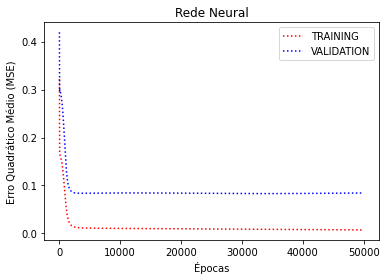

0.11077413926928255, 0.42209068988958787


In [102]:
import matplotlib.pyplot as plt

def plot_MSE(x, y_train, y_test):
    train_cost = y_train[-1]
    print("MSE-train: " + str(train_cost))

    test_cost = y_test[-1]
    print("MSE-test:  " + str(test_cost))

    plt.plot(x, y_train, 'r:')
    plt.plot(x, y_test, 'b:')
    plt.xlabel("Épocas")
    plt.ylabel("Erro Quadrático Médio (MSE)")
    plt.title("Rede Neural")
    plt.legend(["TRAINING", "VALIDATION"])
    plt.show()
    
plot_x = np.array(range(0, totepoc))
plot_MSE(plot_x, MSE, MSEv)
print(f"{sse}, {ssev}")